In [1]:
# import the warnings
import warnings
warnings.filterwarnings('ignore')

# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [2]:
# read the data

data = pd.read_csv('testset.csv')
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
# Let's look at the shape of the data

data.shape

(100990, 20)

#### We can see that there are 100990 rows and 20 columns present in the data.

In [4]:
# Let's look at the columns of the data

data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

#### We can see that there are 20 columns. Let's look at what each column represents.
1. 'datetime_utc': Date-time reference
2. ' _conds'     : Condition
3. ' _dewptm'    : Dewpoint
4. ' _fog'       : Fog
5. ' _hail'      : Hail
6. ' _heatindexm': Heat Index
7. ' _hum'       : Humidity
8. ' _precipm'   : Precipitation
9. ' _pressurem' : Pressure
10. ' _rain'      : Rain
11. ' _snow'      : Snow
12. ' _tempm'     : Temperature
13. ' _thunder'   : Thunder
14. ' _tornado'   : Tornado
15. ' _vism'      : Visibility
16. ' _wdird'     : Wind Direction Degree
17. ' _wdire'     : Wind Direction
18. ' _wgustm'    : Wind Gust
19. ' _windchillm': Wind Chill
20. ' _wspdm'     : Wind Speed

In [5]:
# Let's change the column names

data = data.rename(columns ={'datetime_utc':'date_time',
                             ' _conds':'condition',
                             ' _dewptm':'dew_point',
                             ' _fog':'fog',
                             ' _hail':'hail',
                             ' _heatindexm':'heat_index',
                             ' _hum':'humidity',
                             ' _precipm':'precipitation',
                             ' _pressurem':'pressure',
                             ' _rain':'rain',
                             ' _snow':'snow',
                             ' _tempm':'temperature',
                             ' _thunder':'thunder',
                             ' _tornado':'tornado',
                             ' _vism':'visibility',
                             ' _wdird':'wind_direction_degree',
                             ' _wdire':'wind_direction',
                             ' _wgustm':'wind_gust',
                             ' _windchillm':'wind_chill',
                             ' _wspdm':'wind_speed'})
data.head()

,date_time,condition,dew_point,fog,hail,heat_index,humidity,precipitation,pressure,rain,snow,temperature,thunder,tornado,visibility,wind_direction_degree,wind_direction,wind_gust,wind_chill,wind_speed
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
# Let's look at the information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date_time              100990 non-null  object 
 1   condition              100918 non-null  object 
 2   dew_point              100369 non-null  float64
 3   fog                    100990 non-null  int64  
 4   hail                   100990 non-null  int64  
 5   heat_index             29155 non-null   float64
 6   humidity               100233 non-null  float64
 7   precipitation          0 non-null       float64
 8   pressure               100758 non-null  float64
 9   rain                   100990 non-null  int64  
 10  snow                   100990 non-null  int64  
 11  temperature            100317 non-null  float64
 12  thunder                100990 non-null  int64  
 13  tornado                100990 non-null  int64  
 14  visibility             96562 non-nul

In [7]:
# missing values
data.isnull().sum()

date_time                     0
condition                    72
dew_point                   621
fog                           0
hail                          0
heat_index                71835
humidity                    757
precipitation            100990
pressure                    232
rain                          0
snow                          0
temperature                 673
thunder                       0
tornado                       0
visibility                 4428
wind_direction_degree     14755
wind_direction            14755
wind_gust                 99918
wind_chill               100411
wind_speed                 2358
dtype: int64

In [8]:
# missing values
100*data.isnull().sum()/len(data)

date_time                  0.000000
condition                  0.071294
dew_point                  0.614912
fog                        0.000000
hail                       0.000000
heat_index                71.130805
humidity                   0.749579
precipitation            100.000000
pressure                   0.229726
rain                       0.000000
snow                       0.000000
temperature                0.666403
thunder                    0.000000
tornado                    0.000000
visibility                 4.384593
wind_direction_degree     14.610357
wind_direction            14.610357
wind_gust                 98.938509
wind_chill                99.426676
wind_speed                 2.334885
dtype: float64

#### We can see that, the 'precipitation' column has 100% missing values. So, We will drop the 'precipitation' column.

In [9]:
# dropping the 'precipitation' column
data = data.drop('precipitation', axis = 1)
data.head()

,date_time,condition,dew_point,fog,hail,heat_index,humidity,pressure,rain,snow,temperature,thunder,tornado,visibility,wind_direction_degree,wind_direction,wind_gust,wind_chill,wind_speed
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


#### The 'precipitation' column is dropped.

#### There are ten numerical columns present in the data. These are:
1. 'dew_point'
2. 'heat_index'
3. 'humidity'
4. 'pressure'
5. 'temperature'
6. 'visibility'
7. 'wind_direction_degree'
8. 'wind_gust'
9. 'wind_chill'
10. 'wind_speed'

#### There are six binary columns present in the data. These are:
1. 'fog'
2. 'hail'
3. 'rain'
4. 'snow'
5. 'thunder'
6. 'tornado'

#### There are two categorical columns present in the data. These are:
1. 'condition'
2. 'wind_direction'

In [10]:
# Let's look at the statistical summary of the data

data.describe()

,dew_point,fog,hail,heat_index,humidity,pressure,rain,snow,temperature,thunder,tornado,visibility,wind_direction_degree,wind_gust,wind_chill,wind_speed
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


## Raw Data Visualization

### Using Derived Date Metrics for Visualisation

It is often helpful to use derived variables from date such as year, month, day, hour and using them to identify hidden patterns.

In [11]:
# Convert the date column to the pandas datetime format
data['date_time'] = pd.to_datetime(data['date_time'], format = "%Y%m%d-%H:%M")
data.head()

# extracting month and year from date

# extract date
data['date'] = data['date_time'].dt.date

# extract year
data['year'] = data['date_time'].dt.year

# extract month
data['month'] = data['date_time'].dt.month

# extract day
data['day'] = data['date_time'].dt.day

# extract hour
data['hour'] = data['date_time'].dt.hour

data.head()

,date_time,condition,dew_point,fog,hail,heat_index,humidity,pressure,rain,snow,...,wind_direction_degree,wind_direction,wind_gust,wind_chill,wind_speed,date,year,month,day,hour
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,...,280.0,West,NaN,NaN,7.4,1996-11-01,1996,11,1,11
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01,1996,11,1,12
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01,1996,11,1,13
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01,1996,11,1,14
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,...,0.0,North,NaN,NaN,0.0,1996-11-01,1996,11,1,16


## Temperature

- plotting the average temperature across years and months

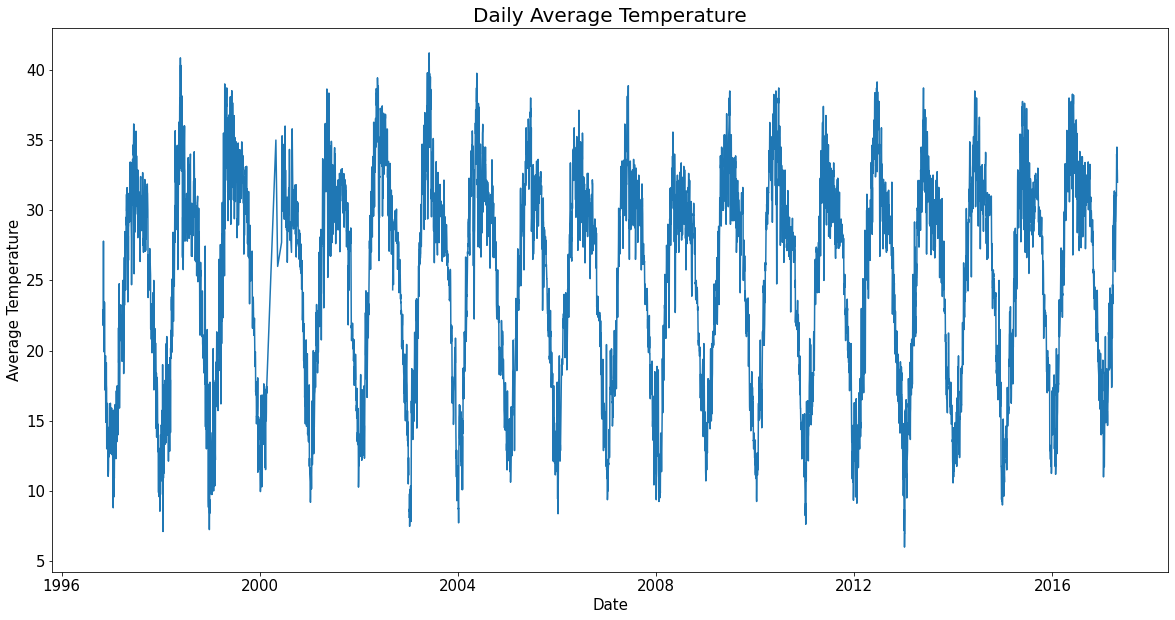

In [12]:
# grouping temperature by date
daily_avg_temperature = data.groupby(["date"]).temperature.mean()

# Visualizing daily average temperature
plt.figure(figsize=(20, 10))
daily_avg_temperature.plot(fontsize = 15)    # time series plot
plt.title('Daily Average Temperature', fontsize=20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Average Temperature", fontsize = 15)
plt.show()

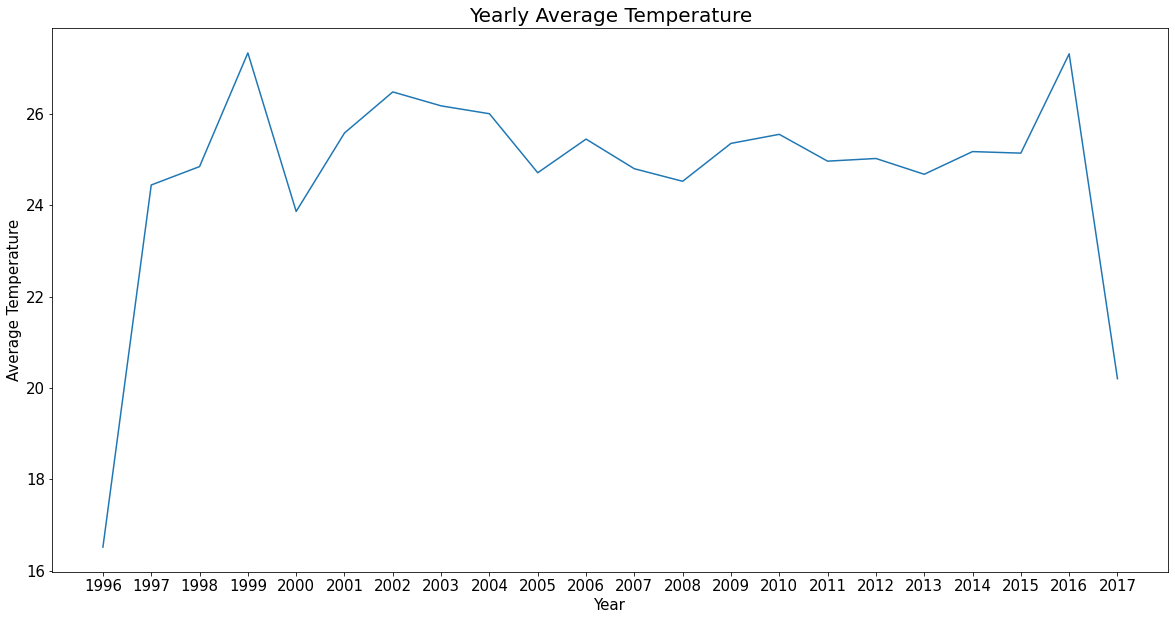

In [13]:
# grouping by year
yearly_avg_temperature = data.groupby(["year"]).temperature.mean()

# Visualizing year wise average temperature
plt.figure(figsize=(20, 10))
yearly_avg_temperature.plot(fontsize = 15)       # time series plot
plt.xticks(range(1996,2018))
plt.title('Yearly Average Temperature', fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Temperature", fontsize=15)
plt.show()

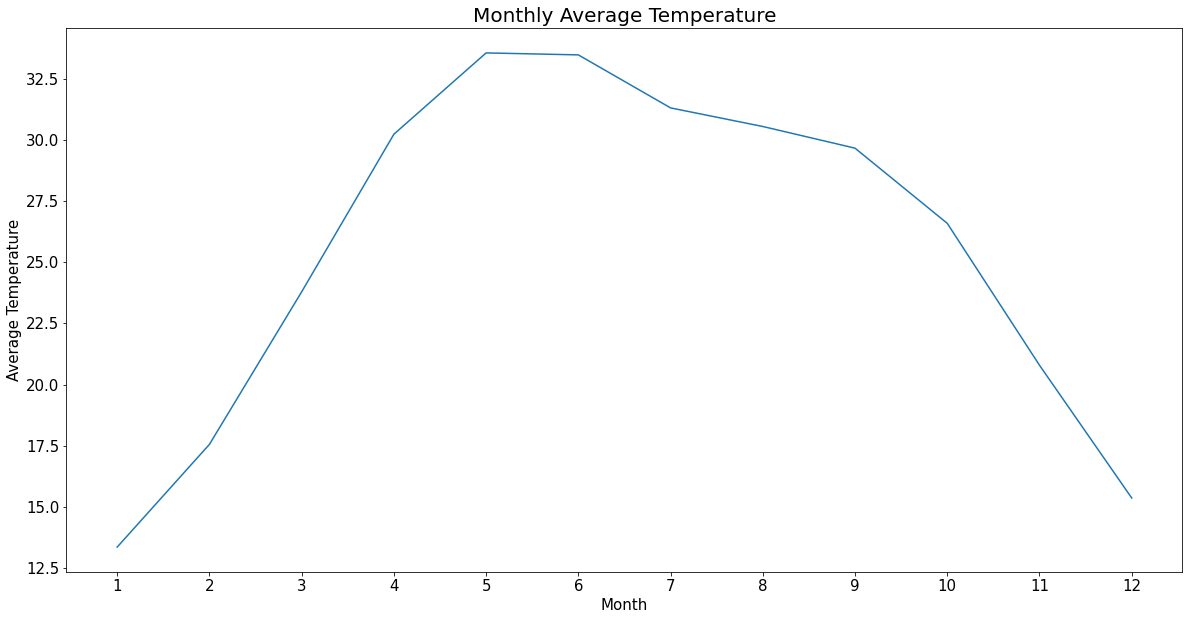

In [14]:
# grouping by month
monthly_avg_temperature = data.groupby(["month"]).temperature.mean()

# Visualizing month wise average temperature
plt.figure(figsize=(20, 10))
monthly_avg_temperature.plot(fontsize = 15)    # time series plot
plt.xticks(range(1,13))
plt.title('Monthly Average Temperature', fontsize=20)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Average Temperature", fontsize = 15)
plt.show()

We can clearly see that the temperature is high during the summer months and low for the winter months.

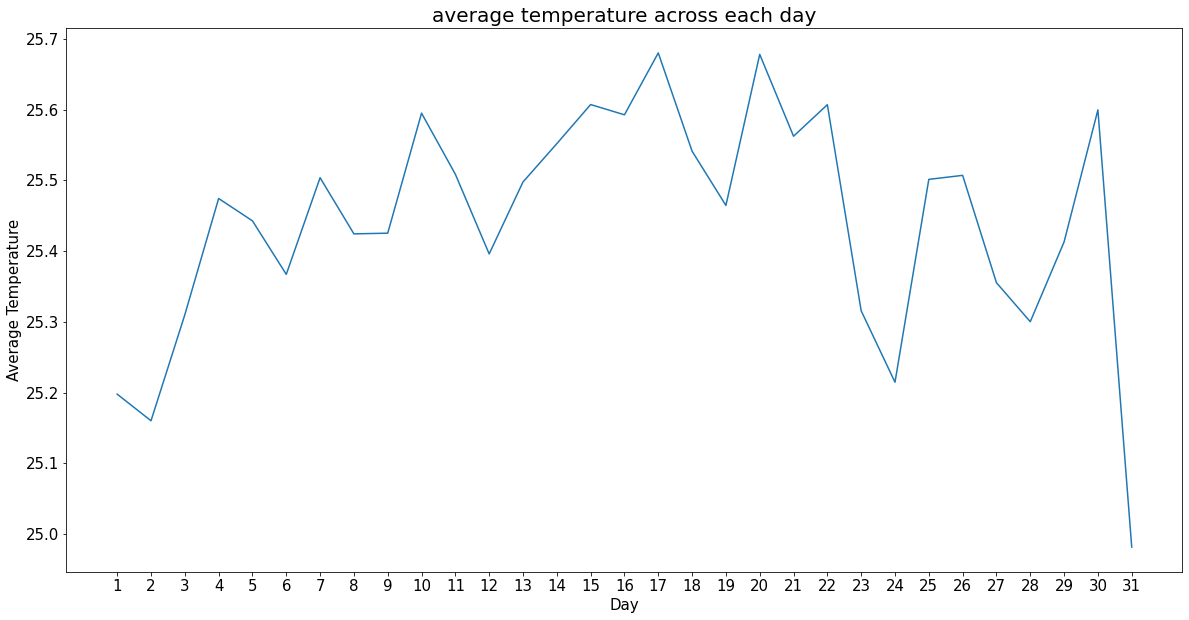

In [15]:
# grouping by day
avg_temperature_across_each_day = data.groupby(["day"]).temperature.mean()

# Visualizing average temperature for each day in a month
plt.figure(figsize=(20, 10))
avg_temperature_across_each_day.plot(fontsize = 15)    # time series plot
plt.xticks(range(1,32))
plt.title('average temperature across each day', fontsize=20)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Average Temperature", fontsize = 15)
plt.show()

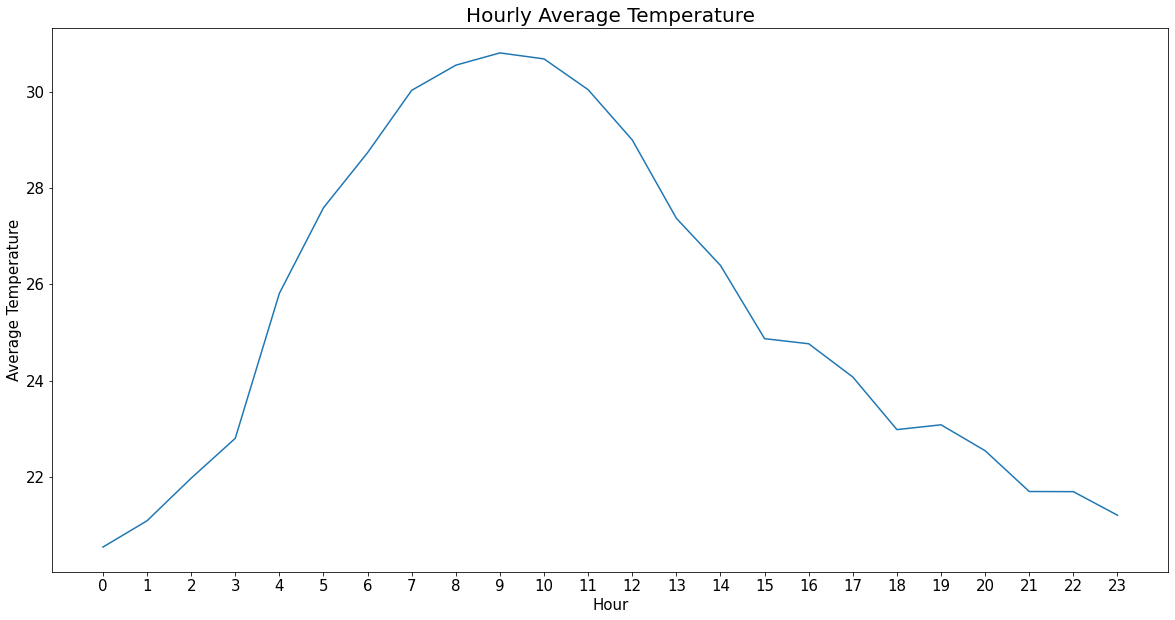

In [16]:
# grouping by hour
hourly_avg_temperature = data.groupby(["hour"]).temperature.mean()

# Visualizing hourly average temperature
plt.figure(figsize=(20, 10))
hourly_avg_temperature.plot(fontsize = 15)    # time series plot
plt.xticks(range(0,24))
plt.title('Hourly Average Temperature', fontsize=20)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Average Temperature", fontsize = 15)
plt.show()

## Humidity

- plotting the average humidity across years and months

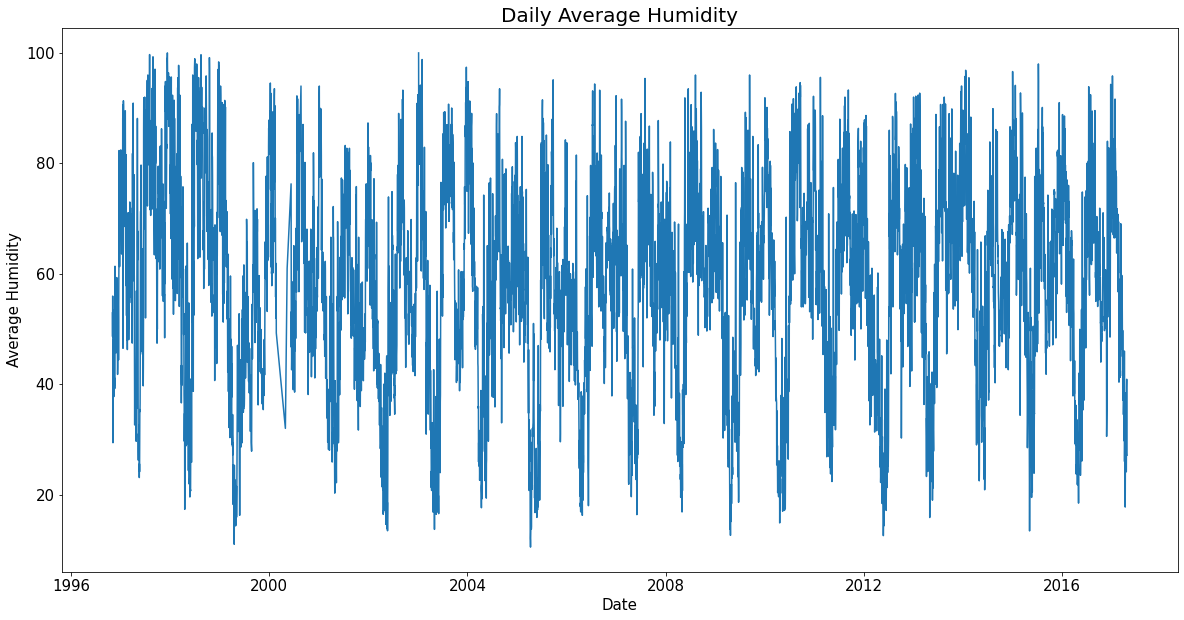

In [17]:
# grouping humidity by date
daily_avg_humidity = data.groupby(["date"]).humidity.mean()

# Visualizing daily average humidity
plt.figure(figsize=(20, 10))
daily_avg_humidity.plot(fontsize = 15)    # time series plot
plt.title('Daily Average Humidity', fontsize=20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Average Humidity", fontsize = 15)
plt.show()

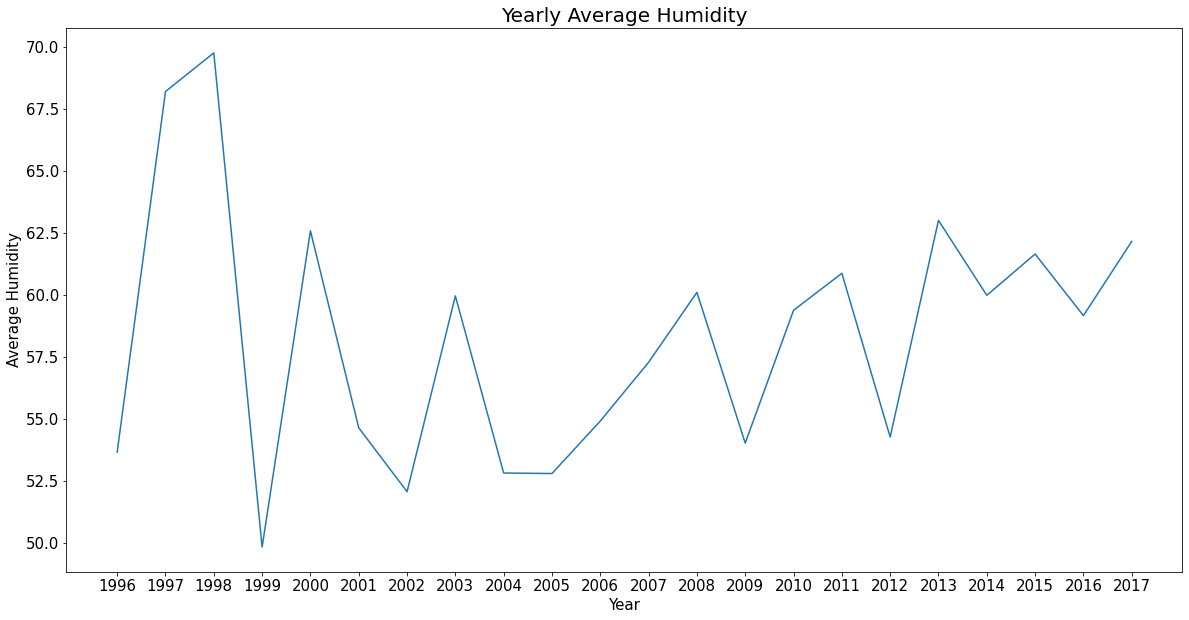

In [18]:
# grouping by year
yearly_avg_humidity = data.groupby(["year"]).humidity.mean()

# Visualizing year wise average humidity
plt.figure(figsize=(20, 10))
yearly_avg_humidity.plot(fontsize = 15)       # time series plot
plt.xticks(range(1996,2018))
plt.title('Yearly Average Humidity', fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Humidity", fontsize=15)
plt.show()

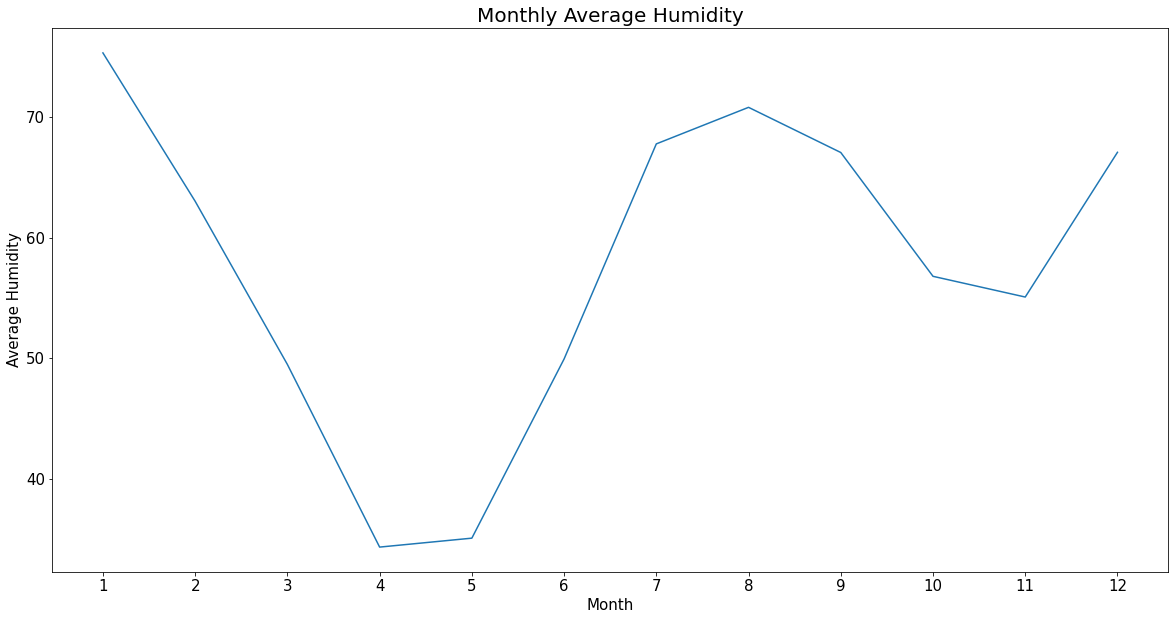

In [19]:
# grouping by month
monthly_avg_humidity = data.groupby(["month"]).humidity.mean()

# Visualizing month wise average humidity
plt.figure(figsize=(20, 10))
monthly_avg_humidity.plot(fontsize = 15)    # time series plot
plt.xticks(range(1,13))
plt.title('Monthly Average Humidity', fontsize=20)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Average Humidity", fontsize = 15)
plt.show()

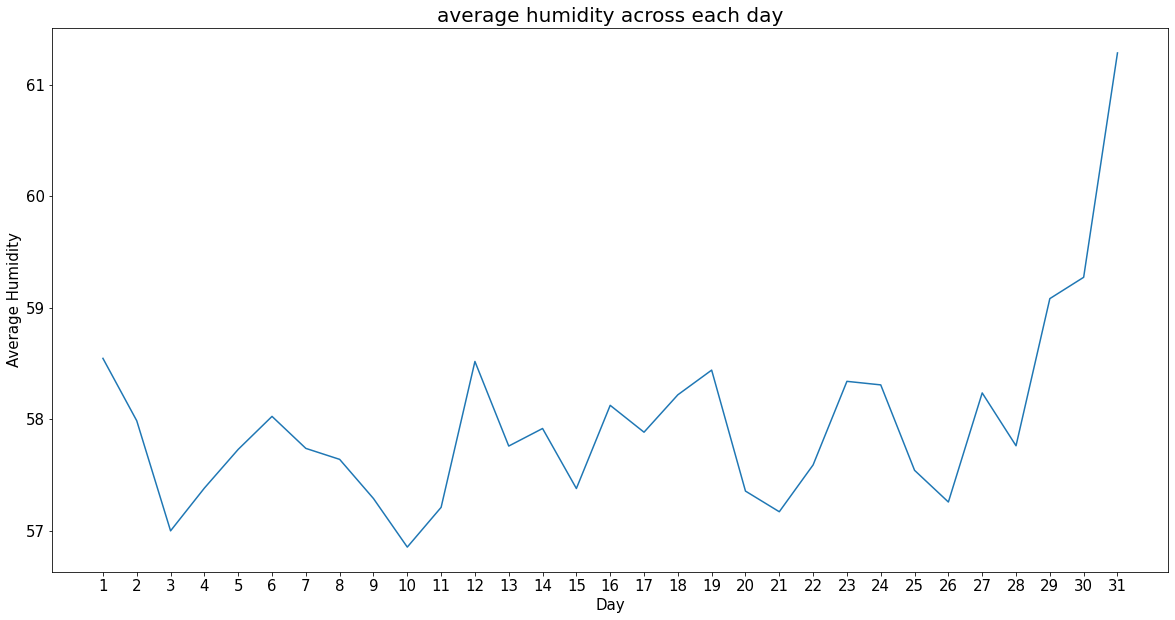

In [20]:
# grouping by day
avg_humidity_across_each_day = data.groupby(["day"]).humidity.mean()

# Visualizing average humidity for each day in a month
plt.figure(figsize=(20, 10))
avg_humidity_across_each_day.plot(fontsize = 15)    # time series plot
plt.xticks(range(1,32))
plt.title('average humidity across each day', fontsize=20)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Average Humidity", fontsize = 15)
plt.show()

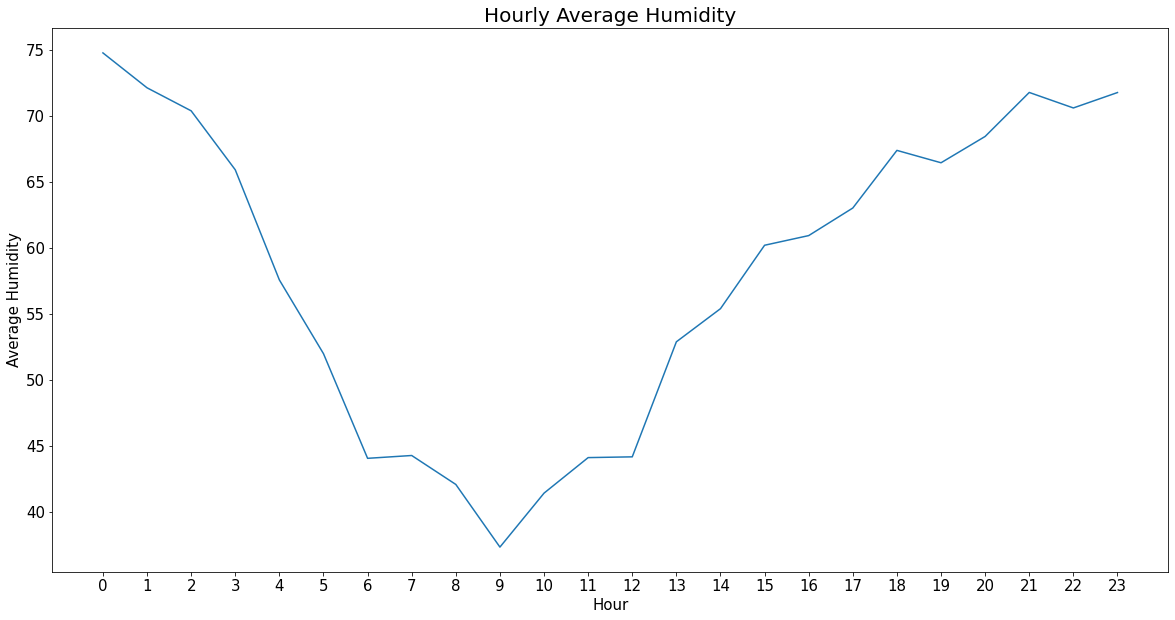

In [21]:
# grouping by hour
hourly_avg_humidity = data.groupby(["hour"]).humidity.mean()

# Visualizing hourly average humidity
plt.figure(figsize=(20, 10))
hourly_avg_humidity.plot(fontsize = 15)    # time series plot
plt.xticks(range(0,24))
plt.title('Hourly Average Humidity', fontsize=20)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Average Humidity", fontsize = 15)
plt.show()

## Pressure

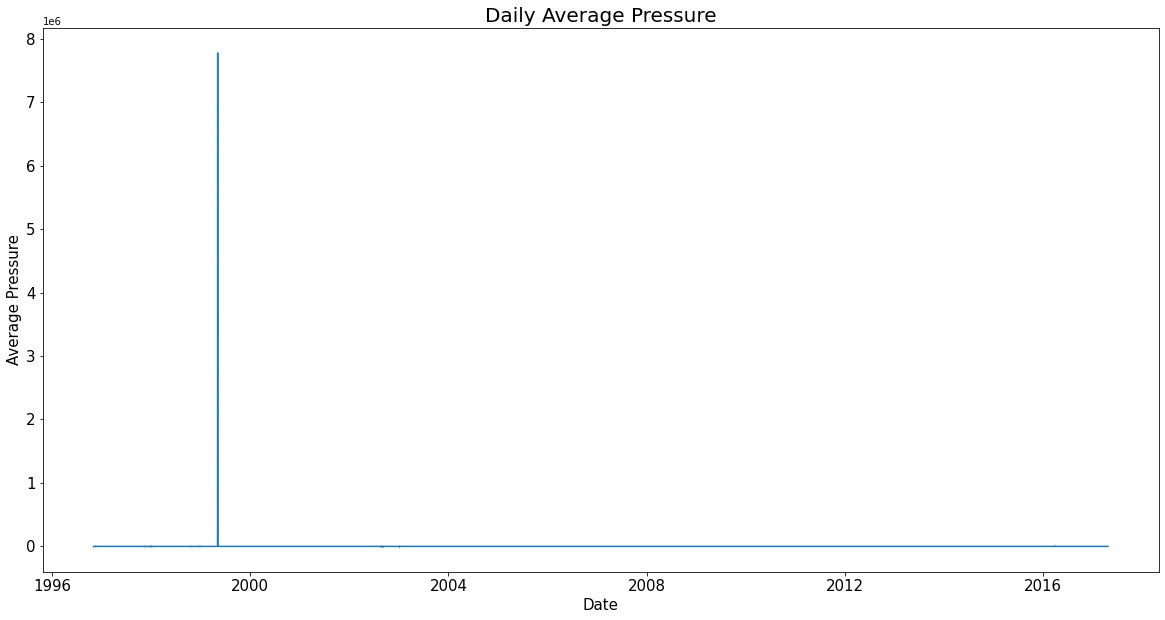

In [22]:
# grouping pressure by date
daily_avg_pressure = data.groupby(["date"]).pressure.mean()

# Visualizing daily average pressure
plt.figure(figsize=(20, 10))
daily_avg_pressure.plot(fontsize = 15)    # time series plot
plt.title('Daily Average Pressure', fontsize=20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Average Pressure", fontsize = 15)
plt.show()

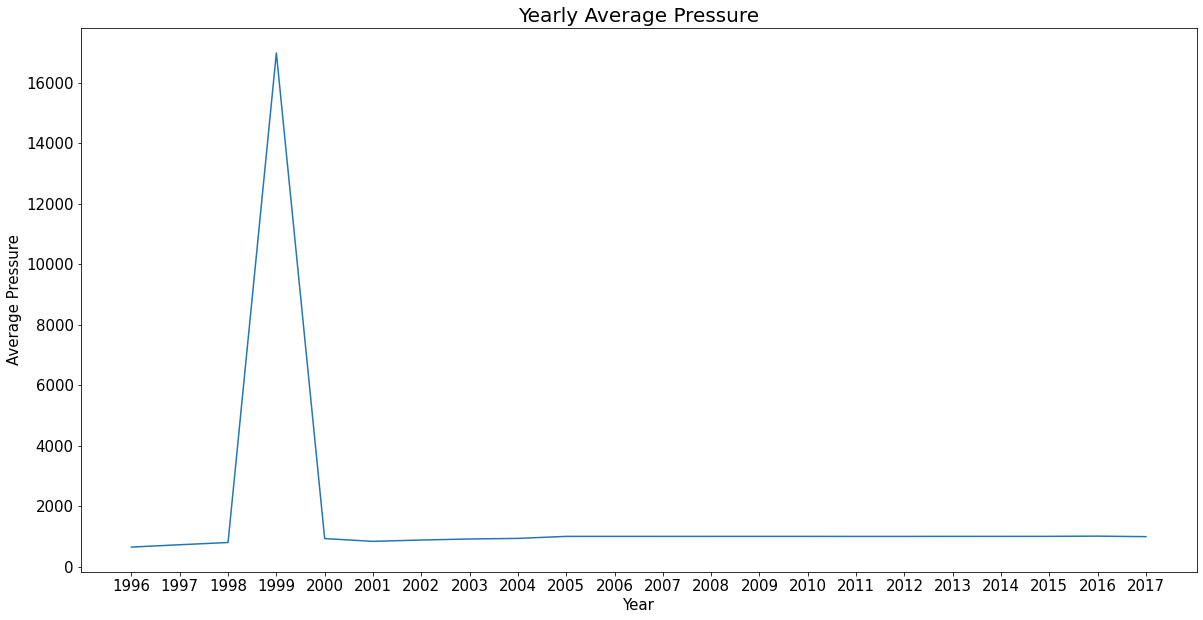

In [23]:
# grouping by year
yearly_avg_pressure = data.groupby(["year"]).pressure.mean()

# Visualizing year wise average pressure
plt.figure(figsize=(20, 10))
yearly_avg_pressure.plot(fontsize = 15)       # time series plot
plt.xticks(range(1996,2018))
plt.title('Yearly Average Pressure', fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Pressure", fontsize=15)
plt.show()

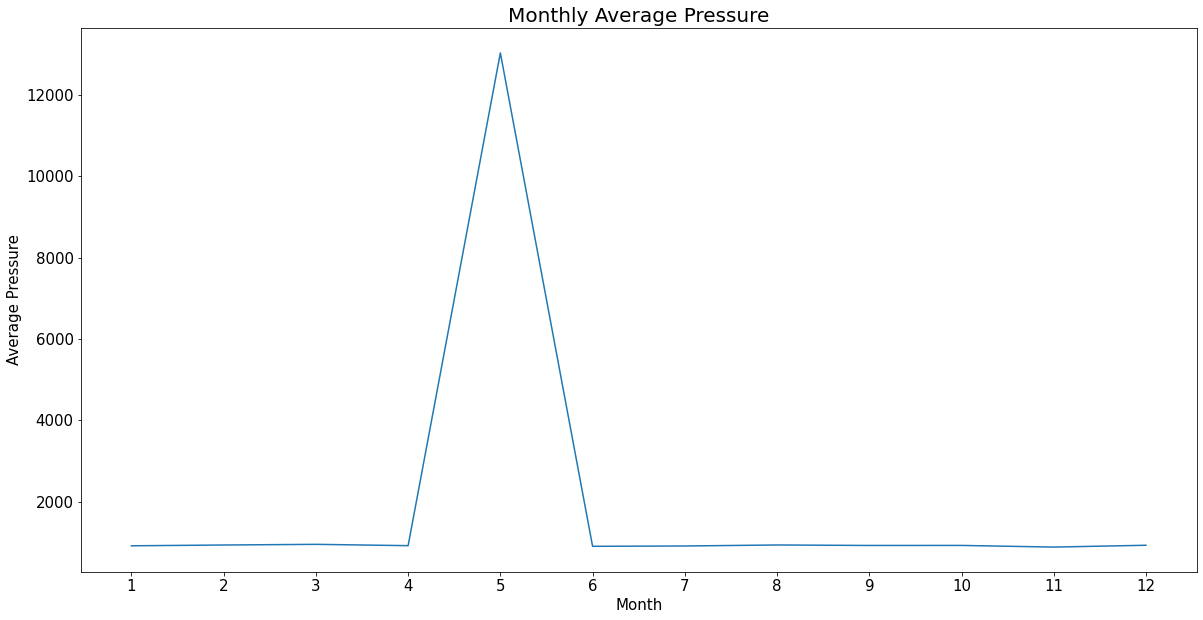

In [24]:
# grouping by month
monthly_avg_pressure = data.groupby(["month"]).pressure.mean()

# Visualizing month wise average pressure
plt.figure(figsize=(20, 10))
monthly_avg_pressure.plot(fontsize = 15)    # time series plot
plt.xticks(range(1,13))
plt.title('Monthly Average Pressure', fontsize=20)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Average Pressure", fontsize = 15)
plt.show()

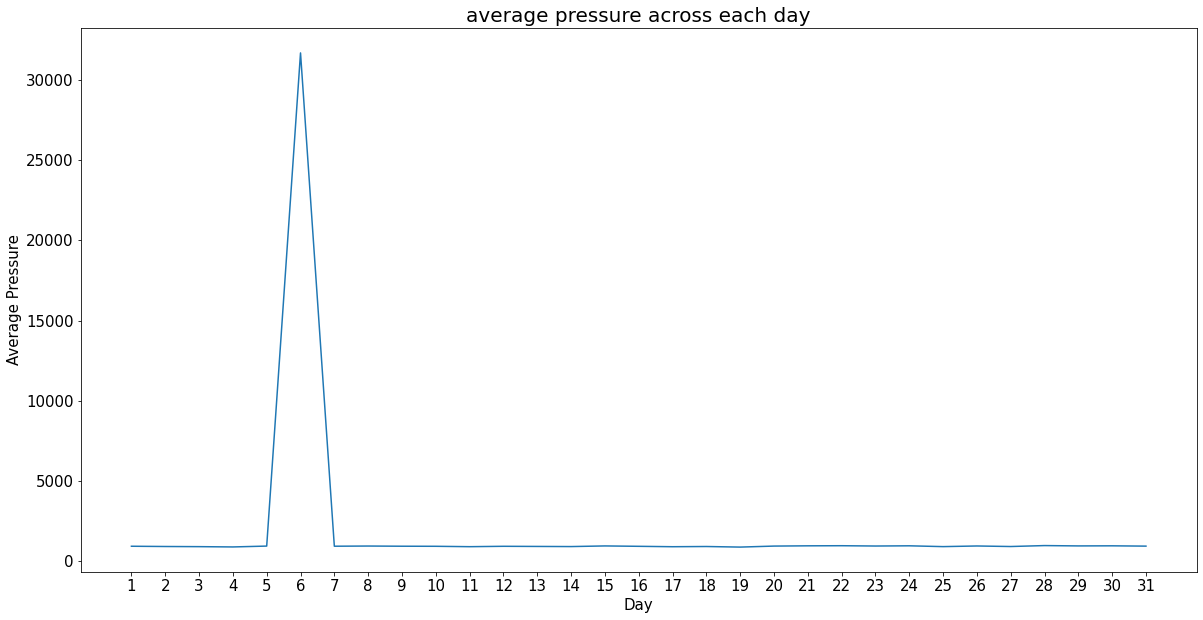

In [25]:
# grouping by day
avg_pressure_across_each_day = data.groupby(["day"]).pressure.mean()

# Visualizing average pressure for each day in a month
plt.figure(figsize=(20, 10))
avg_pressure_across_each_day.plot(fontsize = 15)    # time series plot
plt.xticks(range(1,32))
plt.title('average pressure across each day', fontsize=20)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Average Pressure", fontsize = 15)
plt.show()

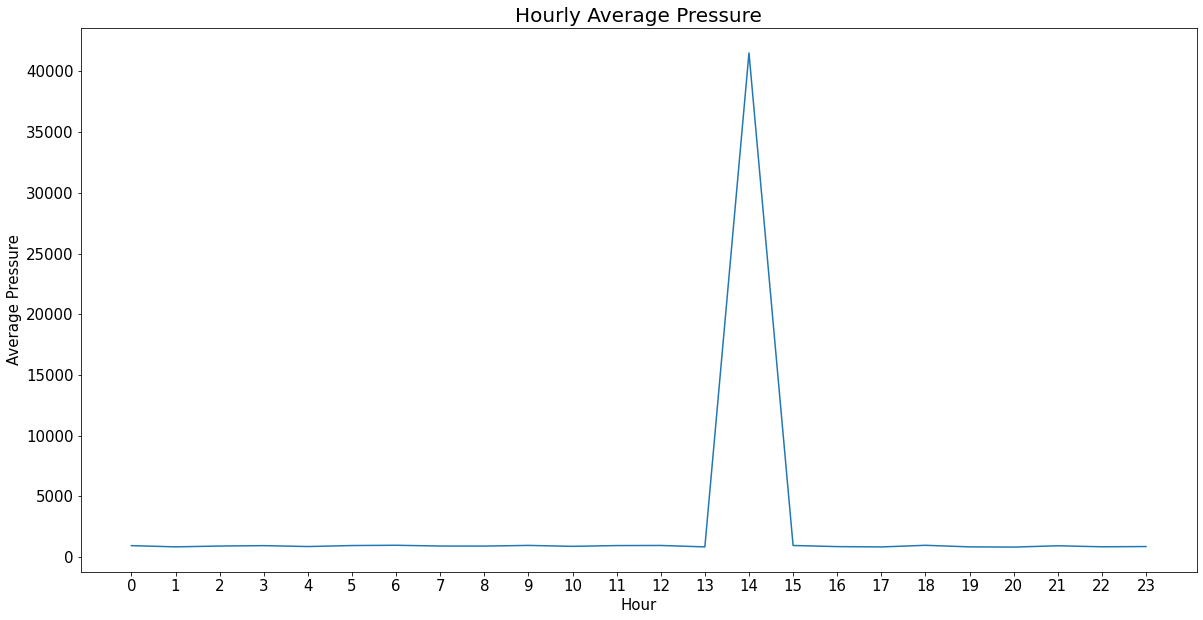

In [26]:
# grouping by hour
hourly_avg_pressure = data.groupby(["hour"]).pressure.mean()

# Visualizing hourly average pressure
plt.figure(figsize=(20, 10))
hourly_avg_pressure.plot(fontsize = 15)    # time series plot
plt.xticks(range(0,24))
plt.title('Hourly Average Pressure', fontsize=20)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Average Pressure", fontsize = 15)
plt.show()

### Pairwise scatter plots

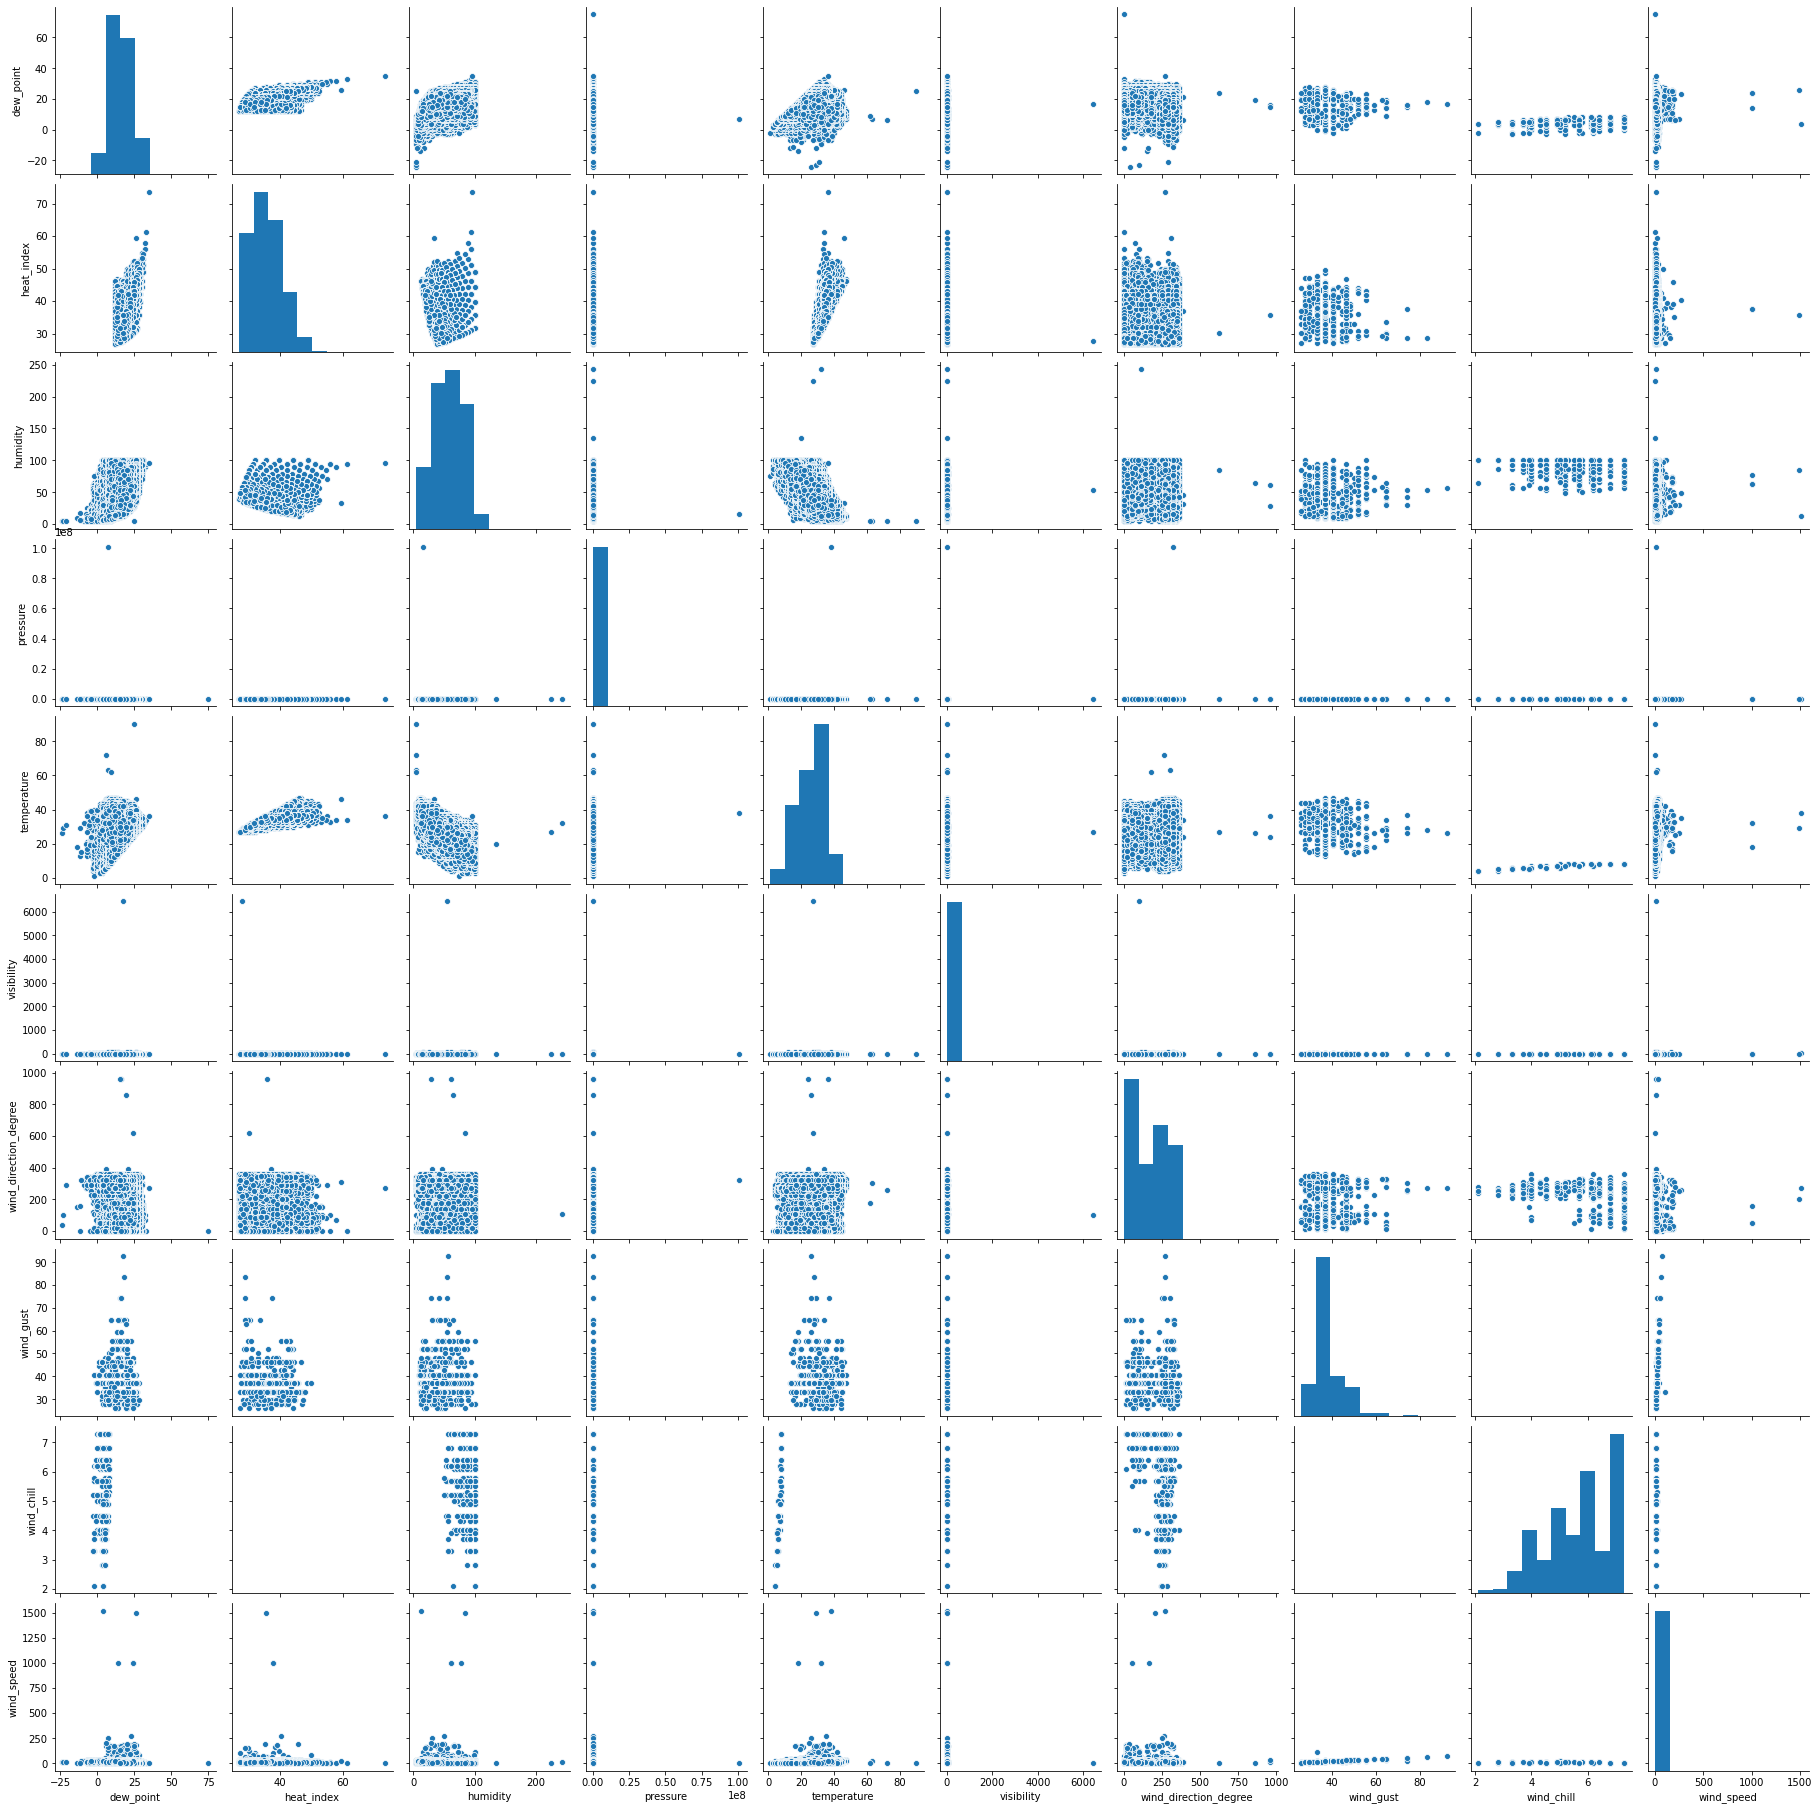

In [27]:
# Create a new dataframe containing only numeric variables

numeric_data = data[['dew_point', 'heat_index', 'humidity', 'pressure',
                    'temperature', 'visibility', 'wind_direction_degree',
                    'wind_gust', 'wind_chill', 'wind_speed']]

# Plot a paiplot

sns.pairplot(numeric_data)
plt.show()

### Visualizing Heatmap using correlation

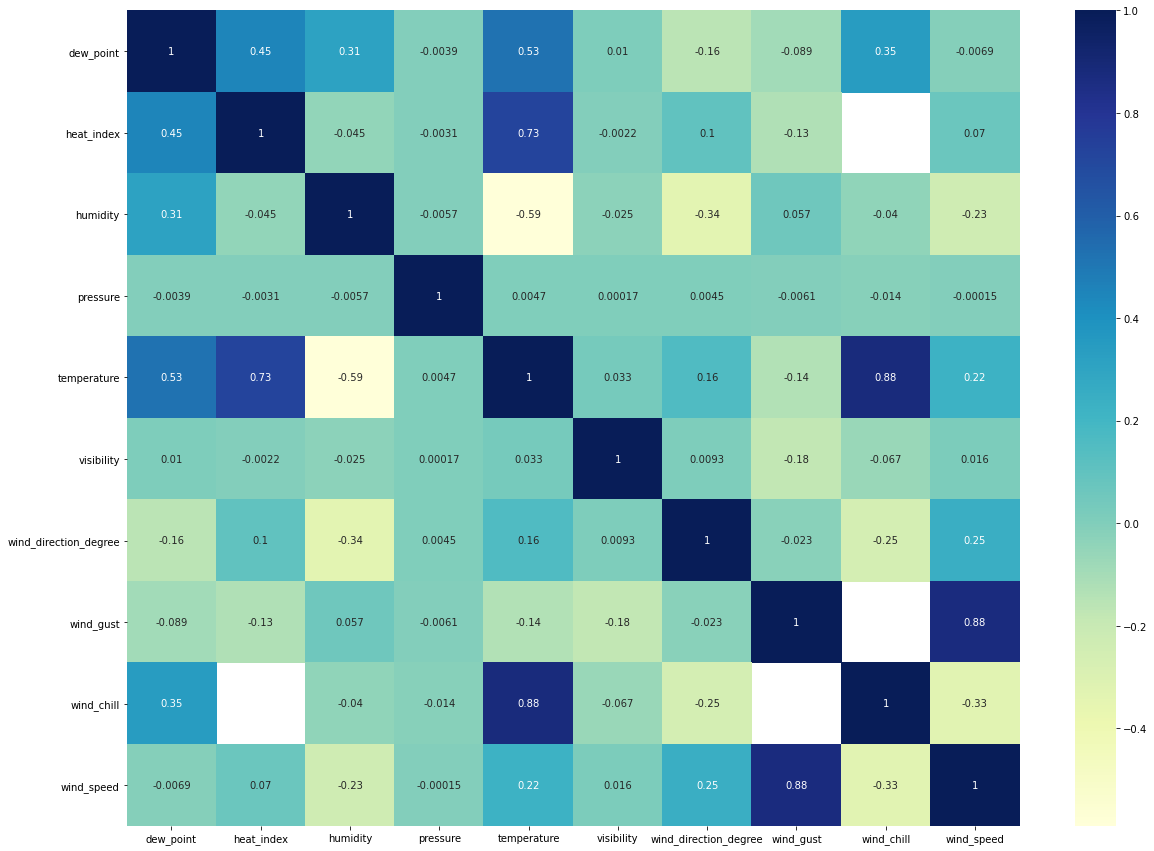

In [28]:
# Heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(numeric_data.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

# Exploratory Data Analysis

## Univariate Analysis

### Univariate Analysis - Numerical variables

**dew_point variable**

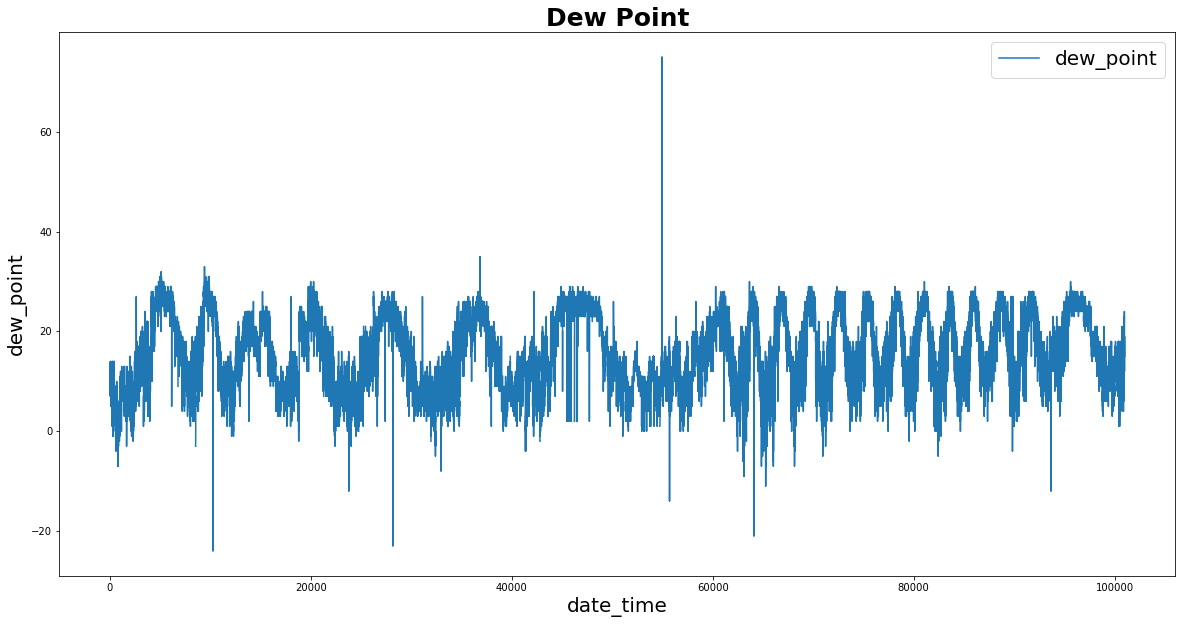

In [29]:
# visualising 'dew_point' variable

data['dew_point'].plot(figsize = (20, 10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('Dew Point', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("dew_point", fontsize = 20)
plt.show()

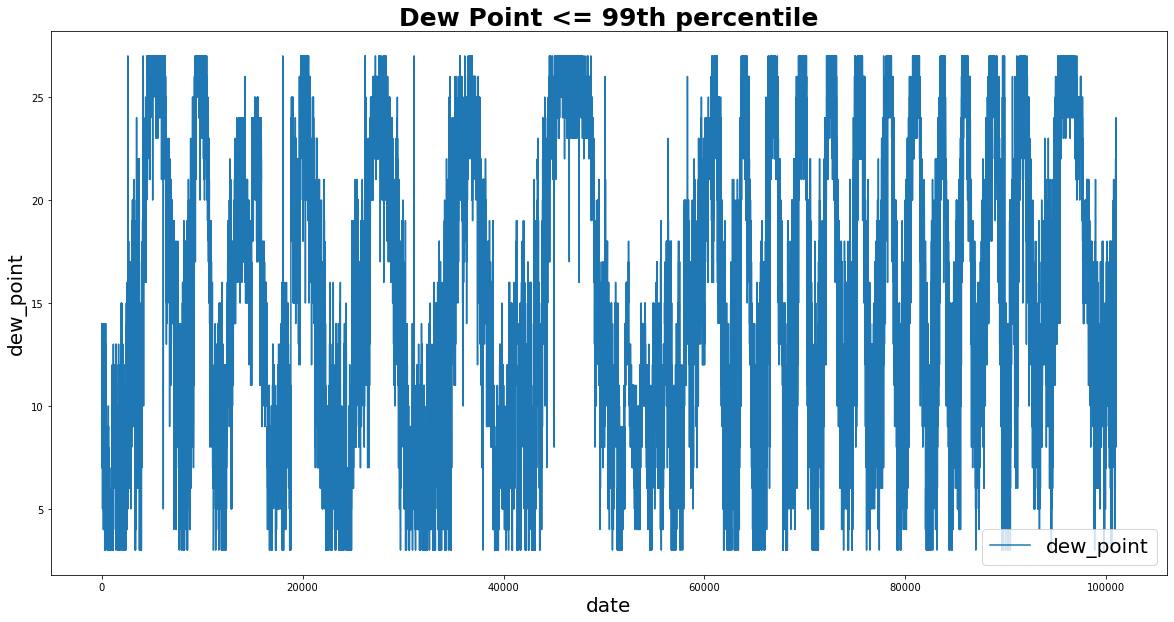

In [30]:
# plot the 'dew_point' column for the values greater than 1 percentile and less than 99 percentile

q1_dew_point = data.dew_point.quantile(0.01)
q99_dew_point = data.dew_point.quantile(0.99)
data.dew_point[(data.dew_point > q1_dew_point) & (data.dew_point < q99_dew_point)].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('Dew Point <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("dew_point", fontsize = 20)
plt.show()

**heat_index variable**

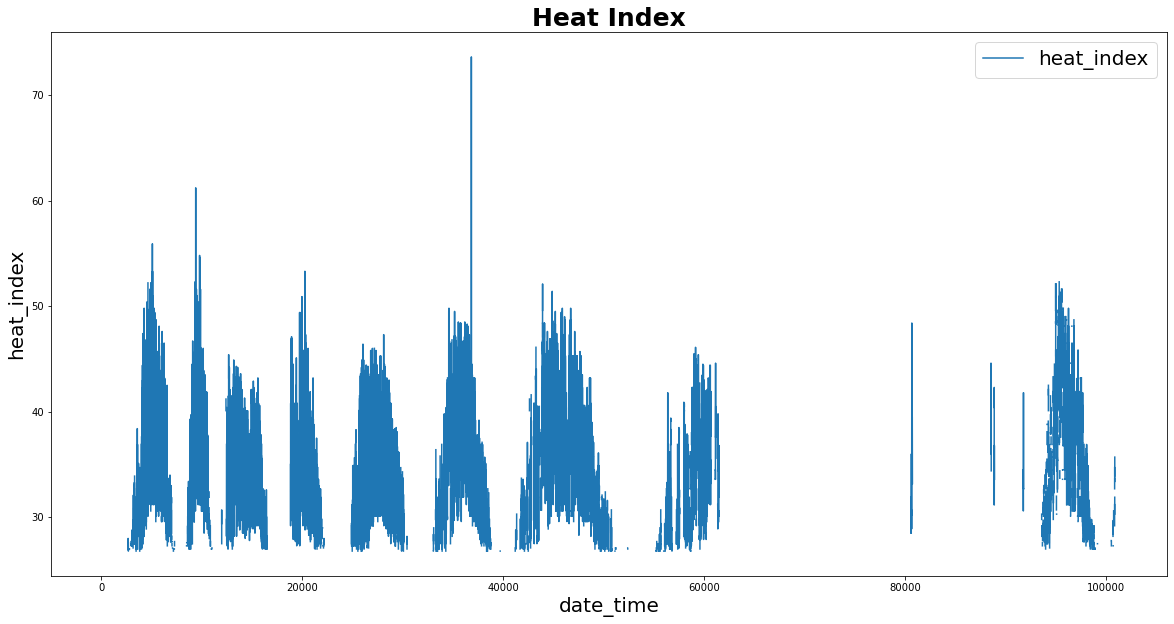

In [31]:
# visualising 'heat_index' variable

plt.figure(figsize = (20, 10))
data['heat_index'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('Heat Index', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("heat_index", fontsize = 20)
plt.show()

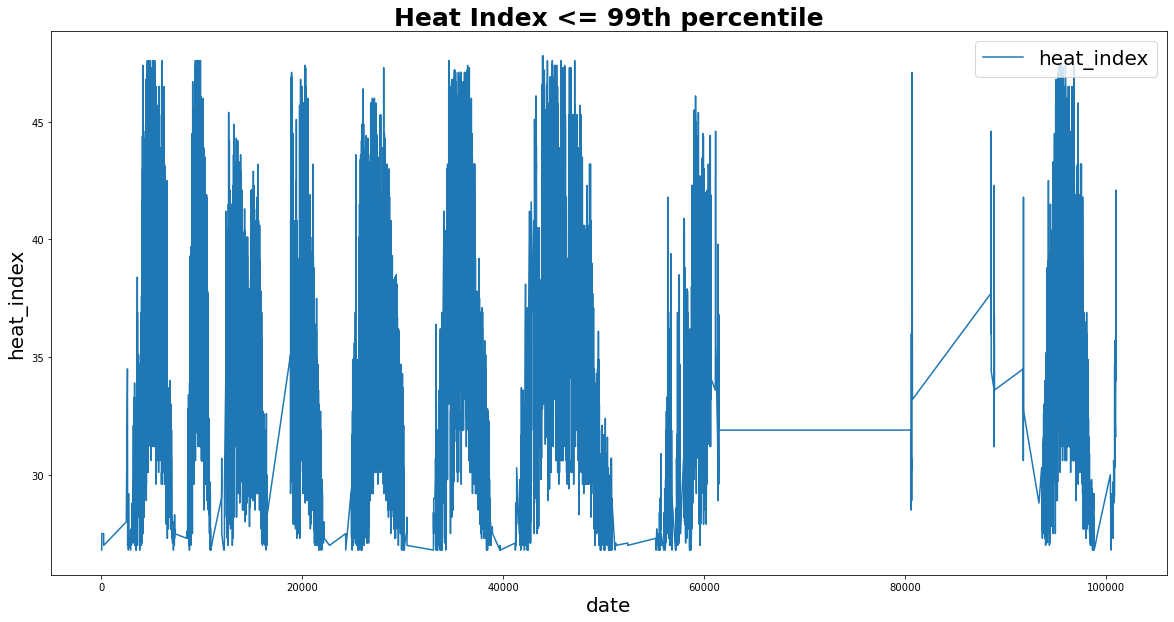

In [32]:
# plot the 'heat_index' column for the values less than 99 percentile

q99_heat_index = data.heat_index.quantile(0.99)
data.heat_index[data.heat_index < q99_heat_index].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('Heat Index <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("heat_index", fontsize = 20)
plt.show()

**humidity variable**

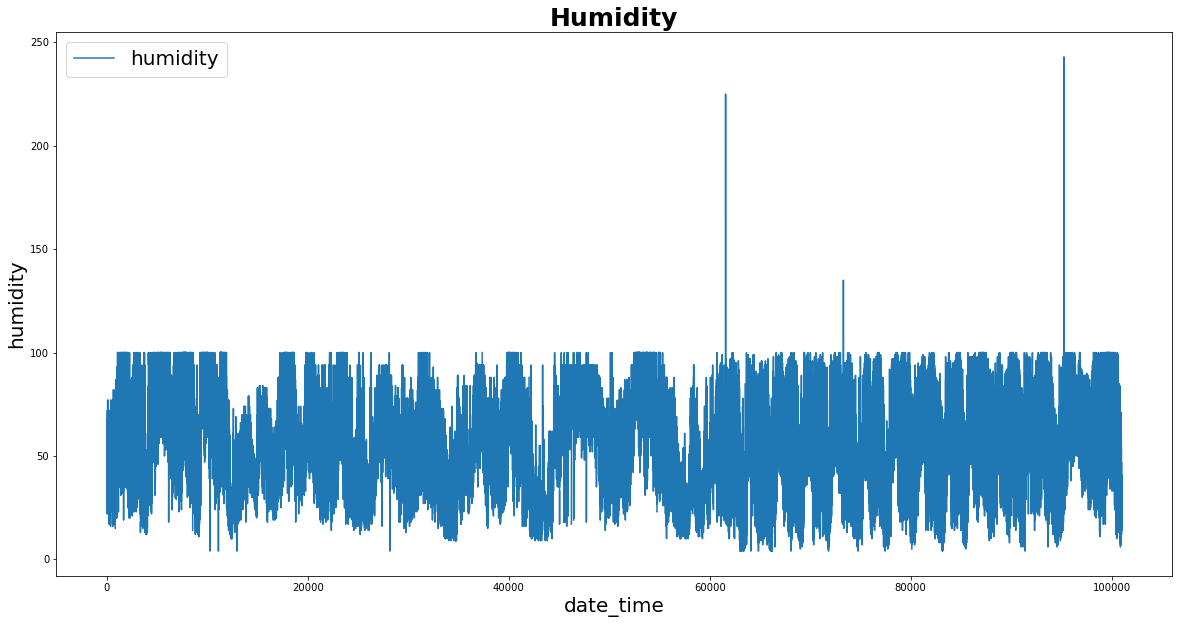

In [33]:
# visualising 'humidity' variable

plt.figure(figsize = (20, 10))
data['humidity'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('Humidity', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("humidity", fontsize = 20)
plt.show()

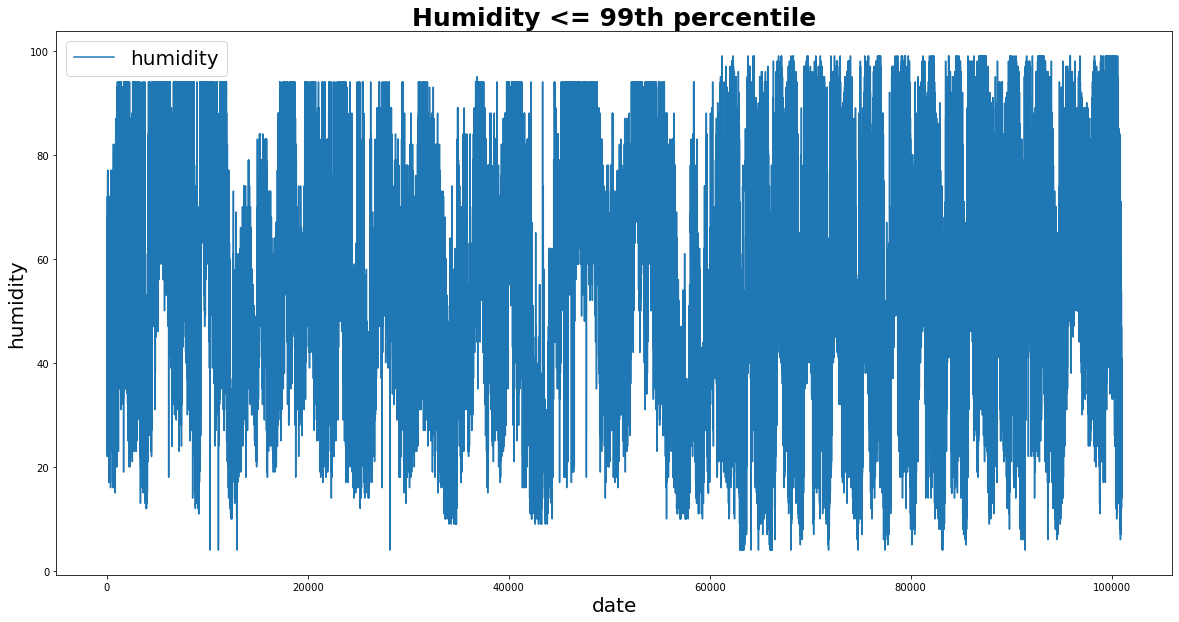

In [34]:
# plot the 'humidity' column for the values less than 99 percentile

q99_humidity = data.humidity.quantile(0.99)
data.humidity[data.humidity < q99_humidity].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('Humidity <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("humidity", fontsize = 20)
plt.show()

**pressure variable**

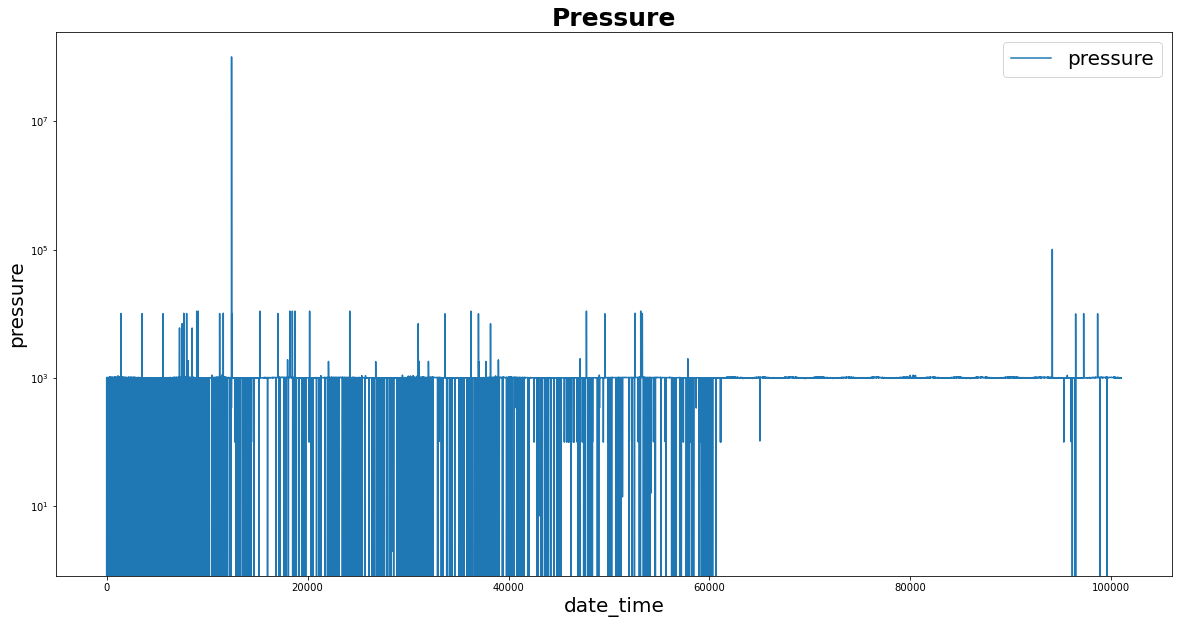

In [35]:
# visualising 'pressure' variable

plt.figure(figsize = (20, 10))
data['pressure'].plot()
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 20)
plt.title('Pressure', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("pressure", fontsize = 20)
plt.show()

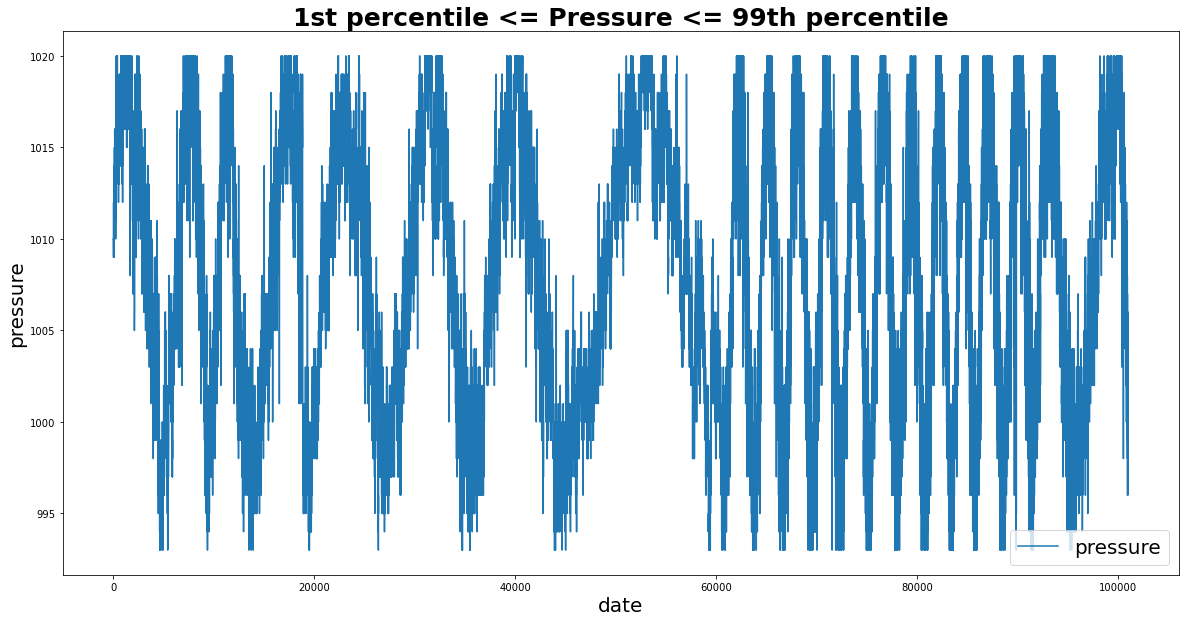

In [36]:
# plot the 'pressure' column for the values greater than 1 percentile and less than 99 percentile

q1_pressure = data.pressure.quantile(0.01)
q99_pressure = data.pressure.quantile(0.99)
data.pressure[(data.pressure > q1_pressure) & (data.pressure < q99_pressure)].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('1st percentile <= Pressure <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("pressure", fontsize = 20)
plt.show()

**temperature variable**

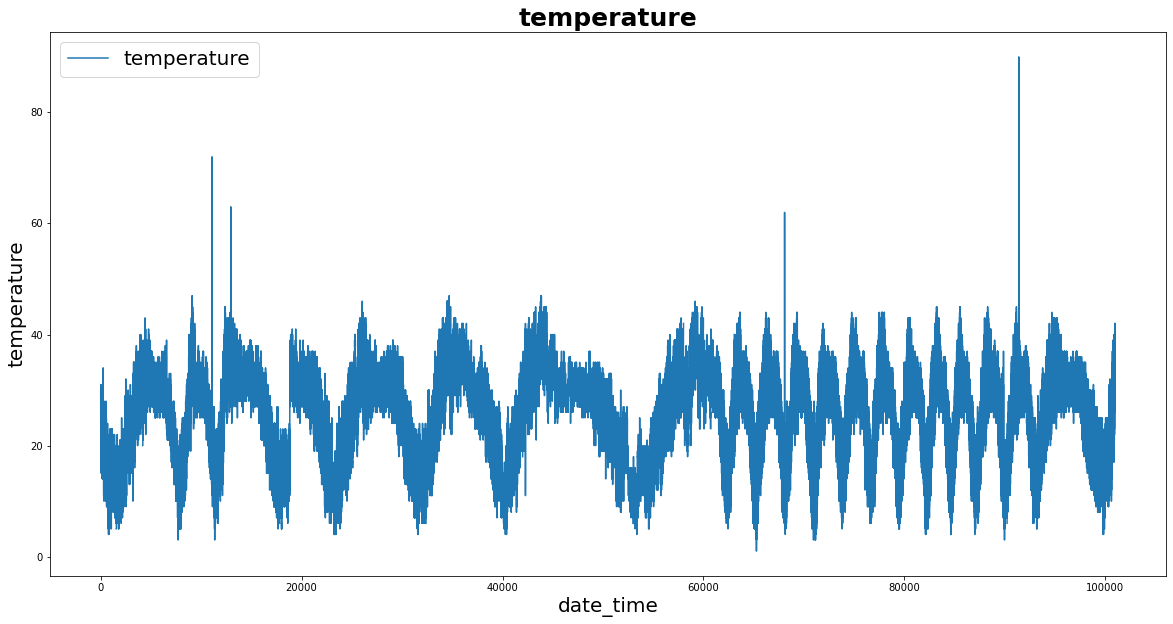

In [37]:
# visualising 'temperature' variable

plt.figure(figsize = (20, 10))
data['temperature'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('temperature', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("temperature", fontsize = 20)
plt.show()

It looks that, there are outliers present in the 'temperature' variable, so we will visualize the 'temperature' variable having values greater than 1 percentile and less than 99 percentile.

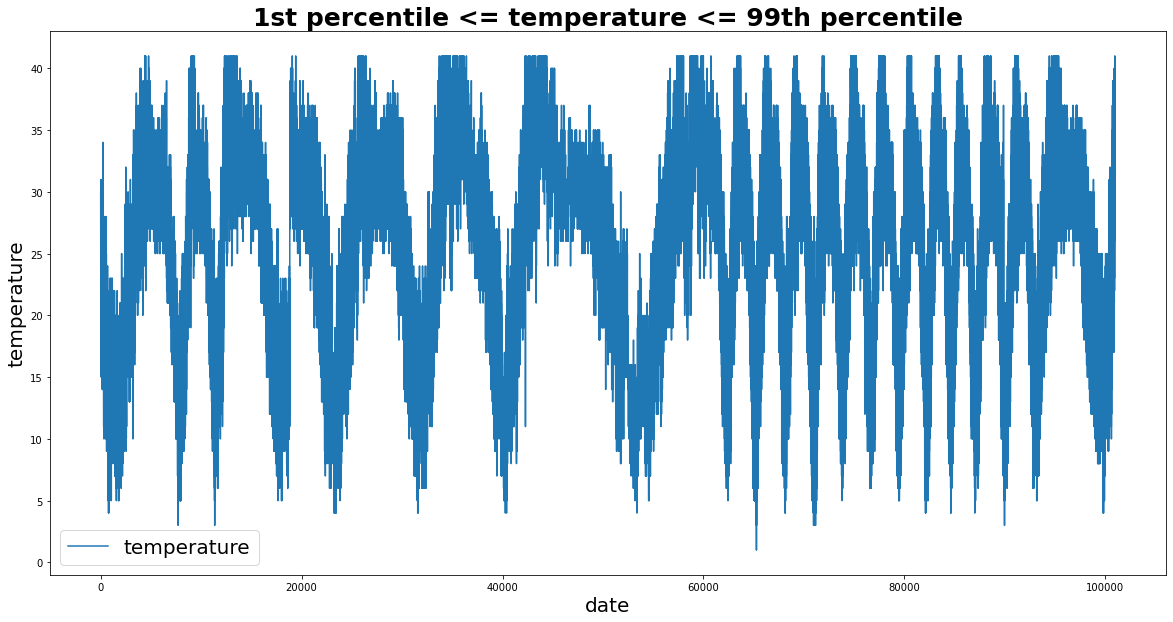

In [38]:
# plot the 'temperature' column for the values less than 99 percentile

q99_temperature = data.temperature.quantile(0.99)
data.temperature[data.temperature < q99_temperature].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('1st percentile <= temperature <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("temperature", fontsize = 20)
plt.show()

**visibility variable**

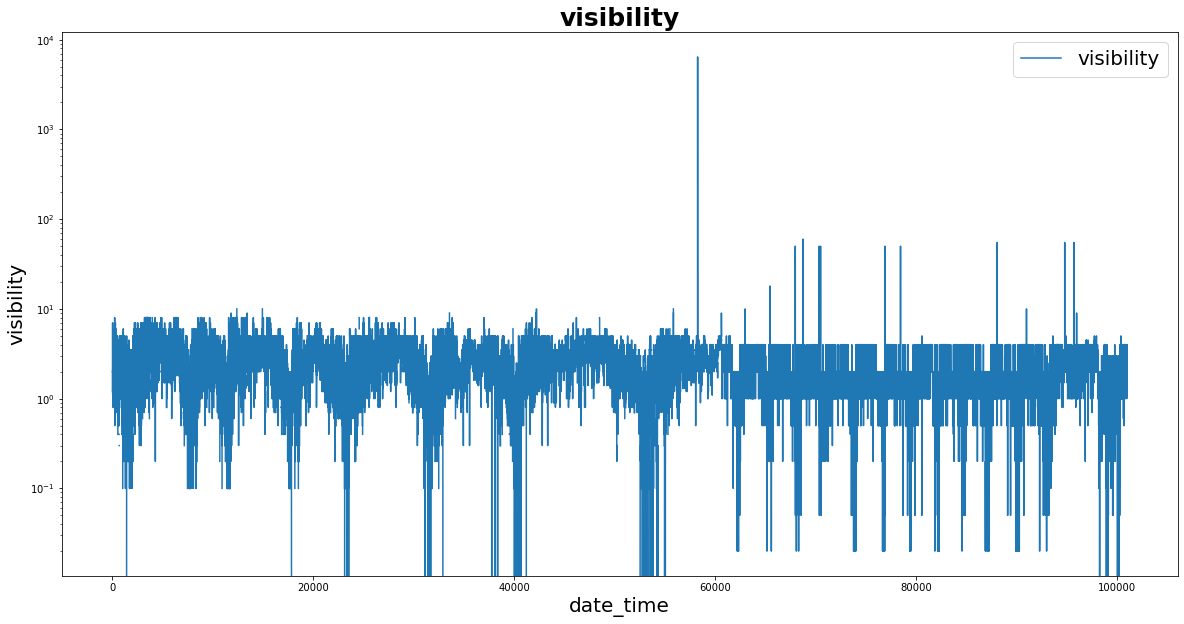

In [39]:
# visualising 'visibility' variable

plt.figure(figsize = (20, 10))
data['visibility'].plot()
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 20)
plt.title('visibility', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("visibility", fontsize = 20)
plt.show()

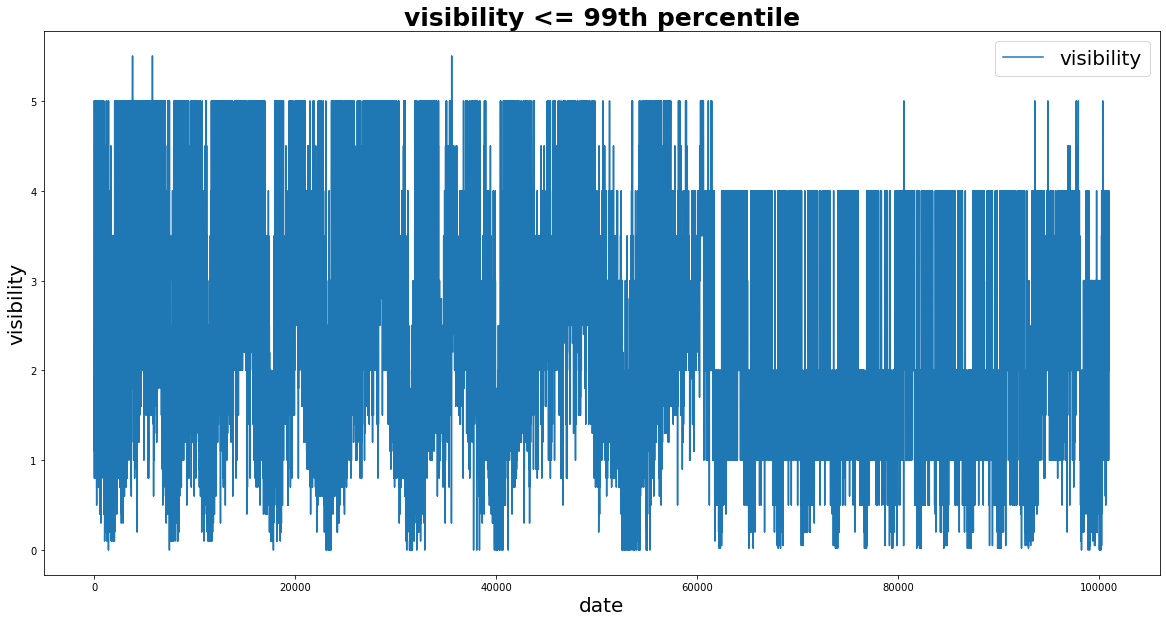

In [40]:
# plot the 'visibility' column for the values less than 99 percentile

q99_visibility = data.visibility.quantile(0.99)
data.visibility[data.visibility < q99_visibility].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('visibility <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("visibility", fontsize = 20)
plt.show()

**wind_direction_degree variable**

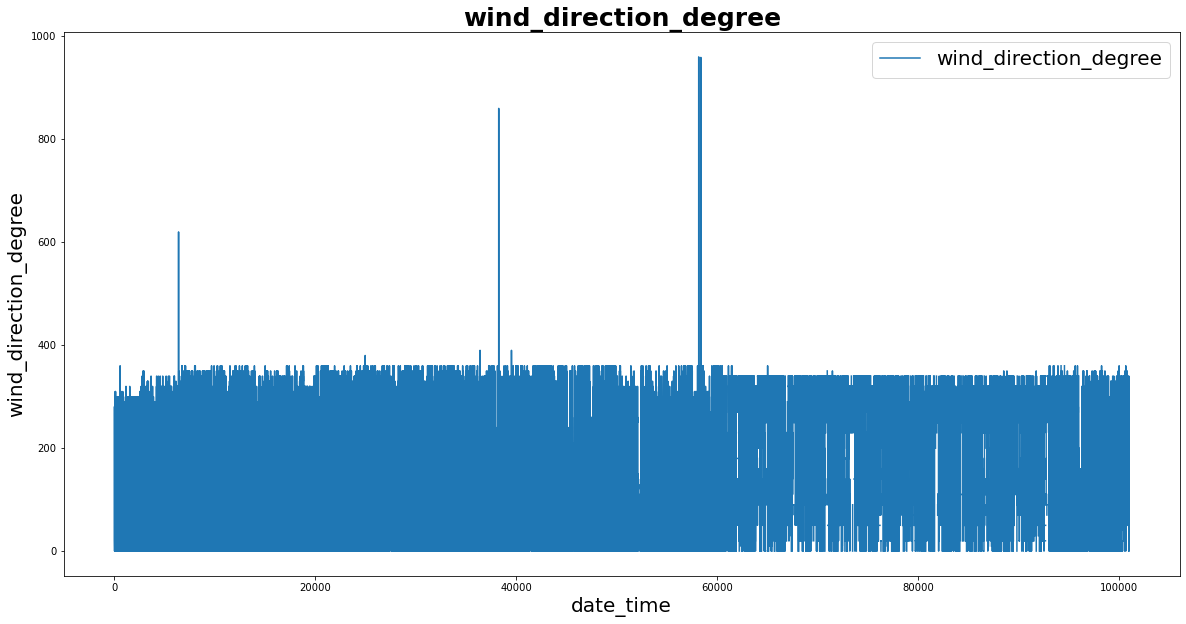

In [41]:
# visualising 'wind_direction_degree' variable

plt.figure(figsize = (20, 10))
data['wind_direction_degree'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('wind_direction_degree', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("wind_direction_degree", fontsize = 20)
plt.show()

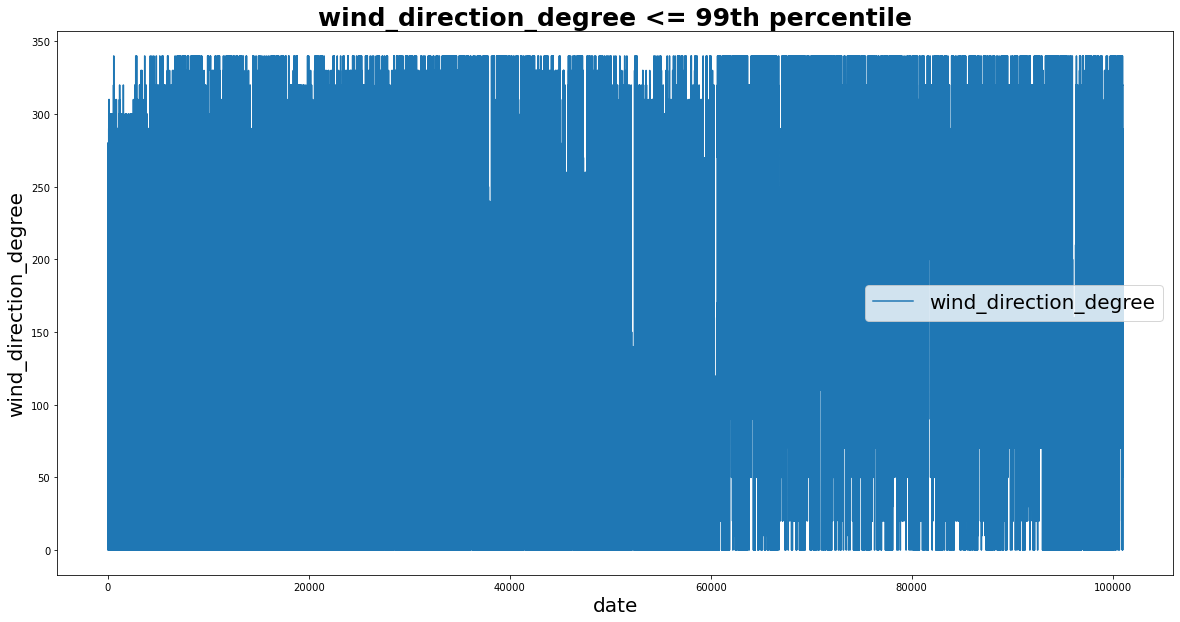

In [42]:
# plot the 'wind_direction_degree' column for the values less than 99 percentile

q99_wind_direction_degree = data.wind_direction_degree.quantile(0.99)
data.wind_direction_degree[data.wind_direction_degree < q99_wind_direction_degree].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('wind_direction_degree <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("wind_direction_degree", fontsize = 20)
plt.show()

**wind_gust variable**

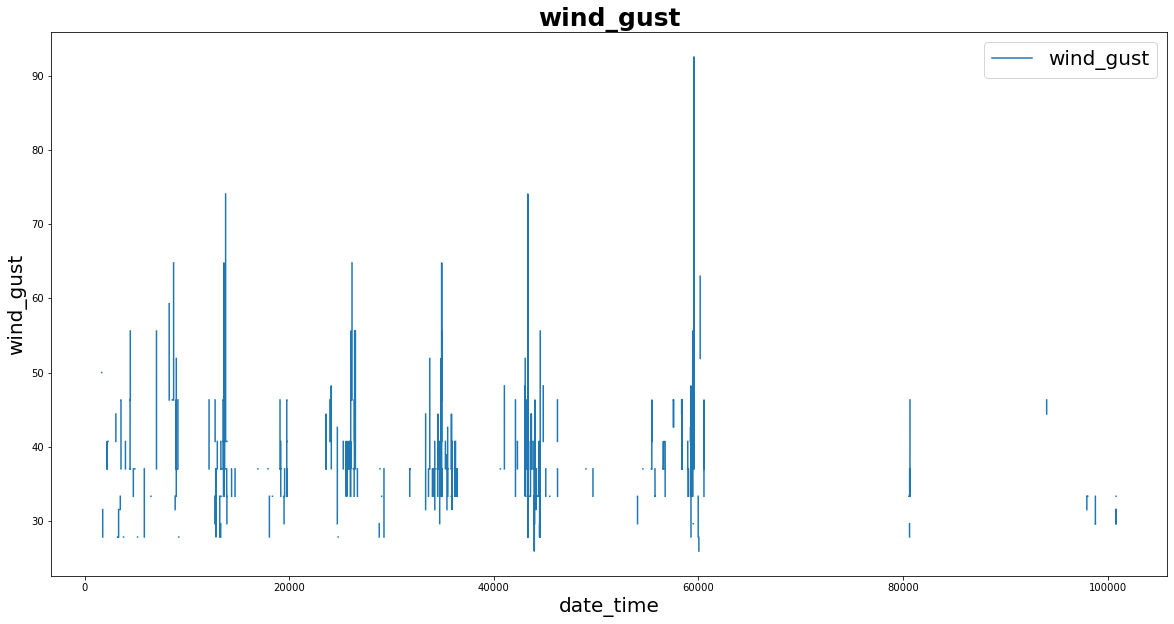

In [43]:
# visualising 'wind_gust' variable

plt.figure(figsize = (20, 10))
data['wind_gust'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('wind_gust', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("wind_gust", fontsize = 20)
plt.show()

**wind_chill variable**

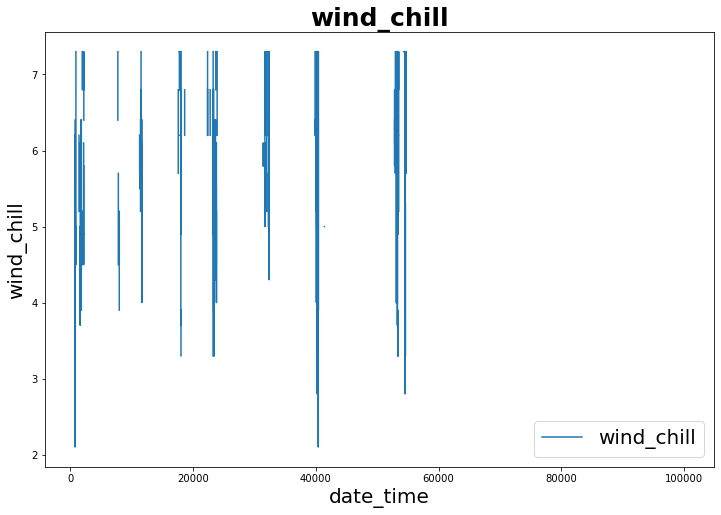

In [44]:
# visualising 'wind_chill' variable

plt.figure(figsize = (12, 8))
data['wind_chill'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('wind_chill', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("wind_chill", fontsize = 20)
plt.show()

**wind_speed variable**

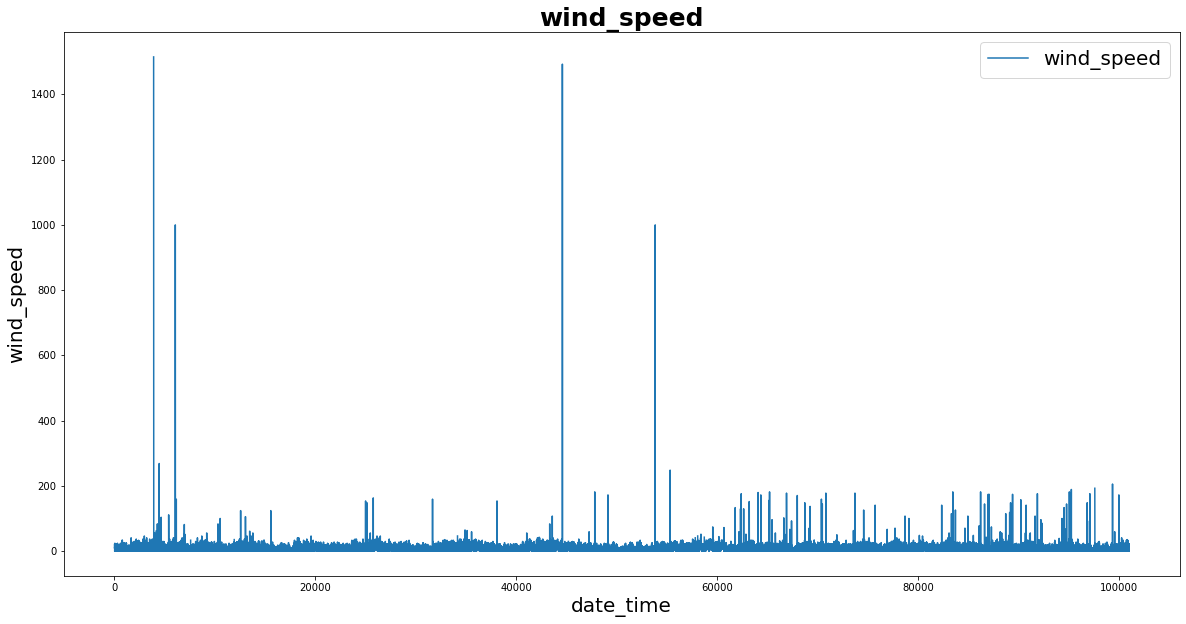

In [45]:
# visualising 'wind_speed' variable

plt.figure(figsize = (20, 10))
data['wind_speed'].plot()
plt.legend(loc = 'best', fontsize = 20)
plt.title('wind_speed', fontsize="25", fontweight="bold")
plt.xlabel("date_time", fontsize = 20)
plt.ylabel("wind_speed", fontsize = 20)
plt.show()

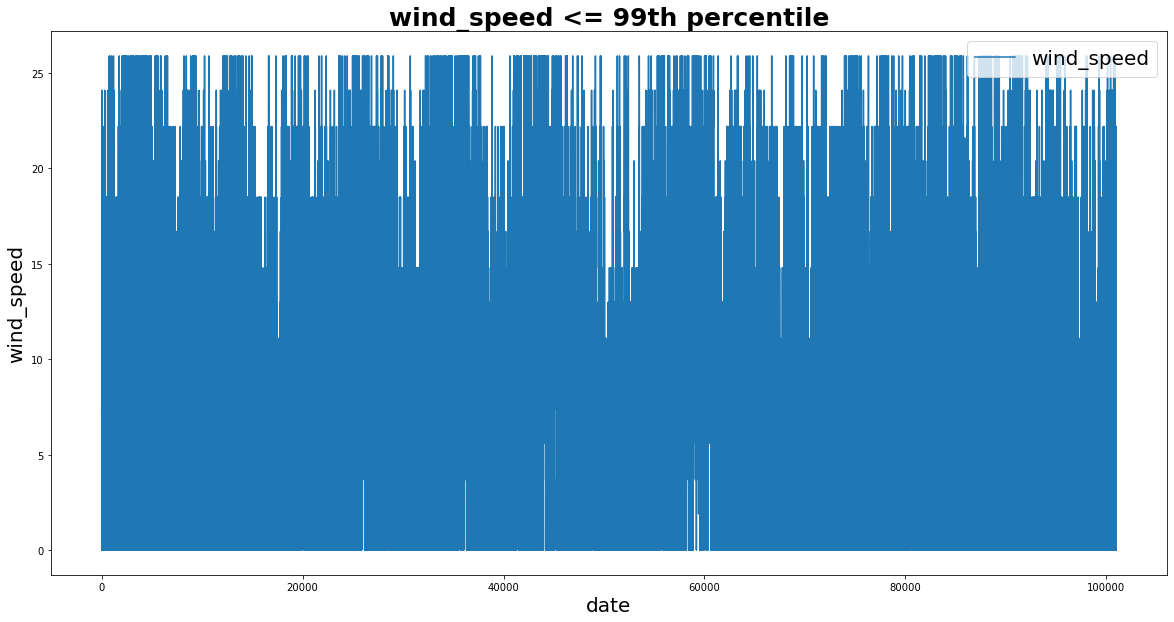

In [46]:
# plot the 'wind_speed' column for the values less than 99 percentile

q99_wind_speed = data.wind_speed.quantile(0.99)
data.wind_speed[data.wind_speed < q99_wind_speed].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.title('wind_speed <= 99th percentile', fontsize="25", fontweight="bold")
plt.xlabel("date", fontsize = 20)
plt.ylabel("wind_speed", fontsize = 20)
plt.show()

### Univariate Analysis - Binary variables

**fog variable**

In [47]:
data.fog.value_counts()

0    93952
1     7038
Name: fog, dtype: int64

In [48]:
data.fog.value_counts(normalize = True)

0    0.93031
1    0.06969
Name: fog, dtype: float64

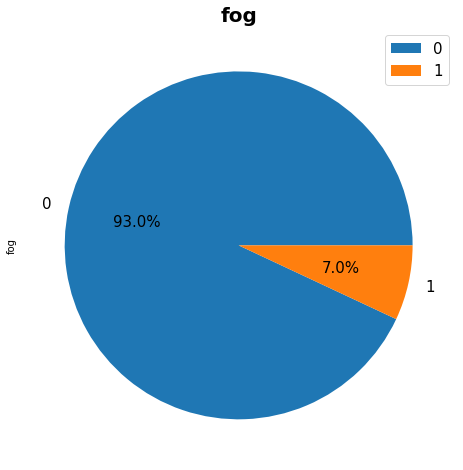

In [49]:
# plotting the 'fog' variable

data.fog.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.1f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('fog', fontsize = 20, fontweight = 'bold')
plt.show()

**hail variable**

In [50]:
data.hail.value_counts()

0    100977
1        13
Name: hail, dtype: int64

In [51]:
data.hail.value_counts(normalize = True)

0    0.999871
1    0.000129
Name: hail, dtype: float64

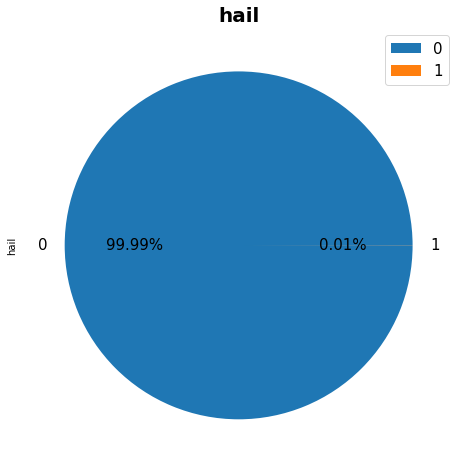

In [52]:
# plotting the 'hail' variable

data.hail.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.2f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('hail', fontsize = 20, fontweight = 'bold')
plt.show()

**rain variable**

In [53]:
data.rain.value_counts()

0    98338
1     2652
Name: rain, dtype: int64

In [54]:
data.rain.value_counts(normalize = True)

0    0.97374
1    0.02626
Name: rain, dtype: float64

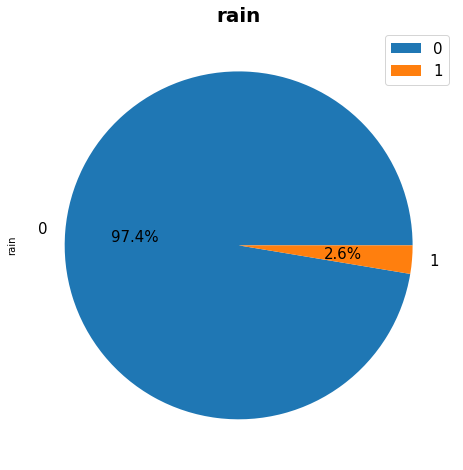

In [55]:
# plotting the 'rain' variable

data.rain.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.1f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('rain', fontsize = 20, fontweight = 'bold')
plt.show()

**snow variable**

In [56]:
data.snow.value_counts()

0    100989
1         1
Name: snow, dtype: int64

In [57]:
data.snow.value_counts(normalize = True)

0    0.99999
1    0.00001
Name: snow, dtype: float64

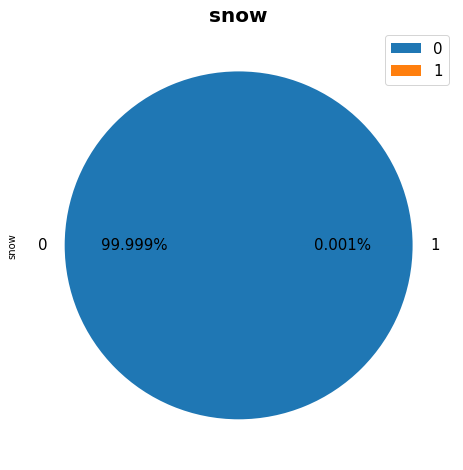

In [58]:
# plotting the 'snow' variable

data.snow.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.3f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('snow', fontsize = 20, fontweight = 'bold')
plt.show()

**thunder variable**

In [59]:
data.thunder.value_counts()

0    100038
1       952
Name: thunder, dtype: int64

In [60]:
data.thunder.value_counts(normalize = True)

0    0.990573
1    0.009427
Name: thunder, dtype: float64

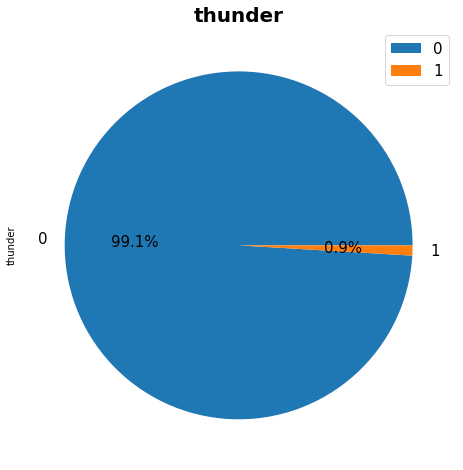

In [61]:
# plotting the 'thunder' variable

data.thunder.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.1f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('thunder', fontsize = 20, fontweight = 'bold')
plt.show()

**tornado variable**

In [62]:
data.tornado.value_counts()

0    100988
1         2
Name: tornado, dtype: int64

In [63]:
data.tornado.value_counts(normalize = True)

0    0.99998
1    0.00002
Name: tornado, dtype: float64

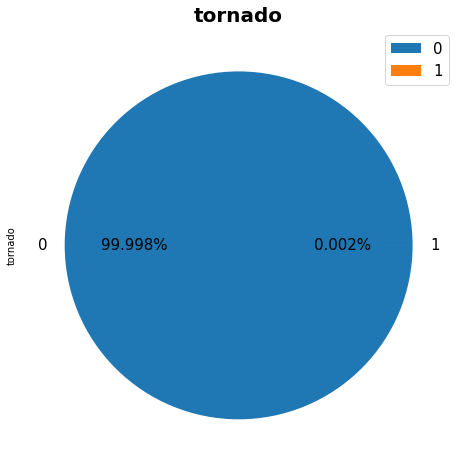

In [64]:
# plotting the 'tornado' variable

data.tornado.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.3f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('tornado', fontsize = 20, fontweight = 'bold')
plt.show()

### Univariate Analysis - Categorical variables

**condition variable**

In [65]:
data.condition.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

In [66]:
data.condition.value_counts(normalize = True)

Haze                             0.471690
Smoke                            0.205712
Mist                             0.092897
Clear                            0.031005
Widespread Dust                  0.028300
Fog                              0.027349
Scattered Clouds                 0.021889
Partly Cloudy                    0.020720
Shallow Fog                      0.018431
Mostly Cloudy                    0.015230
Light Rain                       0.012902
Partial Fog                      0.010216
Patches of Fog                   0.008928
Thunderstorms and Rain           0.004816
Heavy Fog                        0.004172
Light Drizzle                    0.004102
Rain                             0.003904
Unknown                          0.003795
Blowing Sand                     0.003746
Overcast                         0.003230
Thunderstorm                     0.001903
Light Thunderstorms and Rain     0.001744
Drizzle                          0.001110
Light Thunderstorm               0

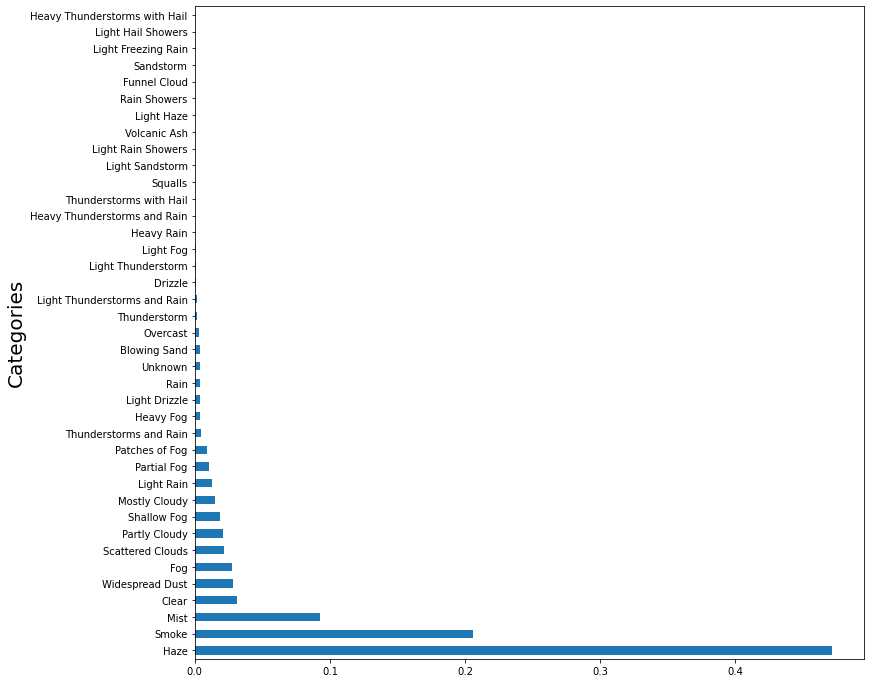

In [67]:
plt.figure(figsize = (12, 12))
data.condition.value_counts(normalize = True).plot.barh()
plt.ylabel('Categories', fontsize = 20)
plt.show()

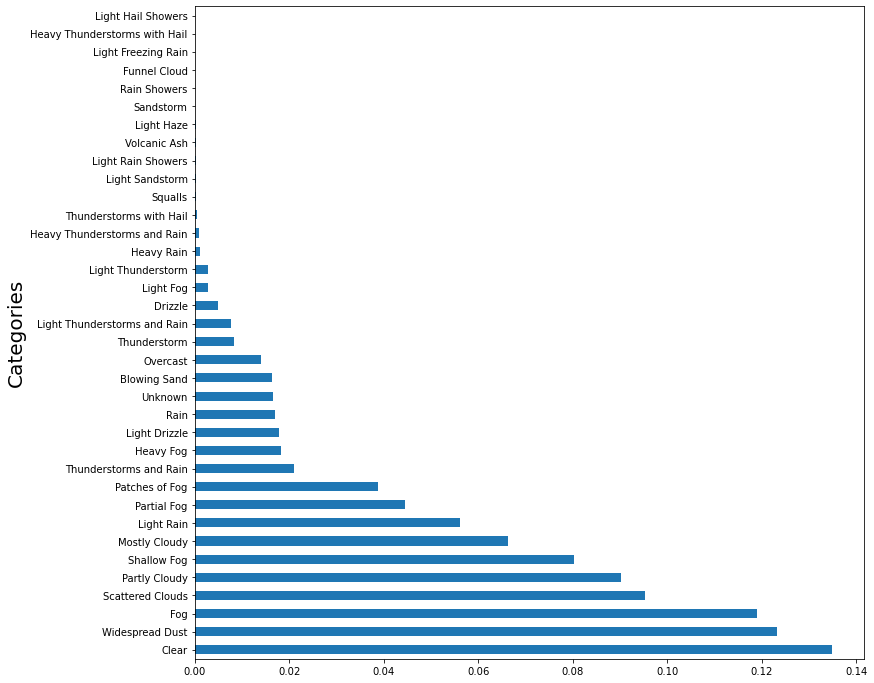

In [68]:
plt.figure(figsize = (12, 12))
exclude_categories = ['Haze', 'Smoke', 'Mist']
data.condition[~data.condition.isin(exclude_categories)].value_counts(normalize = True).plot.barh()
plt.ylabel('Categories', fontsize = 20)
plt.show()

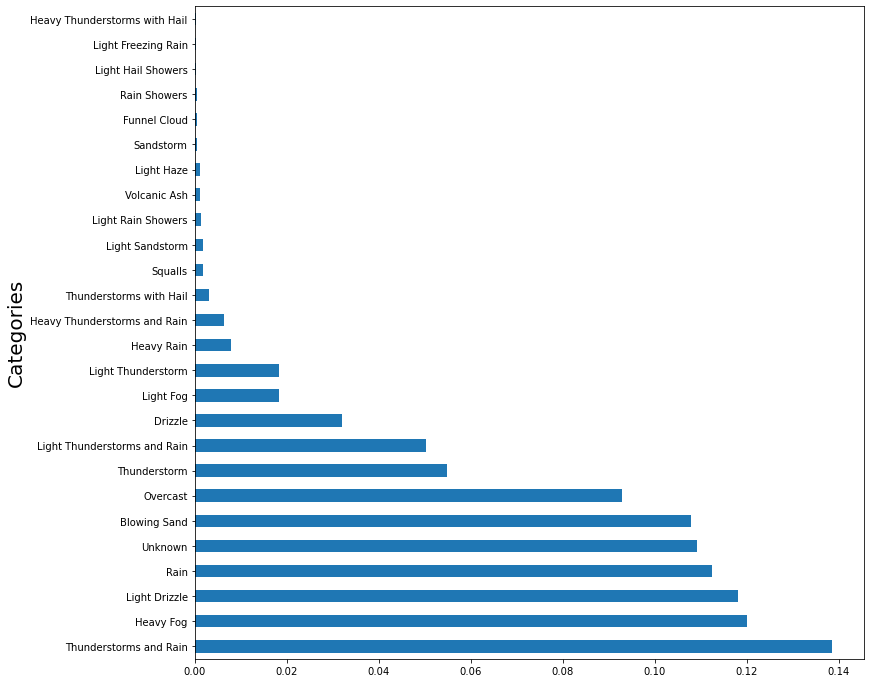

In [69]:
plt.figure(figsize = (12, 12))
exclude_categories = ['Haze', 'Smoke', 'Mist', 'Clear', 'Widespread Dust',
                      'Fog', 'Scattered Clouds', 'Partly Cloudy', 'Shallow Fog',
                      'Mostly Cloudy', 'Light Rain', 'Partial Fog', 'Patches of Fog']
data.condition[~data.condition.isin(exclude_categories)].value_counts(normalize = True).plot.barh()
plt.ylabel('Categories', fontsize = 20)
plt.show()

**wind_direction variable**

In [70]:
data.wind_direction.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: wind_direction, dtype: int64

In [71]:
data.wind_direction.value_counts(normalize = True)

North       0.220722
West        0.137856
WNW         0.086554
East        0.083875
NW          0.082530
WSW         0.063385
ESE         0.061877
ENE         0.043150
SE          0.040738
SW          0.037108
NNW         0.031263
NE          0.028991
SSE         0.023795
NNE         0.020317
SSW         0.019888
South       0.017893
Variable    0.000058
Name: wind_direction, dtype: float64

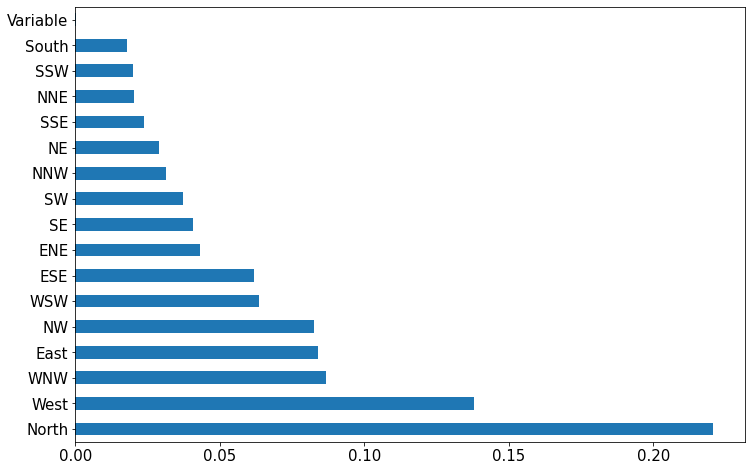

In [72]:
plt.figure(figsize = (12, 8))
data.wind_direction.value_counts(normalize = True).plot.barh(fontsize = 15)
plt.show()

## Bivariate Analysis

### Numerical - numerical analysis

**dew_point vs heat_index**

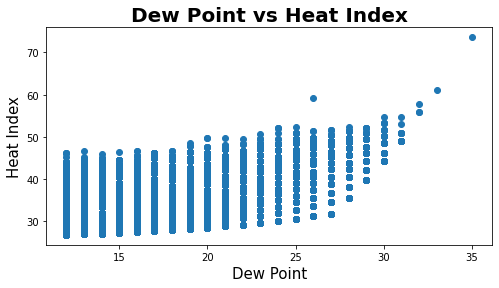

In [73]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.heat_index)
plt.title('Dew Point vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**dew_point vs humidity**

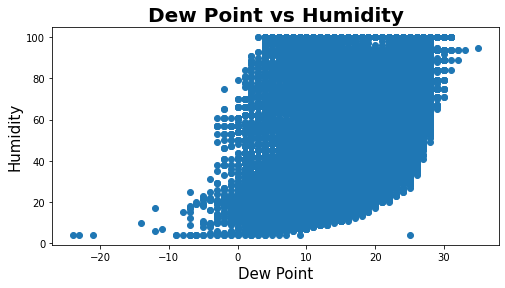

In [74]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.humidity)
plt.title('Dew Point vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**dew_point vs pressure**

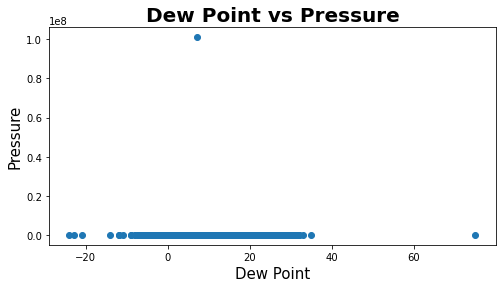

In [75]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.pressure)
plt.title('Dew Point vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**dew_point vs temperature**

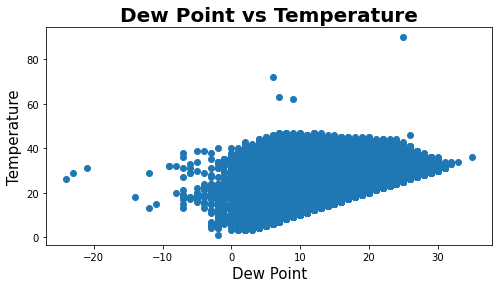

In [76]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.temperature)
plt.title('Dew Point vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**dew_point vs visibility**

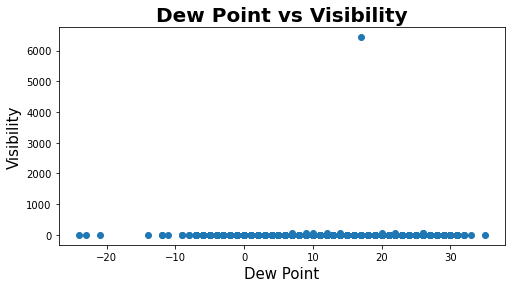

In [77]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.visibility)
plt.title('Dew Point vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**dew_point vs wind_direction_degree**

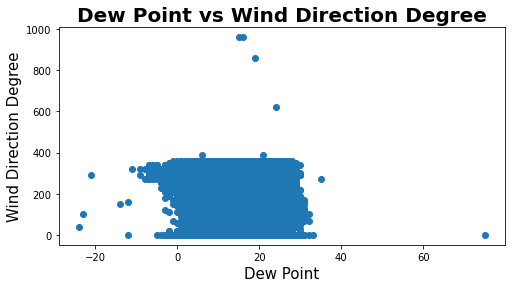

In [78]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.wind_direction_degree)
plt.title('Dew Point vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**dew_point vs wind_gust**

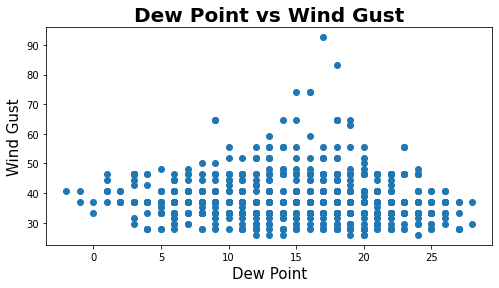

In [79]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.wind_gust)
plt.title('Dew Point vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**dew_point vs wind_chill**

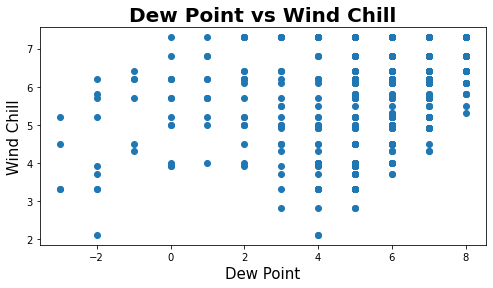

In [80]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.wind_chill)
plt.title('Dew Point vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**dew_point vs wind_speed**

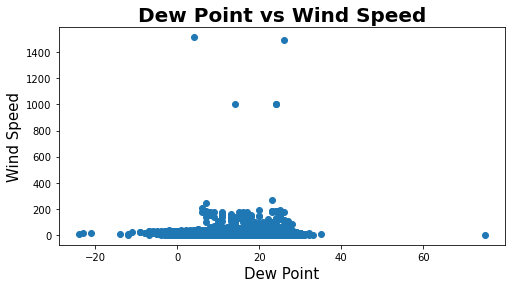

In [81]:
plt.figure(figsize = (8, 4))
plt.scatter(data.dew_point, data.wind_speed)
plt.title('Dew Point vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**heat_index vs humidity**

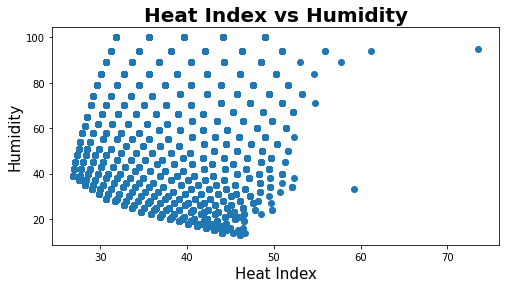

In [82]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.humidity)
plt.title('Heat Index vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**heat_index vs pressure**

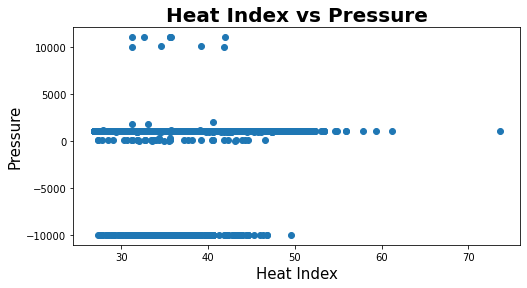

In [83]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.pressure)
plt.title('Heat Index vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**heat_index vs temperature**

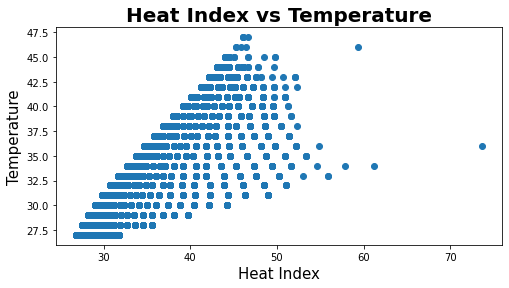

In [84]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.temperature)
plt.title('Heat Index vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**heat_index vs visibility**

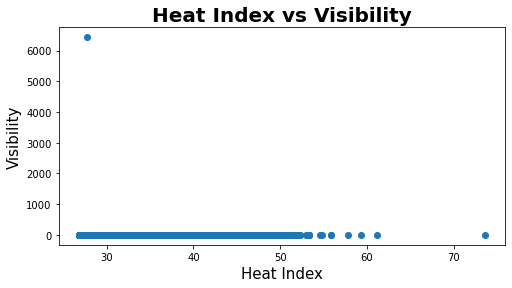

In [85]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.visibility)
plt.title('Heat Index vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**heat_index vs wind_direction_degree**

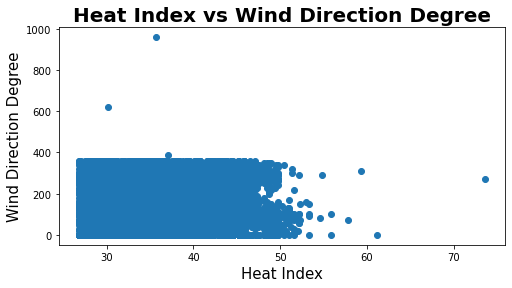

In [86]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.wind_direction_degree)
plt.title('Heat Index vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**heat_index vs wind_gust**

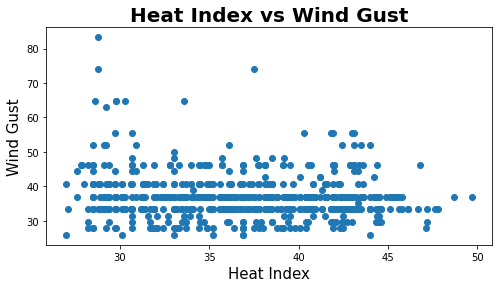

In [87]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.wind_gust)
plt.title('Heat Index vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**heat_index vs wind_speed**

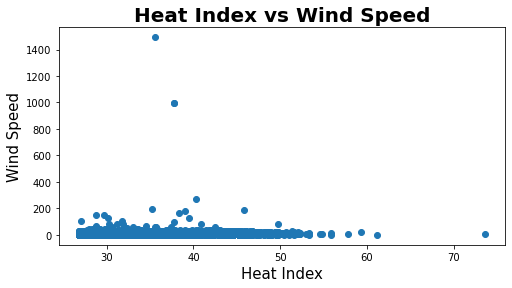

In [88]:
plt.figure(figsize = (8, 4))
plt.scatter(data.heat_index, data.wind_speed)
plt.title('Heat Index vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**humidity vs pressure**

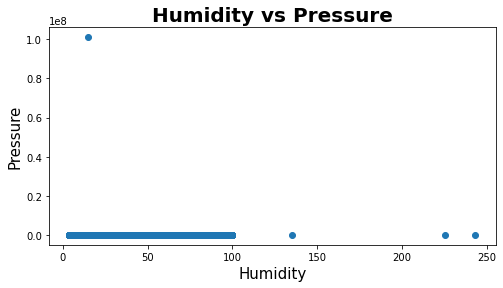

In [89]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.pressure)
plt.title('Humidity vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**humidity vs temperature**

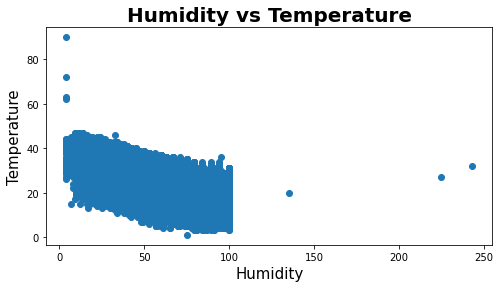

In [90]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.temperature)
plt.title('Humidity vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**humidity vs visibility**

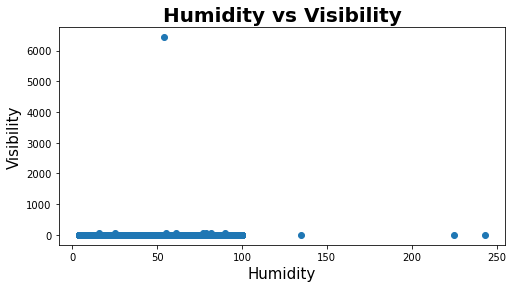

In [91]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.visibility)
plt.title('Humidity vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**humidity vs wind_direction_degree**

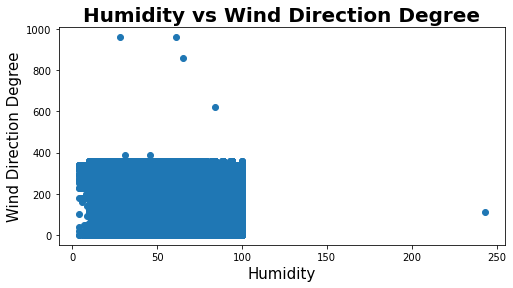

In [92]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.wind_direction_degree)
plt.title('Humidity vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**humidity vs wind_gust**

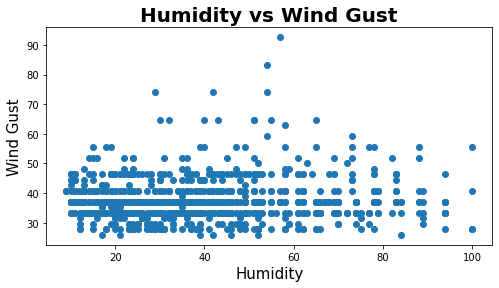

In [93]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.wind_gust)
plt.title('Humidity vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**humidity vs wind_chill**

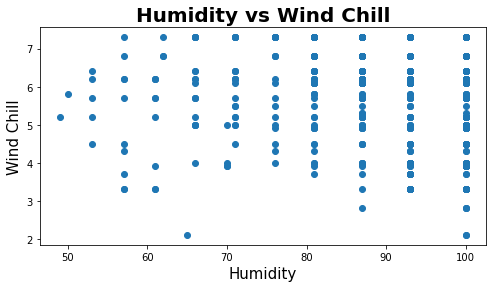

In [94]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.wind_chill)
plt.title('Humidity vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**humidity vs wind_speed**

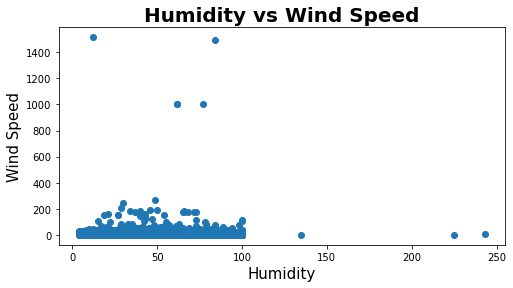

In [95]:
plt.figure(figsize = (8, 4))
plt.scatter(data.humidity, data.wind_speed)
plt.title('Humidity vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**pressure vs temperature**

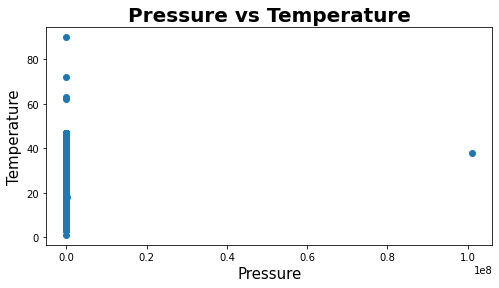

In [96]:
plt.figure(figsize = (8, 4))
plt.scatter(data.pressure, data.temperature)
plt.title('Pressure vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**pressure vs visibility**

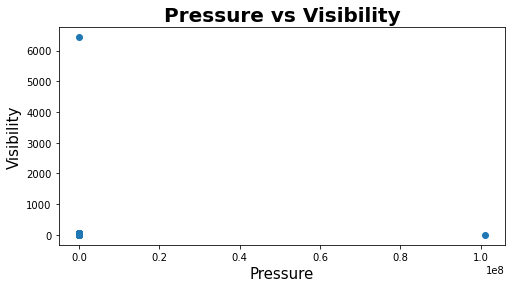

In [97]:
plt.figure(figsize = (8, 4))
plt.scatter(data.pressure, data.visibility)
plt.title('Pressure vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**pressure vs wind_direction_degree**

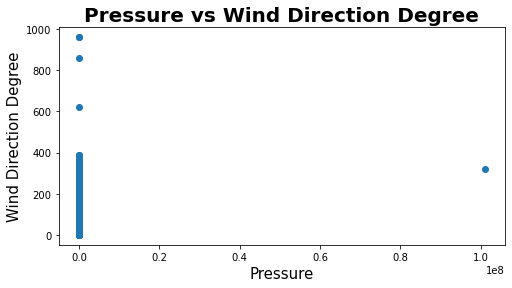

In [98]:
plt.figure(figsize = (8, 4))
plt.scatter(data.pressure, data.wind_direction_degree)
plt.title('Pressure vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**pressure vs wind_gust**

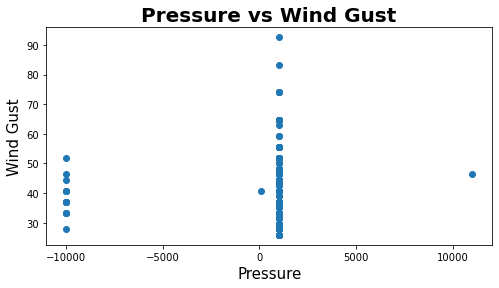

In [99]:
plt.figure(figsize = (8, 4))
plt.scatter(data.pressure, data.wind_gust)
plt.title('Pressure vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**pressure vs wind_chill**

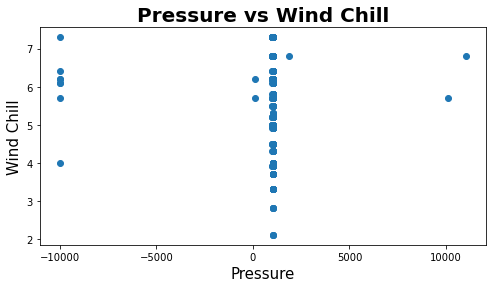

In [100]:
plt.figure(figsize = (8, 4))
plt.scatter(data.pressure, data.wind_chill)
plt.title('Pressure vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**pressure vs wind_speed**

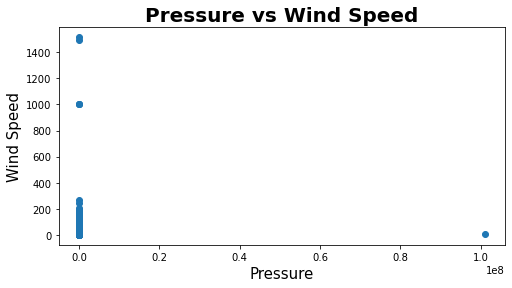

In [101]:
plt.figure(figsize = (8, 4))
plt.scatter(data.pressure, data.wind_speed)
plt.title('Pressure vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**temperature vs visibility**

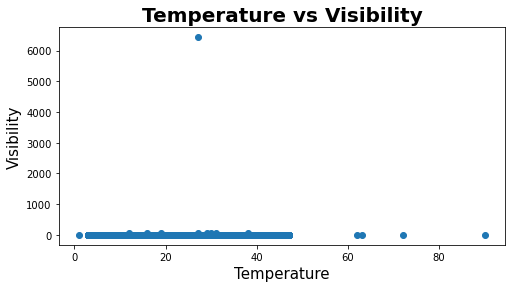

In [102]:
plt.figure(figsize = (8, 4))
plt.scatter(data.temperature, data.visibility)
plt.title('Temperature vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**temperature vs wind_direction_degree**

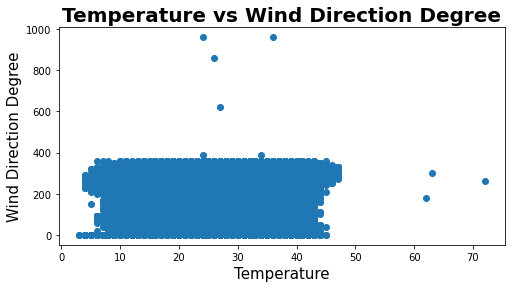

In [103]:
plt.figure(figsize = (8, 4))
plt.scatter(data.temperature, data.wind_direction_degree)
plt.title('Temperature vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**temperature vs wind_gust**

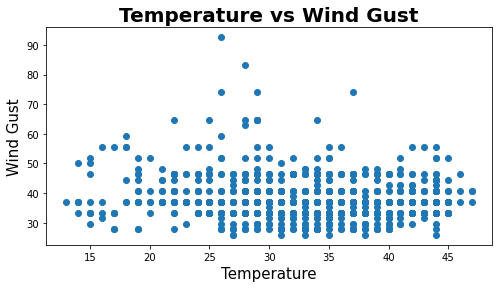

In [104]:
plt.figure(figsize = (8, 4))
plt.scatter(data.temperature, data.wind_gust)
plt.title('Temperature vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**temperature vs wind_chill**

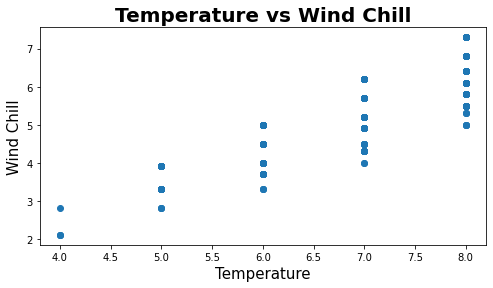

In [105]:
plt.figure(figsize = (8, 4))
plt.scatter(data.temperature, data.wind_chill)
plt.title('Temperature vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**temperature vs wind_speed**

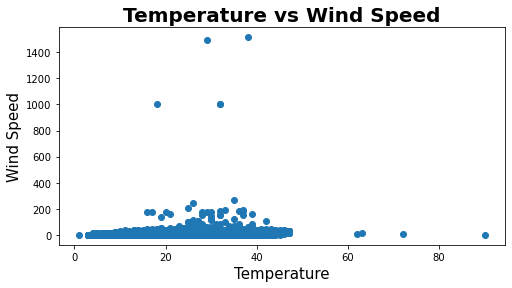

In [106]:
plt.figure(figsize = (8, 4))
plt.scatter(data.temperature, data.wind_speed)
plt.title('Temperature vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**visibility vs wind_direction_degree**

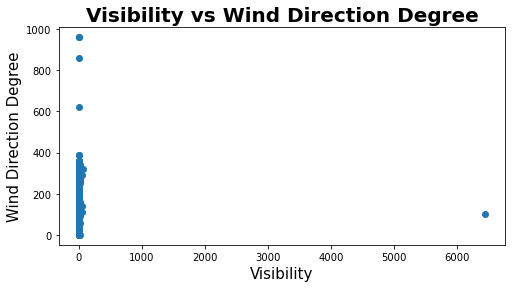

In [107]:
plt.figure(figsize = (8, 4))
plt.scatter(data.visibility, data.wind_direction_degree)
plt.title('Visibility vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**visibility vs wind_gust**

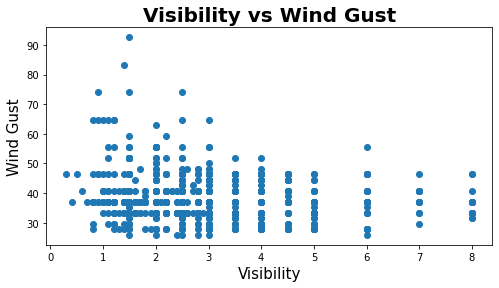

In [108]:
plt.figure(figsize = (8, 4))
plt.scatter(data.visibility, data.wind_gust)
plt.title('Visibility vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**visibility vs wind_chill**

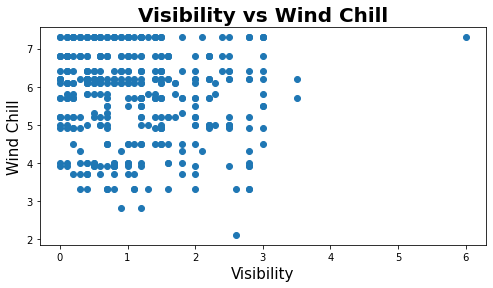

In [109]:
plt.figure(figsize = (8, 4))
plt.scatter(data.visibility, data.wind_chill)
plt.title('Visibility vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**visibility vs wind_speed**

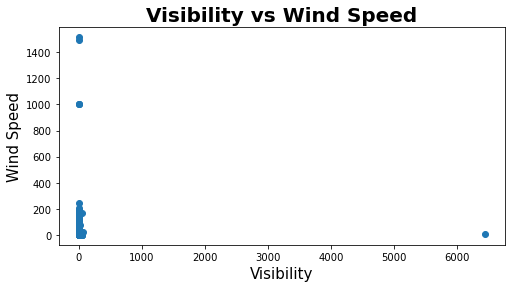

In [110]:
plt.figure(figsize = (8, 4))
plt.scatter(data.visibility, data.wind_speed)
plt.title('Visibility vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**wind_direction_degree vs wind_gust**

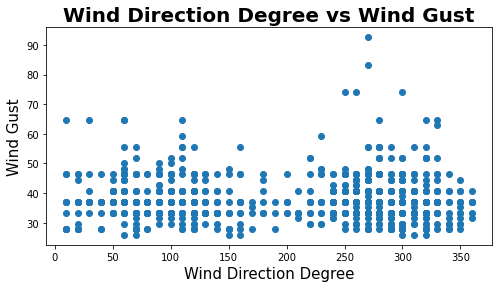

In [111]:
plt.figure(figsize = (8, 4))
plt.scatter(data.wind_direction_degree, data.wind_gust)
plt.title('Wind Direction Degree vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**wind_direction_degree vs wind_chill**

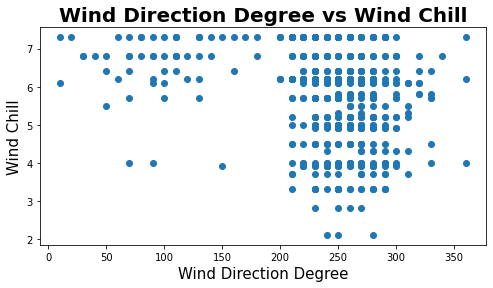

In [112]:
plt.figure(figsize = (8, 4))
plt.scatter(data.wind_direction_degree, data.wind_chill)
plt.title('Wind Direction Degree vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**wind_direction_degree vs wind_speed**

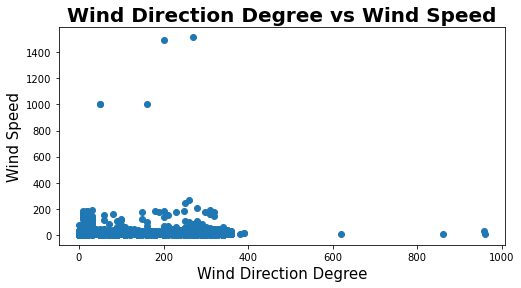

In [113]:
plt.figure(figsize = (8, 4))
plt.scatter(data.wind_direction_degree, data.wind_speed)
plt.title('Wind Direction Degree vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**wind_gust vs wind_speed**

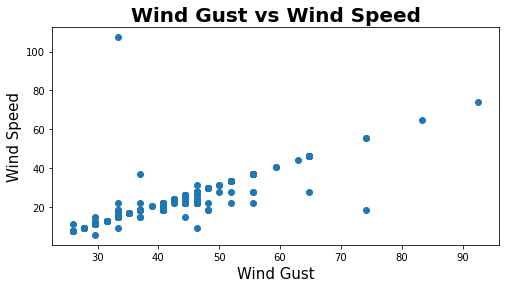

In [114]:
plt.figure(figsize = (8, 4))
plt.scatter(data.wind_gust, data.wind_speed)
plt.title('Wind Gust vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Gust', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**wind_chill vs wind_speed**

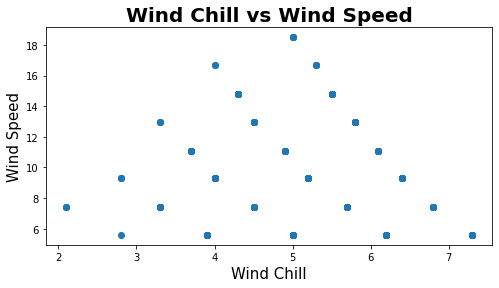

In [115]:
plt.figure(figsize = (8, 4))
plt.scatter(data.wind_chill, data.wind_speed)
plt.title('Wind Chill vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Chill', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

### Binary - numerical analysis

In [116]:
# map the binary variables to the yes/no

df = data.copy()
df['fog_with_yes_no'] = df['fog'].map({0: 'No', 1: 'Yes'})
df['hail_with_yes_no'] = df['hail'].map({0: 'No', 1: 'Yes'})
df['rain_with_yes_no'] = df['rain'].map({0: 'No', 1: 'Yes'})
df['snow_with_yes_no'] = df['snow'].map({0: 'No', 1: 'Yes'})
df['thunder_with_yes_no'] = df['thunder'].map({0: 'No', 1: 'Yes'})
df['tornado_with_yes_no'] = df['tornado'].map({0: 'No', 1: 'Yes'})
df.head()

,date_time,condition,dew_point,fog,hail,heat_index,humidity,pressure,rain,snow,...,year,month,day,hour,fog_with_yes_no,hail_with_yes_no,rain_with_yes_no,snow_with_yes_no,thunder_with_yes_no,tornado_with_yes_no
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,...,1996,11,1,11,No,No,No,No,No,No
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,...,1996,11,1,12,No,No,No,No,No,No
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,...,1996,11,1,13,No,No,No,No,No,No
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,...,1996,11,1,14,No,No,No,No,No,No
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,...,1996,11,1,16,No,No,No,No,No,No


**fog vs dew_point**

In [117]:
df.groupby('fog_with_yes_no')['dew_point'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,93393.0,16.161490,7.076738,-24.0,10.0,16.0,23.0,75.0
Yes,6976.0,10.114536,3.516586,-12.0,8.0,10.0,12.0,28.0


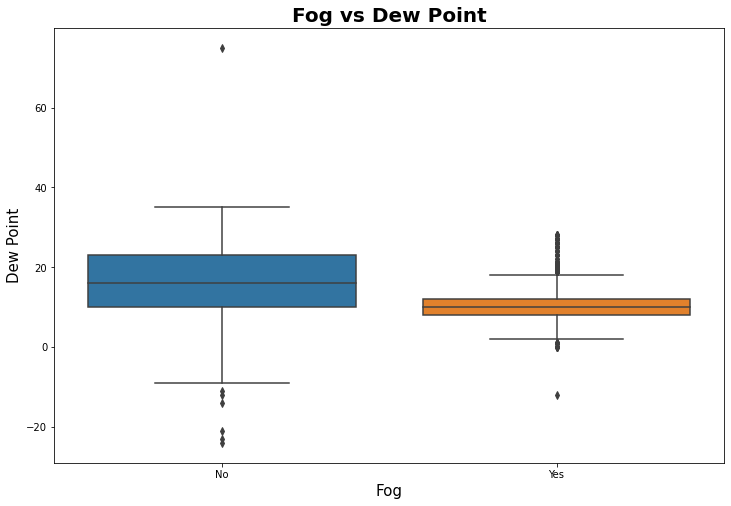

In [118]:
# boxplot of fog and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'dew_point')
plt.title('Fog vs Dew Point', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

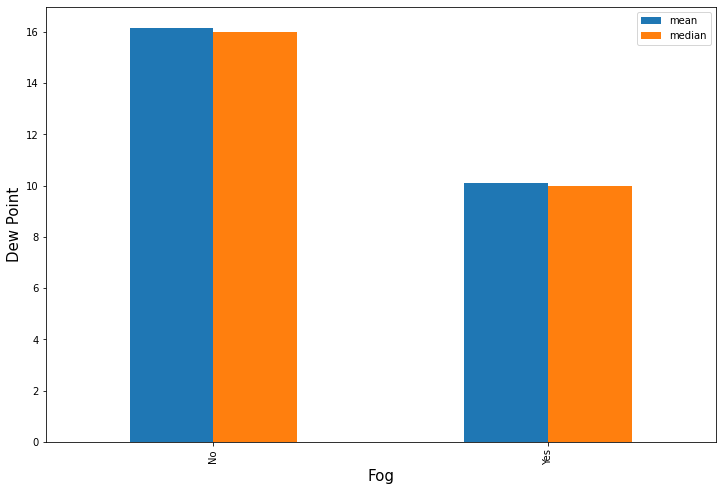

In [119]:
df.groupby('fog_with_yes_no')['dew_point'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

**fog vs heat_index**

In [120]:
df.groupby('fog_with_yes_no')['heat_index'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,29136.0,35.652183,5.016188,26.8,31.7,35.1,39.2,73.6
Yes,19.0,34.926316,3.596888,29.6,31.8,34.5,38.1,42.3


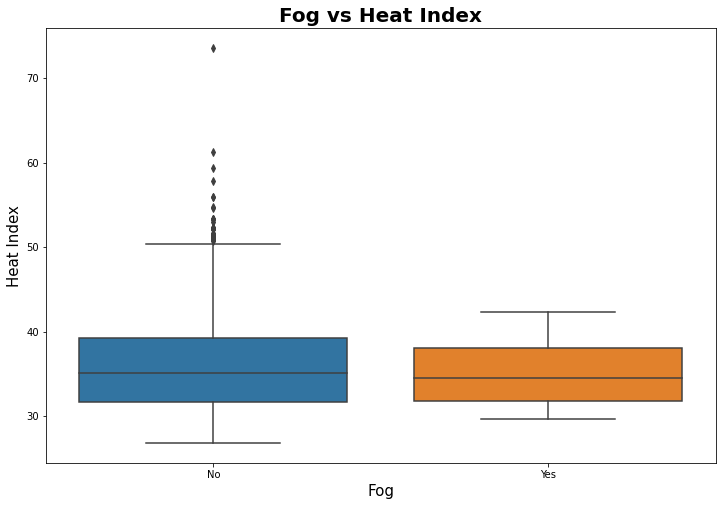

In [121]:
# boxplot of fog and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'heat_index')
plt.title('Fog vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

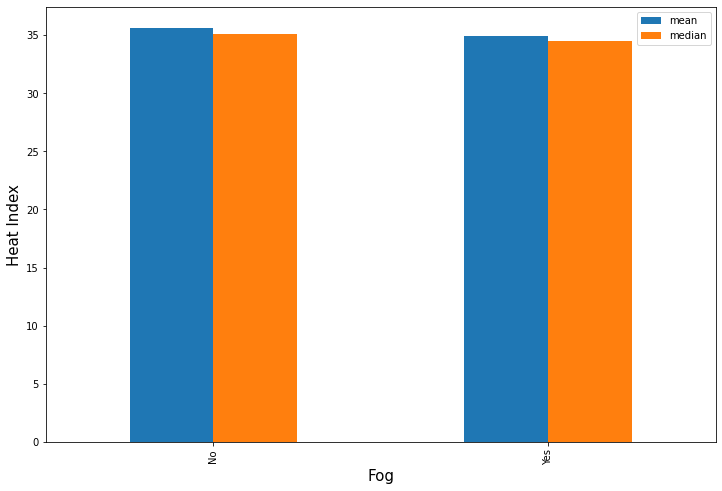

In [122]:
df.groupby('fog_with_yes_no')['heat_index'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**fog vs humidity**

In [123]:
df.groupby('fog_with_yes_no')['humidity'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,93267.0,55.445549,22.714488,4.0,37.0,56.0,74.0,243.0
Yes,6966.0,90.898794,8.844267,4.0,87.0,93.0,100.0,100.0


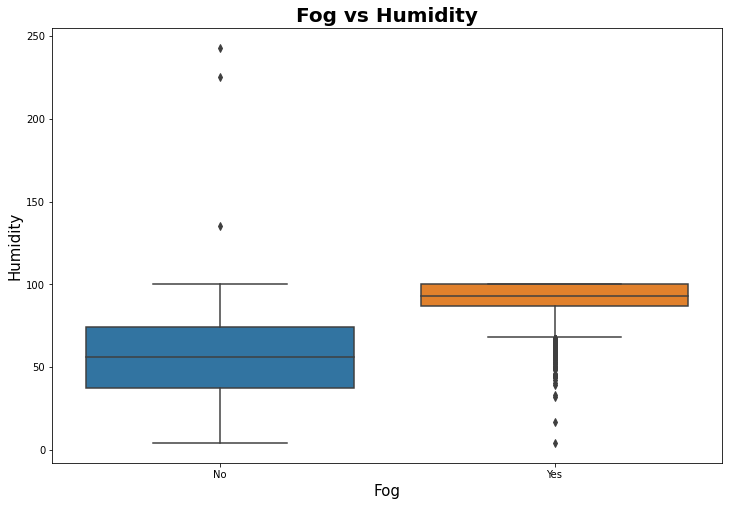

In [124]:
# boxplot of fog and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'humidity')
plt.title('Fog vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

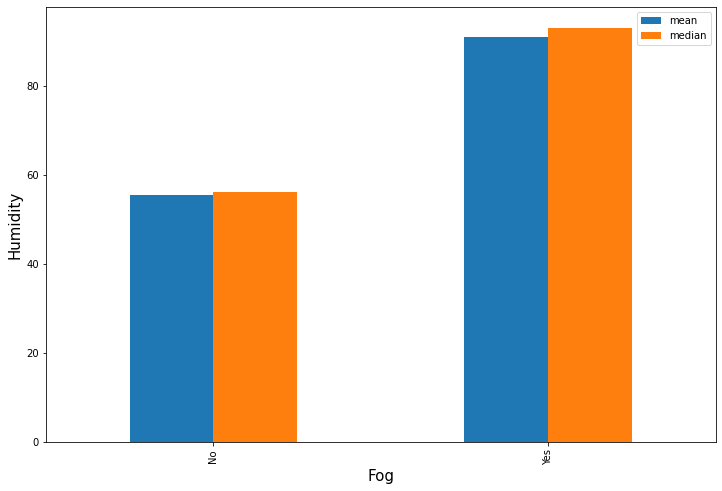

In [125]:
df.groupby('fog_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**fog vs pressure**

In [126]:
df.groupby('fog_with_yes_no')['pressure'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,93723.0,2008.628851,330111.310561,-9999.0,1001.0,1007.0,1014.0,101061443.0
Yes,7035.0,915.860697,1144.570444,-9999.0,1015.0,1017.0,1019.0,11014.0


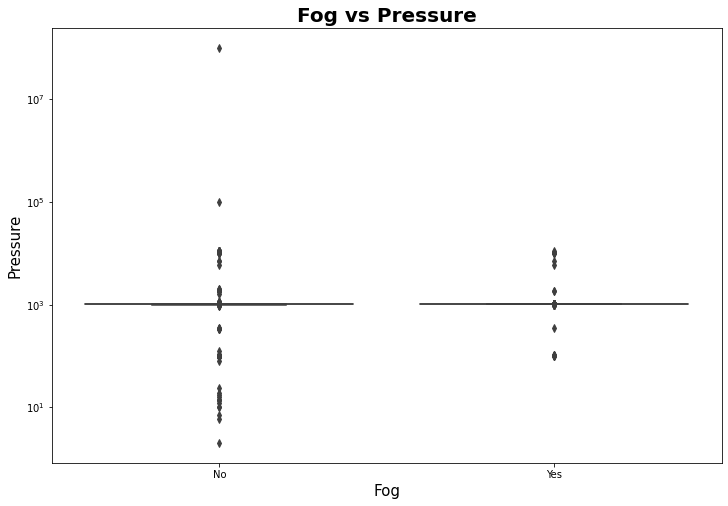

In [127]:
# boxplot of fog and pressure
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'pressure')
plt.title('Fog vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

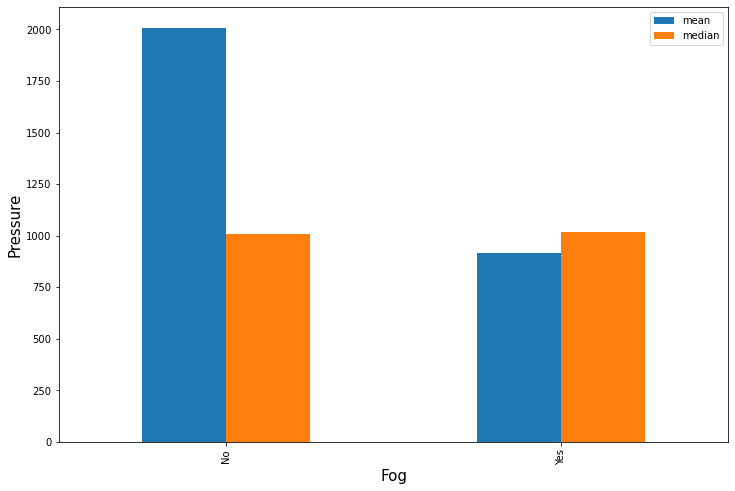

In [128]:
df.groupby('fog_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**fog vs temperature**

In [129]:
df.groupby('fog_with_yes_no')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,93335.0,26.496555,7.778183,1.0,21.0,28.0,32.0,72.0
Yes,6982.0,11.477943,3.908935,3.0,9.0,11.0,13.0,90.0


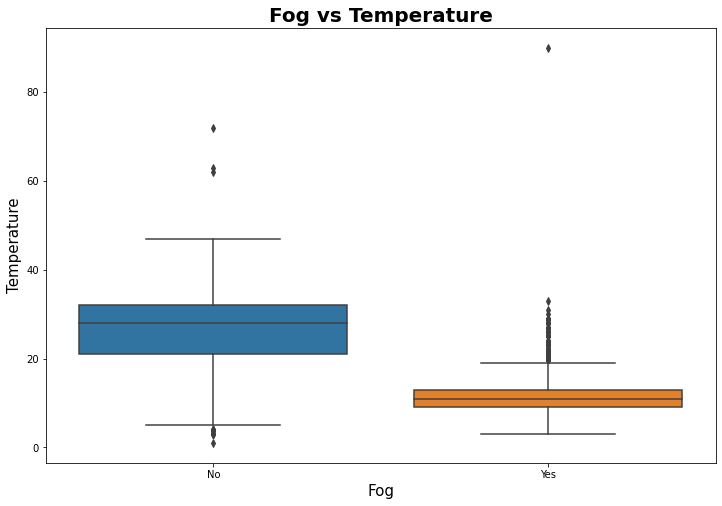

In [130]:
# boxplot of fog and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'temperature')
plt.title('Fog vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

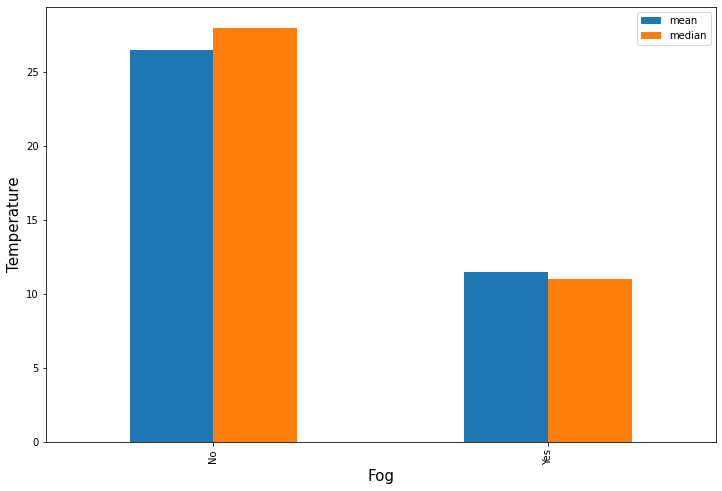

In [131]:
df.groupby('fog_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**fog vs visibility**

In [132]:
df.groupby('fog_with_yes_no')['visibility'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,90730.0,2.523846,21.396556,0.0,2.0,2.0,3.0,6436.0
Yes,5832.0,0.519215,0.353746,0.0,0.3,0.5,0.7,9.0


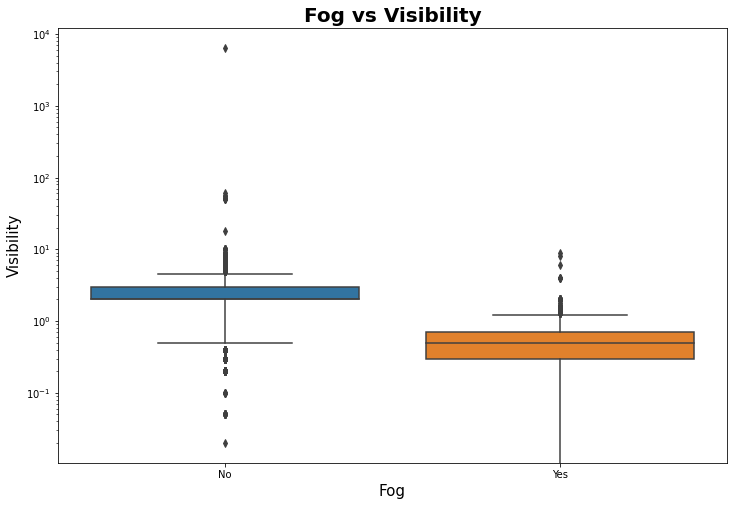

In [133]:
# boxplot of fog and visibility
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'visibility')
plt.title('Fog vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

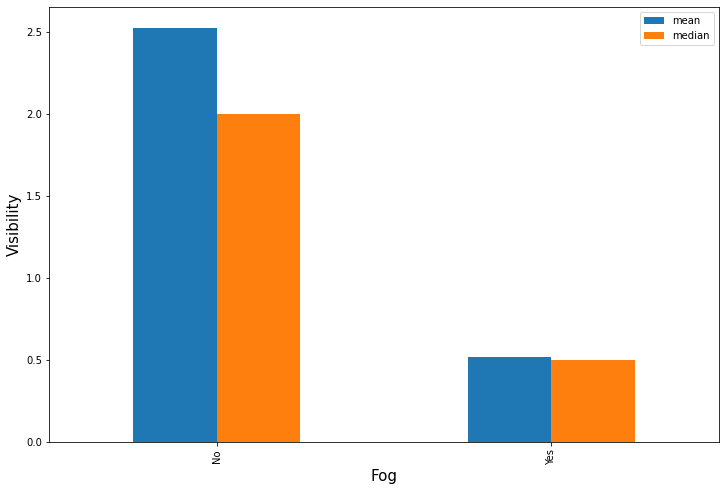

In [134]:
df.groupby('fog_with_yes_no')['visibility'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**fog vs wind_direction_degree**

In [135]:
df.groupby('fog_with_yes_no')['wind_direction_degree'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,80853.0,166.491831,119.042169,0.0,60.0,160.0,270.0,960.0
Yes,5382.0,119.354887,125.567956,0.0,0.0,70.0,250.0,360.0


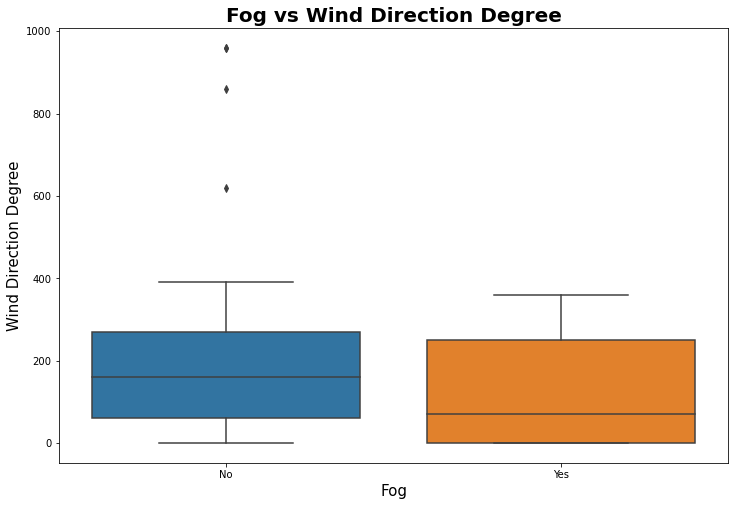

In [136]:
# boxplot of fog and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'wind_direction_degree')
plt.title('Fog vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

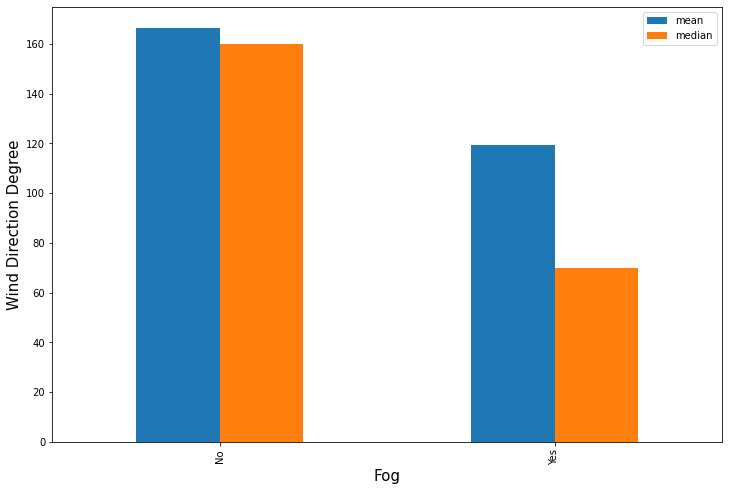

In [137]:
df.groupby('fog_with_yes_no')['wind_direction_degree'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**fog vs wind_gust**

In [138]:
df.groupby('fog_with_yes_no')['wind_gust'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,1072.0,37.671175,6.848666,25.9,33.3,37.0,40.7,92.6
Yes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


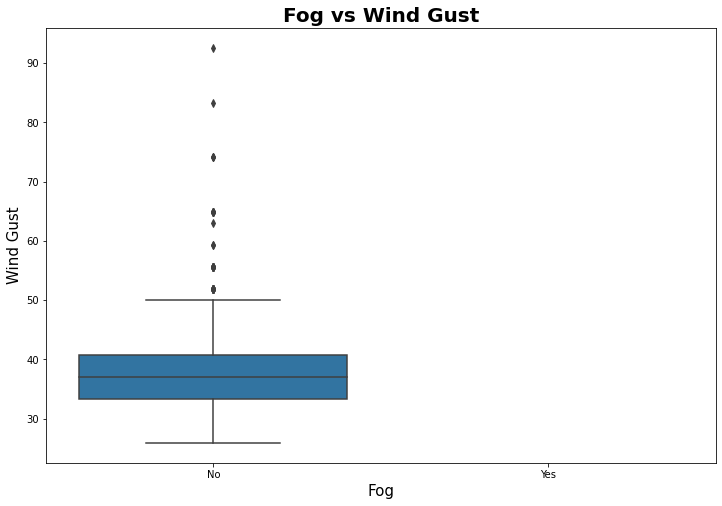

In [139]:
# boxplot of fog and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'wind_gust')
plt.title('Fog vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

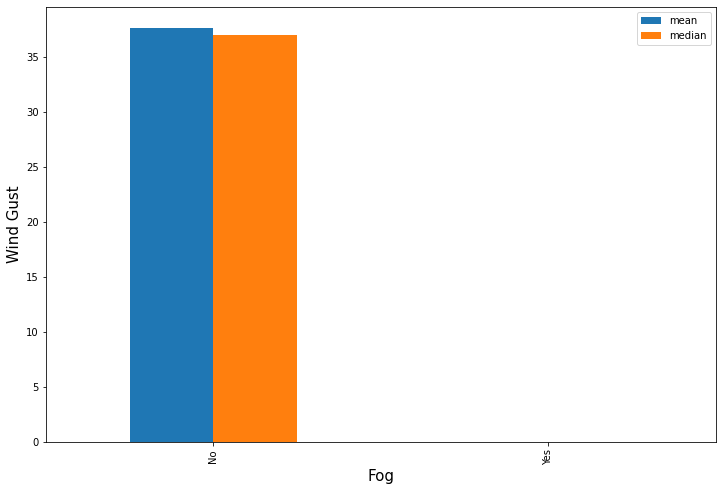

In [140]:
df.groupby('fog_with_yes_no')['wind_gust'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**fog vs wind_chill**

In [141]:
df.groupby('fog_with_yes_no')['wind_chill'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,227.0,5.737004,1.165411,2.1,5.0,6.1,6.8,7.3
Yes,352.0,5.698864,1.228507,2.1,4.9,6.1,6.8,7.3


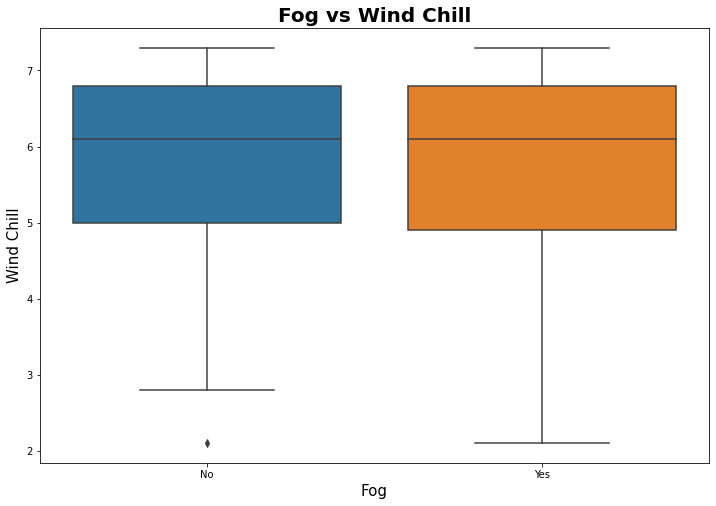

In [142]:
# boxplot of fog and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'wind_chill')
plt.title('Fog vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

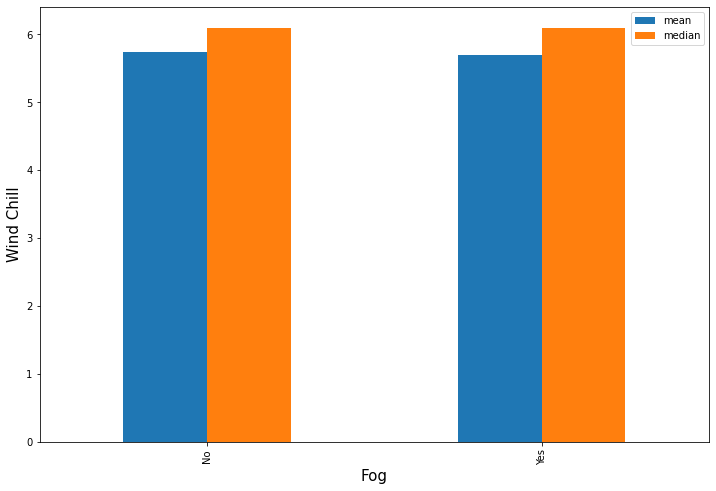

In [143]:
df.groupby('fog_with_yes_no')['wind_chill'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**fog vs wind_speed**

In [144]:
df.groupby('fog_with_yes_no')['wind_speed'].describe()

,count,mean,std,min,25%,50%,75%,max
fog_with_yes_no,,,,,,,,
No,91914.0,8.002573,12.203786,0.0,0.0,7.4,11.1,1514.9
Yes,6718.0,3.244076,5.619911,0.0,0.0,0.0,5.6,174.1


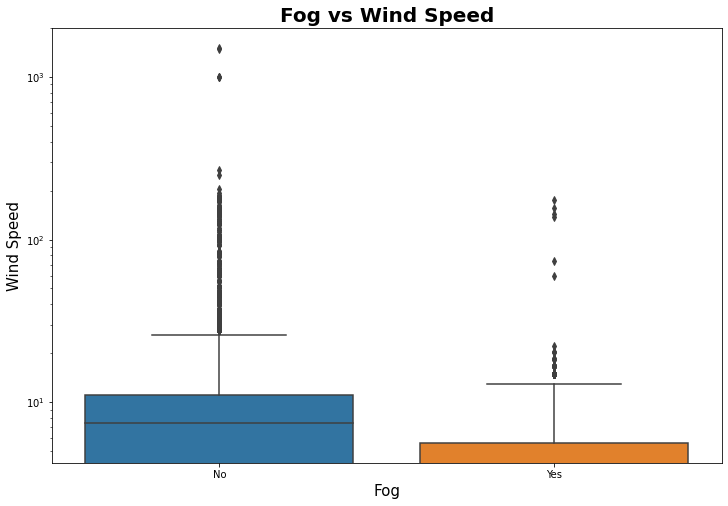

In [145]:
# boxplot of fog and wind_speed
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'fog_with_yes_no', y = 'wind_speed')
plt.title('Fog vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

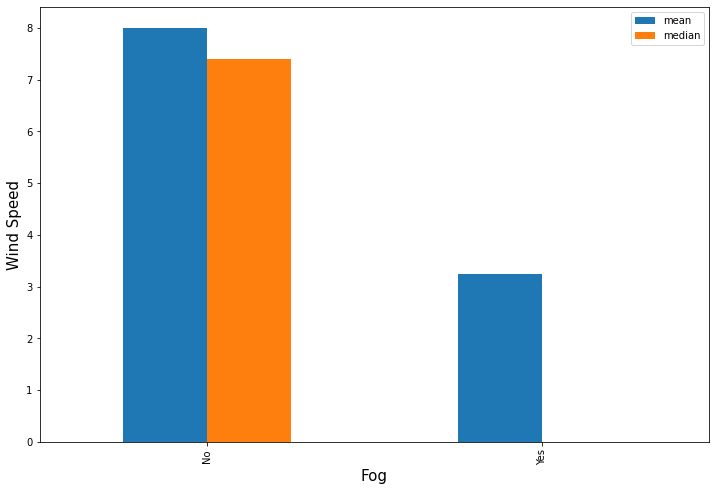

In [146]:
df.groupby('fog_with_yes_no')['wind_speed'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Fog', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**hail vs dew_point**

In [147]:
df.groupby('hail_with_yes_no')['dew_point'].describe()

,count,mean,std,min,25%,50%,75%,max
hail_with_yes_no,,,,,,,,
No,100356.0,15.740922,7.058756,-24.0,10.0,15.0,22.0,75.0
Yes,13.0,17.923077,5.376826,11.0,13.0,17.0,23.0,26.0


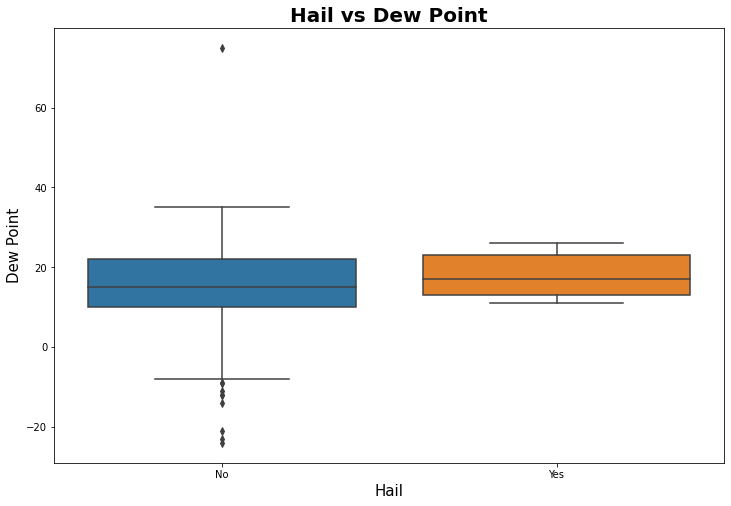

In [148]:
# boxplot of hail and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'dew_point')
plt.title('Hail vs Dew Point', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['dew_point'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

**hail vs heat_index**

In [ ]:
df.groupby('hail_with_yes_no')['heat_index'].describe()

In [ ]:
# boxplot of hail and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'heat_index')
plt.title('Hail vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['heat_index'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**hail vs humidity**

In [ ]:
df.groupby('hail_with_yes_no')['humidity'].describe()

In [ ]:
# boxplot of hail and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'humidity')
plt.title('Hail vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**hail vs pressure**

In [ ]:
df.groupby('hail_with_yes_no')['pressure'].describe()

In [ ]:
# boxplot of hail and pressure
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'pressure')
plt.title('Hail vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**hail vs temperature**

In [ ]:
df.groupby('hail_with_yes_no')['temperature'].describe()

In [ ]:
# boxplot of hail and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'temperature')
plt.title('Hail vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**hail vs visibility**

In [ ]:
df.groupby('hail_with_yes_no')['visibility'].describe()

In [ ]:
# boxplot of hail and visibility
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'visibility')
plt.title('Hail vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['visibility'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**hail vs wind_direction_degree**

In [ ]:
df.groupby('hail_with_yes_no')['wind_direction_degree'].describe()

In [ ]:
# boxplot of hail and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'wind_direction_degree')
plt.title('Hail vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['wind_direction_degree'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**hail vs wind_gust**

In [ ]:
df.groupby('hail_with_yes_no')['wind_gust'].describe()

In [ ]:
# boxplot of hail and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'wind_gust')
plt.title('Hail vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['wind_gust'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**hail vs wind_chill**

In [ ]:
df.groupby('hail_with_yes_no')['wind_chill'].describe()

In [ ]:
# boxplot of hail and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'wind_chill')
plt.title('Hail vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['wind_chill'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**hail vs wind speed**

In [ ]:
df.groupby('hail_with_yes_no')['wind_speed'].describe()

In [ ]:
# boxplot of hail and wind_speed
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'hail_with_yes_no', y = 'wind_speed')
plt.title('Hail vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

In [ ]:
df.groupby('hail_with_yes_no')['wind_speed'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Hail', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**rain vs dew_point**

In [ ]:
df.groupby('rain_with_yes_no')['dew_point'].describe()

In [ ]:
# boxplot of rain and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'dew_point')
plt.title('Rain vs Dew Point', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['dew_point'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

**rain vs heat_index**

In [ ]:
df.groupby('rain_with_yes_no')['heat_index'].describe()

In [ ]:
# boxplot of rain and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'heat_index')
plt.title('Rain vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['heat_index'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**rain vs humidity**

In [ ]:
df.groupby('rain_with_yes_no')['humidity'].describe()

In [ ]:
# boxplot of rain and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'humidity')
plt.title('Rain vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**rain vs pressure**

In [ ]:
df.groupby('rain_with_yes_no')['pressure'].describe()

In [ ]:
# boxplot of rain and pressure
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'pressure')
plt.title('Rain vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**rain vs temperature**

In [ ]:
df.groupby('rain_with_yes_no')['temperature'].describe()

In [ ]:
# boxplot of rain and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'temperature')
plt.title('Rain vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**rain vs visibility**

In [ ]:
df.groupby('rain_with_yes_no')['visibility'].describe()

In [ ]:
# boxplot of rain and visibility
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'visibility')
plt.title('Rain vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['visibility'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**rain vs wind_direction_degree**

In [ ]:
df.groupby('rain_with_yes_no')['wind_direction_degree'].describe()

In [ ]:
# boxplot of rain and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'wind_direction_degree')
plt.title('Rain vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['wind_direction_degree'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**rain vs wind_gust**

In [ ]:
df.groupby('rain_with_yes_no')['wind_gust'].describe()

In [ ]:
# boxplot of rain and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'wind_gust')
plt.title('Rain vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['wind_gust'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**rain vs wind_chill**

In [ ]:
df.groupby('rain_with_yes_no')['wind_chill'].describe()

In [ ]:
# boxplot of rain and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'wind_chill')
plt.title('Rain vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['wind_chill'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**rain vs wind_speed**

In [ ]:
df.groupby('rain_with_yes_no')['wind_speed'].describe()

In [ ]:
# boxplot of rain and wind_speed
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'wind_speed')
plt.title('Rain vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['wind_speed'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Rain', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**snow vs dew_point**

In [ ]:
df.groupby('snow_with_yes_no')['dew_point'].describe()

In [ ]:
# boxplot of snow and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'dew_point')
plt.title('Snow vs Dew Point', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['dew_point'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

**snow vs heat_index**

In [ ]:
df.groupby('snow_with_yes_no')['heat_index'].describe()

In [ ]:
# boxplot of snow and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'heat_index')
plt.title('Snow vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['heat_index'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**snow vs humidity**

In [ ]:
df.groupby('snow_with_yes_no')['humidity'].describe()

In [ ]:
# boxplot of snow and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'humidity')
plt.title('Snow vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**snow vs pressure**

In [ ]:
df.groupby('snow_with_yes_no')['pressure'].describe()

In [ ]:
# boxplot of snow and pressure
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'pressure')
plt.title('Snow vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**snow vs temperature**

In [ ]:
df.groupby('snow_with_yes_no')['temperature'].describe()

In [ ]:
# boxplot of snow and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'temperature')
plt.title('Snow vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**snow vs visibility**

In [ ]:
df.groupby('snow_with_yes_no')['visibility'].describe()

In [ ]:
# boxplot of snow and visibility
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'visibility')
plt.title('Snow vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['visibility'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**snow vs wind_direction_degree**

In [ ]:
df.groupby('snow_with_yes_no')['wind_direction_degree'].describe()

In [ ]:
# boxplot of snow and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'wind_direction_degree')
plt.title('Snow vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['wind_direction_degree'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**snow vs wind_gust**

In [ ]:
df.groupby('snow_with_yes_no')['wind_gust'].describe()

In [ ]:
# boxplot of snow and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'wind_gust')
plt.title('Snow vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['wind_gust'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**snow vs wind_chill**

In [ ]:
df.groupby('snow_with_yes_no')['wind_chill'].describe()

In [ ]:
# boxplot of snow and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'wind_chill')
plt.title('Snow vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['wind_chill'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**snow vs wind_speed**

In [ ]:
df.groupby('snow_with_yes_no')['wind_speed'].describe()

In [ ]:
# boxplot of snow and wind_speed
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'snow_with_yes_no', y = 'wind_speed')
plt.title('Snow vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

In [ ]:
df.groupby('snow_with_yes_no')['wind_speed'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Snow', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**thunder vs dew_point**

In [ ]:
df.groupby('thunder_with_yes_no')['dew_point'].describe()

In [ ]:
# boxplot of thunder and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'dew_point')
plt.title('Thunder vs Dew Point', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['dew_point'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

**thunder vs heat_index**

In [ ]:
df.groupby('thunder_with_yes_no')['heat_index'].describe()

In [ ]:
# boxplot of thunder and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'heat_index')
plt.title('Thunder vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['heat_index'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**thunder vs humidity**

In [ ]:
df.groupby('thunder_with_yes_no')['humidity'].describe()

In [ ]:
# boxplot of thunder and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'humidity')
plt.title('Thunder vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**thunder vs pressure**

In [ ]:
df.groupby('thunder_with_yes_no')['pressure'].describe()

In [ ]:
# boxplot of thunder and pressure
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'pressure')
plt.title('Thunder vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**thunder vs temperature**

In [ ]:
df.groupby('thunder_with_yes_no')['temperature'].describe()

In [ ]:
# boxplot of thunder and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'temperature')
plt.title('Thunder vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**thunder vs visibility**

In [ ]:
df.groupby('thunder_with_yes_no')['visibility'].describe()

In [ ]:
# boxplot of thunder and visibility
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'visibility')
plt.title('Thunder vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['visibility'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**thunder vs wind_direction_degree**

In [ ]:
df.groupby('thunder_with_yes_no')['wind_direction_degree'].describe()

In [ ]:
# boxplot of thunder and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'wind_direction_degree')
plt.title('Thunder vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['wind_direction_degree'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**thunder vs wind_gust**

In [ ]:
df.groupby('thunder_with_yes_no')['wind_gust'].describe()

In [ ]:
# boxplot of thunder and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'wind_gust')
plt.title('Thunder vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['wind_gust'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**thunder vs wind_chill**

In [ ]:
df.groupby('thunder_with_yes_no')['wind_chill'].describe()

In [ ]:
# boxplot of thunder and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'wind_chill')
plt.title('Thunder vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['wind_chill'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**thunder vs wind_speed**

In [ ]:
df.groupby('thunder_with_yes_no')['wind_speed'].describe()

In [ ]:
# boxplot of thunder and wind_speed
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'thunder_with_yes_no', y = 'wind_speed')
plt.title('Thunder vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

In [ ]:
df.groupby('thunder_with_yes_no')['wind_speed'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Thunder', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

**tornado vs dew_point**

In [ ]:
df.groupby('tornado_with_yes_no')['dew_point'].describe()

In [ ]:
# boxplot of tornado and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'dew_point')
plt.title('Tornado vs Dew Point', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['dew_point'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Dew Point', fontsize = 15)
plt.show()

**tornado vs heat_index**

In [ ]:
df.groupby('tornado_with_yes_no')['heat_index'].describe()

In [ ]:
# boxplot of tornado and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'heat_index')
plt.title('Tornado vs Heat Index', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['heat_index'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Heat Index', fontsize = 15)
plt.show()

**tornado vs humidity**

In [ ]:
df.groupby('tornado_with_yes_no')['humidity'].describe()

In [ ]:
# boxplot of tornado and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'humidity')
plt.title('Tornado vs Humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Humidity', fontsize = 15)
plt.show()

**tornado vs pressure**

In [ ]:
df.groupby('tornado_with_yes_no')['pressure'].describe()

In [ ]:
# boxplot of tornado and pressure
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'pressure')
plt.title('Tornado vs Pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Pressure', fontsize = 15)
plt.show()

**tornado vs temperature**

In [ ]:
df.groupby('tornado_with_yes_no')['temperature'].describe()

In [ ]:
# boxplot of tornado and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'temperature')
plt.title('Tornado vs Temperature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.show()

**tornado vs visibility**

In [ ]:
df.groupby('tornado_with_yes_no')['visibility'].describe()

In [ ]:
# boxplot of tornado and visibility
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'visibility')
plt.title('Tornado vs Visibility', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['visibility'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.show()

**tornado vs wind_direction_degree**

In [ ]:
df.groupby('tornado_with_yes_no')['wind_direction_degree'].describe()

In [ ]:
# boxplot of tornado and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'wind_direction_degree')
plt.title('Tornado vs Wind Direction Degree', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['wind_direction_degree'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Direction Degree', fontsize = 15)
plt.show()

**tornado vs wind_gust**

In [ ]:
df.groupby('tornado_with_yes_no')['wind_gust'].describe()

In [ ]:
# boxplot of tornado and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'wind_gust')
plt.title('Tornado vs Wind Gust', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['wind_gust'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Gust', fontsize = 15)
plt.show()

**tornado vs wind_chill**

In [ ]:
df.groupby('tornado_with_yes_no')['wind_chill'].describe()

In [ ]:
# boxplot of tornado and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'wind_chill')
plt.title('Tornado vs Wind Chill', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['wind_chill'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Chill', fontsize = 15)
plt.show()

**tornado vs wind_speed**

In [ ]:
df.groupby('tornado_with_yes_no')['wind_speed'].describe()

In [ ]:
# boxplot of tornado and wind_speed
plt.figure(figsize = (12, 8))
plt.yscale('log')
sns.boxplot(data = df, x = 'tornado_with_yes_no', y = 'wind_speed')
plt.title('Tornado vs Wind Speed', fontsize = 20, fontweight = 'bold')
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

In [ ]:
df.groupby('tornado_with_yes_no')['wind_speed'].aggregate(['mean', 'median']).plot.bar(figsize = (12, 8))
plt.xlabel('Tornado', fontsize = 15)
plt.ylabel('Wind Speed', fontsize = 15)
plt.show()

### Categorical - Numerical analysis

**condition vs dew_point**

In [ ]:
df.groupby('condition')['dew_point'].describe()

In [ ]:
# boxplot of condition and dew_point
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'dew_point', y = 'condition')
plt.title('Dew Point vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['dew_point'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs heat_index**

In [ ]:
df.groupby('condition')['heat_index'].describe()

In [ ]:
# boxplot of condition and heat_index
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'heat_index', y = 'condition')
plt.title('Heat Index vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['heat_index'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs humidity**

In [ ]:
df.groupby('condition')['humidity'].describe()

In [ ]:
# boxplot of condition and humidity
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'humidity', y = 'condition')
plt.title('Humidity vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['humidity'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs pressure**

In [ ]:
df.groupby('condition')['pressure'].describe()

In [ ]:
# boxplot of condition and pressure
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'pressure', y = 'condition')
plt.xscale('log')
plt.title('Pressure vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['pressure'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs temperature**

In [ ]:
df.groupby('condition')['temperature'].describe()

In [ ]:
# boxplot of condition and temperature
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'temperature', y = 'condition')
plt.title('Temperature vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['temperature'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs visibility**

In [ ]:
df.groupby('condition')['visibility'].describe()

In [ ]:
# boxplot of condition and visibility
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'visibility', y = 'condition')
plt.xscale('log')
plt.title('Visibility vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['visibility'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs wind_direction_degree**

In [ ]:
df.groupby('condition')['wind_direction_degree'].describe()

In [ ]:
# boxplot of condition and wind_direction_degree
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'wind_direction_degree', y = 'condition')
plt.title('Wind Direction Degree vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['wind_direction_degree'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs wind_gust**

In [ ]:
df.groupby('condition')['wind_gust'].describe()

In [ ]:
# boxplot of condition and wind_gust
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'wind_gust', y = 'condition')
plt.title('Wind Gust vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Gust', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['wind_gust'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Gust', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs wind_chill**

In [ ]:
df.groupby('condition')['wind_chill'].describe()

In [ ]:
# boxplot of condition and wind_chill
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'wind_chill', y = 'condition')
plt.title('Wind Chill vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Chill', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['wind_chill'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Chill', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**condition vs wind_speed**

In [ ]:
df.groupby('condition')['wind_speed'].describe()

In [ ]:
# boxplot of condition and wind_speed
plt.figure(figsize = (12, 12))
sns.boxplot(data = df, x = 'wind_speed', y = 'condition')
plt.xscale('log')
plt.title('Wind Speed vs Condition', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Speed', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

In [ ]:
df.groupby('condition')['wind_speed'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Speed', fontsize = 15)
plt.ylabel('Condition', fontsize = 15)
plt.show()

**wind_direction vs dew_point**

In [ ]:
df.groupby('wind_direction')['dew_point'].describe()

In [ ]:
# boxplot of wind_direction and dew_point
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'dew_point', y = 'wind_direction')
plt.title('Dew Point vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['dew_point'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Dew Point', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs heat_index**

In [ ]:
df.groupby('wind_direction')['heat_index'].describe()

In [ ]:
# boxplot of wind_direction and heat_index
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'heat_index', y = 'wind_direction')
plt.title('Heat Index vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['heat_index'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Heat Index', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs humidity**

In [ ]:
df.groupby('wind_direction')['humidity'].describe()

In [ ]:
# boxplot of wind_direction and humidity
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'humidity', y = 'wind_direction')
plt.title('Humidity vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['humidity'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs pressure**

In [ ]:
df.groupby('wind_direction')['pressure'].describe()

In [ ]:
# boxplot of wind_direction and pressure
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'pressure', y = 'wind_direction')
plt.xscale('log')
plt.title('Pressure vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['pressure'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs temperature**

In [ ]:
df.groupby('wind_direction')['temperature'].describe()

In [ ]:
# boxplot of wind_direction and temperature
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'temperature', y = 'wind_direction')
plt.title('Temperature vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['temperature'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs visibility**

In [ ]:
df.groupby('wind_direction')['visibility'].describe()

In [ ]:
# boxplot of wind_direction and visibility
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'visibility', y = 'wind_direction')
plt.xscale('log')
plt.title('Visibility vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['visibility'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Visibility', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs wind_direction_degree**

In [ ]:
df.groupby('wind_direction')['wind_direction_degree'].describe()

In [ ]:
# boxplot of wind_direction and wind_direction_degree
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'wind_direction_degree', y = 'wind_direction')
plt.title('Wind Direction Degree vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['wind_direction_degree'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Direction Degree', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs wind_gust**

In [ ]:
df.groupby('wind_direction')['wind_gust'].describe()

In [ ]:
# boxplot of wind_direction and wind_gust
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'wind_gust', y = 'wind_direction')
plt.title('Wind Gust vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Gust', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['wind_gust'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Gust', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs wind_chill**

In [ ]:
df.groupby('wind_direction')['wind_chill'].describe()

In [ ]:
# boxplot of wind_direction and wind_chill
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'wind_chill', y = 'wind_direction')
plt.title('Wind Chill vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Chill', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['wind_chill'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Chill', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

**wind_direction vs wind_speed**

In [ ]:
df.groupby('wind_direction')['wind_speed'].describe()

In [ ]:
# boxplot of wind_direction and wind_speed
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'wind_speed', y = 'wind_direction')
plt.xscale('log')
plt.title('Wind Speed vs Wind Direction', fontsize = 20, fontweight = 'bold')
plt.xlabel('Wind Speed', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

In [ ]:
df.groupby('wind_direction')['wind_speed'].aggregate(['mean', 'median']).plot.barh(figsize = (12, 12))
plt.xlabel('Wind Speed', fontsize = 15)
plt.ylabel('Wind Direction', fontsize = 15)
plt.show()

## Multivariate Analysis

#### Plotting numerical variables across year and month

In [ ]:
# pivot table of dew_point across year and month
dew_point = pd.pivot_table(data, values='dew_point', index='year', columns='month', aggfunc='mean')
dew_point.head()

In [ ]:
# Heatmap of a 'dew_point' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(dew_point, cmap = 'Blues', annot = True)
plt.show()

In [ ]:
# pivot table of heat_index across year and month
heat_index = pd.pivot_table(data, values='heat_index', index='year', columns='month', aggfunc='mean')
heat_index.head()

In [ ]:
# Heatmap of a 'heat_index' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(heat_index, cmap = 'coolwarm', annot = True)
plt.show()

In [ ]:
# pivot table of humidity across year and month
humidity = pd.pivot_table(data, values='humidity', index='year', columns='month', aggfunc='mean')
humidity.head()

In [ ]:
# Heatmap of a 'humidity' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(humidity, cmap = 'YlGnBu', annot = True)
plt.show()

In [ ]:
# pivot table of pressure across year and month
pressure = pd.pivot_table(data, values='pressure', index='year', columns='month', aggfunc='mean')
pressure.head()

In [ ]:
# Heatmap of a 'pressure' pivot table

plt.figure(figsize=(12, 8))
sns.heatmap(pressure, cmap = 'GnBu')
plt.show()

In [ ]:
# pivot table of temperature across year and month
temperature = pd.pivot_table(data, values='temperature', index='year', columns='month', aggfunc='mean')
temperature.head()

In [ ]:
# Heatmap of a 'temperature' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(temperature, cmap = 'afmhot', annot = True)
plt.show()

In [ ]:
# pivot table of visibility across year and month
visibility = pd.pivot_table(data, values='visibility', index='year', columns='month', aggfunc='mean')
visibility.head()

In [ ]:
# Heatmap of a 'visibility' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(visibility, cmap = 'BuGn', annot = True)
plt.show()

In [ ]:
# pivot table of wind_direction_degree across year and month
wind_direction_degree = pd.pivot_table(data, values='wind_direction_degree',
                                       index='year',
                                       columns='month',
                                       aggfunc='mean')
wind_direction_degree.head()

In [ ]:
# Heatmap of a 'wind_direction_degree' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(wind_direction_degree, cmap = 'hot')
plt.show()

In [ ]:
# pivot table of wind_gust across year and month
wind_gust = pd.pivot_table(data, values='wind_gust', index='year', columns='month', aggfunc='mean')
wind_gust.head()

In [ ]:
# Heatmap of a 'wind_gust' pivot table

plt.figure(figsize=(20, 8))
sns.heatmap(wind_gust, cmap = 'BuPu', annot = True)
plt.show()

In [ ]:
# pivot table of wind_chill across year and month
wind_chill = pd.pivot_table(data, values='wind_chill', index='year', columns='month', aggfunc='mean')
wind_chill.head()

In [ ]:
# Heatmap of a 'wind_chill' pivot table

plt.figure(figsize=(15, 8))
sns.heatmap(wind_chill, cmap = 'magma', annot = True)
plt.show()

In [ ]:
# pivot table of wind_speed across year and month
wind_speed = pd.pivot_table(data, values='wind_speed', index='year', columns='month', aggfunc='mean')
wind_speed.head()

In [ ]:
# Heatmap of a 'wind_speed' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(wind_speed, cmap = 'YlGnBu', annot = True)
plt.show()

#### Plotting numerical variables across wind_direction and condition

In [ ]:
# pivot table of dew_point across condition and wind_direction
dew_point1 = pd.pivot_table(data, values='dew_point', index='wind_direction', columns='condition', aggfunc='mean')
dew_point1.head()

In [ ]:
# Heatmap of a 'dew_point1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(dew_point1, cmap = 'Blues', annot = True)
plt.show()

In [ ]:
# pivot table of heat_index across condition and wind_direction
heat_index1 = pd.pivot_table(data, values='heat_index', index='wind_direction', columns='condition', aggfunc='mean')
heat_index1.head()

In [ ]:
# Heatmap of a 'heat_index1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(heat_index1, cmap = 'YlGnBu', annot = True)
plt.show()

In [ ]:
# pivot table of humidity across condition and wind_direction
humidity1 = pd.pivot_table(data, values='humidity', index='wind_direction', columns='condition', aggfunc='mean')
humidity1.head()

In [ ]:
# Heatmap of a 'humidity1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(humidity1, cmap = 'Blues', annot = True)
plt.show()

In [ ]:
# pivot table of pressure across condition and wind_direction
pressure1 = pd.pivot_table(data, values='pressure', index='wind_direction', columns='condition', aggfunc='mean')
pressure1.head()

In [ ]:
# Heatmap of a 'pressure1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(pressure1, cmap = 'pink')
plt.show()

In [ ]:
# pivot table of temperature across condition and wind_direction
temperature1 = pd.pivot_table(data, values='temperature', index='wind_direction', columns='condition', aggfunc='mean')
temperature1.head()

In [ ]:
# Heatmap of a 'temperature1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(temperature1, cmap = 'BuPu', annot = True)
plt.show()

In [ ]:
# pivot table of visibility across condition and wind_direction
visibility1 = pd.pivot_table(data, values='visibility', index='wind_direction', columns='condition', aggfunc='mean')
visibility1.head()

In [ ]:
# Heatmap of a 'visibility1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(visibility1, cmap = 'hot', annot = True)
plt.show()

In [ ]:
# pivot table of wind_direction_degree across condition and wind_direction
wind_direction_degree1 = pd.pivot_table(data, values='wind_direction_degree', index='wind_direction', columns='condition', aggfunc='mean')
wind_direction_degree1.head()

In [ ]:
# Heatmap of a 'wind_direction_degree1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(wind_direction_degree1)
plt.show()

In [ ]:
# pivot table of wind_gust across condition and wind_direction
wind_gust1 = pd.pivot_table(data, values='wind_gust', index='wind_direction', columns='condition', aggfunc='mean')
wind_gust1.head()

In [ ]:
# Heatmap of a 'wind_gust1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(wind_gust1, cmap = 'Blues', annot = True)
plt.show()

In [ ]:
# pivot table of wind_chill across condition and wind_direction
wind_chill1 = pd.pivot_table(data, values='wind_chill', index='wind_direction', columns='condition', aggfunc='mean')
wind_chill1.head()

In [ ]:
# Heatmap of a 'wind_chill1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(wind_chill1, annot = True)
plt.show()

In [ ]:
# pivot table of wind_speed across condition and wind_direction
wind_speed1 = pd.pivot_table(data, values='wind_speed', index='wind_direction', columns='condition', aggfunc='mean')
wind_speed1.head()

In [ ]:
# Heatmap of a 'wind_speed1' pivot table

plt.figure(figsize=(20, 10))
sns.heatmap(wind_speed1, cmap = 'YlGnBu', annot = True)
plt.show()

**In this experimental research, for modelling another dataset will be derived by averaging the Temperature, Humidity, Pressure and Rain. The reason for this is that the research paper where machine learning models are built on the same datset by averaging  this Delhi Weather Data. We will compare the results of the various models with the results in that research paper.**

# Data Preprocessing

## Handling missing values

### pressure column

In [ ]:
# minimum value in the pressure column
data.pressure.min()

**The negative values in the pressure column indicates the null values. So, we will set the negative values as NaN.**

In [ ]:
data.loc[data.pressure<0, 'pressure'] = np.NaN
data.pressure.min()

**We will derive the new dataset by averaging the 'temperature', 'humidity', 'pressure' and 'rain' variables. For the 'temperature', 'humidity', 'pressure', we will consider the mean because these are numerical variable. But, for the 'rain' variable, we will consider the mode because 'rain' is the binary variable.**

In [ ]:
df1 = data[['date', 'temperature', 'humidity', 'pressure']]

# group the df1 by date and calculate the average
df1 = df1.groupby('date').mean()

# Reset the index to make the result a DataFrame
df1 = df1.reset_index()
df1.head()

**As 'rain' is the binary variable, we will calculate the mode to aggregate the values.**

In [ ]:
df2 = data[['date','rain']]

# Group the data by date
df2 = df2.groupby(df2['date'])

# Calculate the mode for each group
agg_mode = df2['rain'].agg(lambda x: mode(x, axis=None).mode[0])

# Reset the index to make the result a DataFrame
df2 = agg_mode.reset_index()
df2.head()

In [ ]:
# merge both the dataframes

data = df1.merge(df2, on = 'date', how = 'inner')
data.head()

In [ ]:
# Set the date column as the index of the dataframe

data = data.set_index('date')
data.head()

In [ ]:
# missing values in the new dataset
data.isnull().sum()

In [ ]:
# percentage of missing values in the new dataset
100*data.isnull().sum()/len(data)

### temperature variable

In [ ]:
# missing value in the temperature column
data.temperature.isnull().sum()

In [ ]:
# percentage of missing values in the temperature column
100*data.temperature.isnull().sum()/len(data)

In [ ]:
# impute the missing values in the 'temperature' column by linear interpolation
data = data.assign(Temperature_Linear_Interpolation = data.temperature.interpolate(method = 'linear'))
data.head()

In [ ]:
# missing values for the imputed temperature column
data.Temperature_Linear_Interpolation.isnull().sum()

### humidity variable

In [ ]:
# missing values in the humidity column
data.humidity.isnull().sum()

In [ ]:
# percentage of missing values in the humidity column
100*data.humidity.isnull().sum()/len(data)

In [ ]:
# impute the missing values in the 'humidity' column by linear interpolation
data = data.assign(Humidity_Linear_Interpolation = data.humidity.interpolate(method = 'linear'))
data.head()

In [ ]:
# missing values for the imputed humidity column
data.Humidity_Linear_Interpolation.isnull().sum()

## pressure variable

In [ ]:
# missing values in the pressure column
data.pressure.isnull().sum()

In [ ]:
# percentage of missing values in the pressure column
100*data.pressure.isnull().sum()/len(data)

In [ ]:
# impute the missing values in the 'pressure' column by linear interpolation
data = data.assign(Pressure_Linear_Interpolation = data.pressure.interpolate(method = 'linear'))
data.head()

In [ ]:
# missing values for the imputed pressure column
data.Pressure_Linear_Interpolation.isnull().sum()

## rain variable

In [ ]:
# missing values in the rain column
data.rain.isnull().sum()

**There are no missing values present in the rain column.**

**We have handled the missing values in the data. We imputed the missing values by linear interpolation method.**

In [ ]:
# Again let's look at the new dataset
data.head()

In [ ]:
# drop the 'temperature', 'humidity', and 'pressure' columns as we have created new columns by imputing them
data.drop(['temperature', 'humidity', 'pressure'], axis = 1, inplace = True)
data.head()

In [ ]:
# Rename the columns
data = data.rename(columns = {'Temperature_Linear_Interpolation' : 'temperature',
                              'Humidity_Linear_Interpolation' : 'humidity',
                              'Pressure_Linear_Interpolation' : 'pressure'})
data.head()

## Outlier Handling

### temperature variable

In [ ]:
# statistical summary of the temperature variable
data.temperature.describe()

In [ ]:
# histogram of the temperature variable
data.temperature.plot.hist()
plt.show()

In [ ]:
# boxplot of the temperature variable
sns.boxplot(data.temperature)
plt.show()

**From the above boxplot, we can clearly see that, there are no outliers present in the 'temperature' variable.**

### humidity variable

In [ ]:
# statistical summary of the humidity variable
data.humidity.describe()

In [ ]:
# histogram of the humidity variable
data.humidity.plot.hist()
plt.show()

In [ ]:
# boxplot of the humidity variable
sns.boxplot(data.humidity)
plt.show()

**From the above boxplot, we can clearly see that, there are no outliers present in the 'temperature' variable.**

### pressure variable

In [ ]:
# statistical summary of the pressure variable
data.pressure.describe()

In [ ]:
# boxplot of the pressure variable
sns.boxplot(data.pressure)
plt.xscale('log')
plt.show()

**From the above boxplot, we can clearly see that, there are outliers present in the 'pressure' variable. We need to treat those outliers.**

In [ ]:
# look at the 50th, 70th, 90th, 95th, 99th quantiles of the 'pressure' variable
data.pressure.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

In [ ]:
data.pressure.max()

**We can see that there is much difference between the 99th percentile and the maximum value of the 'pressure' variable. So, we will replace any value greater than the 99th percentile with the 99th percentile value.**

In [ ]:
# capping the values greater than 99th percentile to the 99th percentile
data.pressure[data.pressure > data.pressure.quantile(0.99)] = np.percentile(data.pressure, 99)
data.pressure.max()

**We can see that the maximum value is same as the 99th percentile. It means that, the values greater than 99 percentile are successfully capped at the 99th percentile.**

In [ ]:
# Let's again look at the boxplot of the pressure variable
plt.figure(figsize = (12, 8))
sns.boxplot(data.pressure)
plt.show()

**There are still some outliers present in the 'pressure' variable.**

In [ ]:
data.pressure.describe()

In [ ]:
# look at the 1st, 5th, 10th, 20th, 25th quantiles of the 'pressure' variable
data.pressure.quantile([0.01, 0.05, 0.1, 0.2, 0.25])

**We can see that there is difference between the minimum value and the 1st percentile of the 'pressure' variable. So, we will replace any value less than the 1st percentile with the 1st percentile value.**

In [ ]:
# capping the values less than 1st percentile to the 1st percentile
data.pressure[data.pressure < data.pressure.quantile(0.01)] = np.percentile(data.pressure, 1)
data.pressure.min()

**We can see that the minimum value is same as the 1st percentile. It means that, the values less than 1st percentile are successfully capped at the 1st percentile.**

In [ ]:
# Let's again look at the boxplot of the pressure variable
plt.figure(figsize = (12, 8))
sns.boxplot(data.pressure)
plt.show()

**We can now clearly see that, there are no outliers present in the 'pressure' variables. We have handled outliers in the data.**

# EDA on the new dataset

## Univariate Analysis

### rain variable

In [ ]:
# plotting the 'rain' variable

data.rain.value_counts(normalize = True).plot.pie(figsize = (12, 8), autopct='%1.1f%%', fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.title('Rain', fontsize = 20, fontweight = 'bold')
plt.show()

### temperature variable

In [ ]:
# Time-series plot for the 'temperature' column

data['temperature'].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.xlabel("date", fontsize = 20)
plt.ylabel("temperature", fontsize = 20)
plt.show()

### humidity variable

In [ ]:
# Time-series plot for the 'humidity' column

data['humidity'].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.xlabel("date", fontsize = 20)
plt.ylabel("humidity", fontsize = 20)
plt.show()

### pressure variable

In [ ]:
# Time-series plot for the 'pressure' column

data['pressure'].plot(figsize = (20,10))
plt.legend(loc = 'best', fontsize = 20)
plt.xlabel("date", fontsize = 20)
plt.ylabel("pressure", fontsize = 20)
plt.show()

## Bivariate Analysis

In [ ]:
# scatter plot of temperature and humidity
plt.figure(figsize = (12, 8))
plt.scatter(data.temperature, data.humidity)
plt.title('temperature vs humidity', fontsize = 20, fontweight = 'bold')
plt.xlabel('temperature', fontsize = 15)
plt.ylabel('humidity', fontsize = 15)
plt.show()

In [ ]:
# scatter plot of temperature and pressure
plt.figure(figsize = (12, 8))
plt.scatter(data.temperature, data.pressure)
plt.title('temperature vs pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('temperature', fontsize = 15)
plt.ylabel('pressure', fontsize = 15)
plt.show()

In [ ]:
# scatter plot of humidity and pressure
plt.figure(figsize = (12, 8))
plt.scatter(data.humidity, data.pressure)
plt.title('humidity vs pressure', fontsize = 20, fontweight = 'bold')
plt.xlabel('humidity', fontsize = 15)
plt.ylabel('pressure', fontsize = 15)
plt.show()

In [ ]:
sns.pairplot(data, vars = ['temperature', 'humidity', 'pressure'])
plt.show()

In [ ]:
df = data.copy()
df['rain_with_yes_no'] = df['rain'].map({0: 'No', 1: 'Yes'})
df.head()

In [ ]:
df.groupby('rain_with_yes_no')['temperature'].describe()

In [ ]:
# boxplot of rain and temperature
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'temperature')
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['temperature'].aggregate(['mean', 'median']).plot.bar()
plt.show()

In [ ]:
df.groupby('rain')['humidity'].describe()

In [ ]:
# boxplot of rain and humidity
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'humidity')
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['humidity'].aggregate(['mean', 'median']).plot.bar()
plt.show()

In [ ]:
df.groupby('rain')['pressure'].describe()

In [ ]:
# boxplot of rain and pressure
sns.boxplot(data = df, x = 'rain_with_yes_no', y = 'pressure')
plt.show()

In [ ]:
df.groupby('rain_with_yes_no')['pressure'].aggregate(['mean', 'median']).plot.bar()
plt.show()

## Multivariate Analysis

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), cmap = 'RdBu', annot = True, center = 0)
plt.show()

### Time Series Analysis

In [ ]:
# plot time series data
data.plot(figsize=(16, 8))
plt.yscale('log')
plt.legend(loc='best', fontsize = 15)
plt.title('Delhi Weather Data', fontsize = 20, fontweight = 'bold')
plt.xlabel('Date', fontsize = 15)
plt.show(block=False)

## Time series Decomposition

### Additive Seasonal Decomposition

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data['temperature'], model='additive', period = int(len(df)/2))
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data.temperature, model='multiplicative', period = int(len(df)/2))
fig = decomposition.plot()
plt.show()

### Split data into X and y

In [ ]:
# Define X and y
X = data[['temperature', 'humidity', 'pressure']]
y = data[['rain']]

In [ ]:
# look at the head of "X"
X.head()

In [ ]:
# look at the head of "y"
y.head()

### Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(X)

# Replace the original data with the normalized data
X = pd.DataFrame(normalized_data, columns = X.columns)
X.describe()

### Split data into train and test

In [ ]:
train_len = 5504

X_train = X[0:train_len]
X_test = X[train_len:]

y_train = y[0:train_len]
y_test = y[train_len:]

## Build and evaluate time series forecast

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create logistic regression model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Bagging Decision Tree (Ensemble Learning I)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
base_model = DecisionTreeClassifier(max_depth=3)

# Create a bagging model based on the decision tree model
model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Boosted Decision Tree (Ensemble Learning II)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Extreme Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgb

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Predict the target variable for the testing data
y_pred = model.predict(dtest)
y_pred = [round(value) for value in y_pred]

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Adaptive Boosting (AdaBoost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
base_model = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost model based on the decision tree model
model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Random Forest (Ensemble Learning III)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Voting Classification (Ensemble Learning IV)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


# Create the base classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = SVC(kernel='linear', probability=True, random_state=42)
clf5 = RandomForestClassifier(n_estimators=100, random_state=42)
clf6 = GaussianNB()
clf7 = GradientBoostingClassifier()

# Create the voting classifier using the base classifiers
model = VotingClassifier(estimators=[('lr', clf1),
                                     ('dt', clf2),
                                     ('knn', clf3),
                                     ('svc', clf4),
                                     ('rf', clf5),
                                     ('gnb', clf6),
                                     ('gb', clf7)],
                         voting='soft')

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Neural Network (Deep Learning)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate and fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on testing set
y_pred = lda.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Instantiate and fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on testing set
y_pred = qda.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture

# Instantiate and fit GMM model
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

# Make predictions on testing set
y_pred = gmm.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Instantiate and fit Ridge Classifier model
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)

# Make predictions on testing set
y_pred = ridge_clf.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Stochastic Gradient Descent (SGD)

In [ ]:
from sklearn.linear_model import SGDClassifier

# Instantiate and fit SGD Classifier model
sgd_clf = SGDClassifier(loss="log", max_iter=1000, random_state=42)
sgd_clf.fit(X_train, y_train)

# Make predictions on testing set
y_pred = sgd_clf.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instantiate and fit MLPClassifier model
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

# Make predictions on testing set
y_pred = mlp_clf.predict(X_test)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Independent Component Analysis (ICA)

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.linear_model import LogisticRegression

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train_ica, y_train)

# Make predictions
y_pred = clf.predict(X_test_ica)

# Evaluate the performance of the model on the testing data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))